In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gplearn.gplearn.genetic import SymbolicRegressor
from gplearn.gplearn.model import ShapeNN
from temperature import generate_data
from utils import create_df_from_cached_results, load_share_from_checkpoint, evaluate_shape, extract_slope_intercept
import torch
from sklearn.metrics import r2_score
from interpret.glassbox import ExplainableBoostingRegressor
from pysr import PySRRegressor
from interpret import show


In [85]:
# Generate data
df = generate_data(1000, (1,800), (1.0,4.0), (-100,0), seed=0, noise=0.0)

feature_columns = ['energy','mass','initial_temp']
target_column = 'temperature'

X = df[feature_columns].values
y = df[target_column].values

In [4]:
df_test = generate_data(1000, (1,800), (1.0,4.0), (-100,0), seed=1, noise=0.0)
X_test = df_test[feature_columns].values
y_test = df_test[target_column].values

In [4]:
def test_share(device, n_jobs, population_size, generations):
    task = 'regression'
    global_seed = 42

    constructor_dict_ShapeNN = {
        'n_hidden_layers':5,
        'width':10,
        'activation_name':'ELU'
        }

    gp_config = {
        'population_size':population_size,
        'generations':generations,
        'tournament_size':10,
        'function_set':('add','mul','div','shape'),
        'verbose':True,
        'random_state':global_seed,
        'const_range':None,
        'n_jobs':n_jobs,
        'p_crossover':0.4,
        'p_subtree_mutation':0.2,
        'p_point_mutation':0.2,
        'p_hoist_mutation':0.05,
        'p_point_replace':0.2,
        'parsimony_coefficient':0.0,
        'metric': ('mse' if task == 'regression' else 'log loss'),
        'parsimony_coefficient':0.0,
        'optim_dict': {
            'alg':'adam',
            'lr': 1e-2, # tuned automatically
            'max_n_epochs':1000,
            'tol':1e-3,
            'task':task,
            'device':device,
            'batch_size':2000,
            'shape_class':ShapeNN,
            'constructor_dict': constructor_dict_ShapeNN,
            'num_workers_dataloader': 0,
            'seed':42
            }
        }

    esr = SymbolicRegressor(**gp_config, categorical_variables={})
    esr.fit(X,y)
    return esr

In [31]:
esr2._programs

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,


In [5]:
import time

In [6]:
t1 = time.time()
esr2 = test_share('cpu',1,500,10)
t2 = time.time()
print(f"{t2-t1} seconds")

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
None -> None -> add(X0, X1)
add(X0, X1) | raw_fitness: 1306617.819884201
1
None -> None -> add(X0, shape(X2))
add(X0, shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X0, shape(X2))
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is t

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_245c9c7b-c705-4a2a-bdc8-1788939386e0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_245c9c7b-c705-4a2a-bdc8-1788939386e0.ckpt
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `n

add(X0, shape(X2))
add(X0, shape(X2)) | raw_fitness: 447969.73536808265
2
None -> None -> div(div(shape(X1), shape(X0)), shape(X2))
div(div(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:612: UserWarning: Checkpoint directory C:\PhD\Papers\ExtendedSR\share\checkpoints\2023-01-23T16.22.29 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_ff479972-c249-4363-aea8-305fbe8dbe39.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ff479972-c249-4363-aea8-305fbe8dbe39.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(X0, shape(X1)), shape(X2)))


div(div(shape(X1), shape(X0)), shape(X2))
div(div(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 5699.765065874964
3
None -> None -> add(X0, X1)
Retrieved score for add(X0, X1)
None -> None -> shape(add(add(X0, shape(X1)), shape(X2)))
shape(add(add(X0, shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f6b21e96-774b-4e6a-b581-c531c27f618a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f6b21e96-774b-4e6a-b581-c531c27f618a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(mul(shape(X1), shape(X2))), shape(X0))


shape(add(add(X0, shape(X1)), shape(X2)))
shape(add(add(X0, shape(X1)), shape(X2))) | raw_fitness: 327.22931994842634
4
None -> None -> div(shape(mul(shape(X1), shape(X2))), shape(X0))
div(shape(mul(shape(X1), shape(X2))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_718470ef-c5cb-4fac-ae22-35757acb3830.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_718470ef-c5cb-4fac-ae22-35757acb3830.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X1, mul(X2, shape(X0)))


div(shape(mul(shape(X1), shape(X2))), shape(X0))
div(shape(mul(shape(X1), shape(X2))), shape(X0)) | raw_fitness: 1275.0963365056946
5
None -> None -> add(X1, mul(X2, shape(X0)))
add(X1, mul(X2, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_702a6a7f-fb98-4063-a8c5-52ee25b16cab.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_702a6a7f-fb98-4063-a8c5-52ee25b16cab.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X2), X1), X0)


add(X1, mul(X2, shape(X0)))
add(X1, mul(X2, shape(X0))) | raw_fitness: 2866.243029532404
6
None -> None -> add(div(shape(X2), X1), X0)
add(div(shape(X2), X1), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_aff7de4c-3d8a-43e5-b006-cd8d37f8a91c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aff7de4c-3d8a-43e5-b006-cd8d37f8a91c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X0), shape(X2)), shape(X1)))


add(div(shape(X2), X1), X0)
add(div(shape(X2), X1), X0) | raw_fitness: 780033.1995429755
7
None -> None -> shape(div(div(shape(X0), shape(X2)), shape(X1)))
shape(div(div(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f54f09fd-8474-4077-b070-356237e1841c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f54f09fd-8474-4077-b070-356237e1841c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(shape(X2), shape(X1)), shape(X0))


shape(div(div(shape(X0), shape(X2)), shape(X1)))
shape(div(div(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 281.88695144623983
8
None -> None -> mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_8408402d-b64d-49b4-ac0a-9a77db8f78bc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8408402d-b64d-49b4-ac0a-9a77db8f78bc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(X2)


mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 465.69031499915303
9
None -> None -> shape(X2)
shape(X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_997ebbde-7f7e-4c14-9855-39b5618c7626.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_997ebbde-7f7e-4c14-9855-39b5618c7626.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(X2, shape(X1)), shape(X0))


shape(X2)
shape(X2) | raw_fitness: 1950.0136720918658
10
None -> None -> div(mul(X2, shape(X1)), shape(X0))
div(mul(X2, shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.01
Restoring states from the checkpoint path at lightning_logs\.lr_find_1ccfdff8-928c-406d-8f3a-e7f5ac740ceb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1ccfdff8-928c-406d-8f3a-e7f5ac740ceb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(X2, shape(X1)), X0)


div(mul(X2, shape(X1)), shape(X0))
div(mul(X2, shape(X1)), shape(X0)) | raw_fitness: 2919.924663110379
11
None -> None -> mul(mul(X2, shape(X1)), X0)
mul(mul(X2, shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.0019054607179632484
Restoring states from the checkpoint path at lightning_logs\.lr_find_1b0d1343-2c85-46c5-bccb-4b5795f222cd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1b0d1343-2c85-46c5-bccb-4b5795f222cd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X0), add(X2, X1))


mul(mul(X2, shape(X1)), X0)
mul(mul(X2, shape(X1)), X0) | raw_fitness: 3280.6148925340667
12
None -> None -> add(shape(X0), add(X2, X1))
add(shape(X0), add(X2, X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ee09bb4c-33a3-4550-9be5-06313434eaa9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ee09bb4c-33a3-4550-9be5-06313434eaa9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(X2, X0), shape(X1)))


add(shape(X0), add(X2, X1))
add(shape(X0), add(X2, X1)) | raw_fitness: 1160.633502410435
13
None -> None -> shape(mul(add(X2, X0), shape(X1)))
shape(mul(add(X2, X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8a7ff437-3bb2-446e-b331-e359bce908c5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8a7ff437-3bb2-446e-b331-e359bce908c5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X1, div(shape(X0), X2)))


shape(mul(add(X2, X0), shape(X1)))
shape(mul(add(X2, X0), shape(X1))) | raw_fitness: 234.2860320487928
14
None -> None -> shape(add(X1, div(shape(X0), X2)))
shape(add(X1, div(shape(X0), X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f126d0af-aa19-4a52-ab51-0c5893280fae.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f126d0af-aa19-4a52-ab51-0c5893280fae.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, add(X0, shape(X2)))


shape(add(X1, div(shape(X0), X2)))
shape(add(X1, div(shape(X0), X2))) | raw_fitness: 911.9606819141433
15
None -> None -> div(X1, add(X0, shape(X2)))
div(X1, add(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_03026c55-4d70-402e-ba60-92b8fc82911a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_03026c55-4d70-402e-ba60-92b8fc82911a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X2, shape(add(shape(X1), X0)))


div(X1, add(X0, shape(X2)))
div(X1, add(X0, shape(X2))) | raw_fitness: 9278.173347114891
16
None -> None -> add(X2, shape(add(shape(X1), X0)))
add(X2, shape(add(shape(X1), X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_21b24ff0-1c0b-44c6-8498-4847e059a88e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_21b24ff0-1c0b-44c6-8498-4847e059a88e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, X1))


add(X2, shape(add(shape(X1), X0)))
add(X2, shape(add(shape(X1), X0))) | raw_fitness: 914.0380895468144
17
None -> None -> shape(mul(X0, X1))
shape(mul(X0, X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9b5a2447-0d8a-4e0c-9833-0d308e51380f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9b5a2447-0d8a-4e0c-9833-0d308e51380f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X2), shape(X1))


shape(mul(X0, X1))
shape(mul(X0, X1)) | raw_fitness: 1039.2589350474043
18
None -> None -> div(shape(X2), shape(X1))
div(shape(X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_75423b52-4ea7-4f3c-ac52-3233035d6308.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_75423b52-4ea7-4f3c-ac52-3233035d6308.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(X1)


div(shape(X2), shape(X1))
div(shape(X2), shape(X1)) | raw_fitness: 1957.0790905897022
19
None -> None -> shape(X1)
shape(X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f7423eb2-79a2-443c-b1f8-7ffa97ff1761.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f7423eb2-79a2-443c-b1f8-7ffa97ff1761.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X1, shape(X0))


shape(X1)
shape(X1) | raw_fitness: 1969.4820805302263
20
None -> None -> add(X1, shape(X0))
add(X1, shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_f7a4f164-e4b7-4cf7-bf11-c56869b74d81.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f7a4f164-e4b7-4cf7-bf11-c56869b74d81.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X2), shape(X0)))


add(X1, shape(X0))
add(X1, shape(X0)) | raw_fitness: 649.3950051492858
21
None -> None -> shape(div(shape(X2), shape(X0)))
shape(div(shape(X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_15202f35-a406-4806-b5d1-014bdc6723e4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_15202f35-a406-4806-b5d1-014bdc6723e4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, shape(add(shape(X0), X2)))


shape(div(shape(X2), shape(X0)))
shape(div(shape(X2), shape(X0))) | raw_fitness: 1919.599881787181
22
None -> None -> div(X1, shape(add(shape(X0), X2)))
div(X1, shape(add(shape(X0), X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_a79365c5-61e8-4b97-ad8a-032f1fe5cf5d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a79365c5-61e8-4b97-ad8a-032f1fe5cf5d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), shape(div(X0, X1)))


div(X1, shape(add(shape(X0), X2)))
div(X1, shape(add(shape(X0), X2))) | raw_fitness: 9278.171439635706
23
None -> None -> mul(shape(X2), shape(div(X0, X1)))
mul(shape(X2), shape(div(X0, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_4f79af01-d9df-44e8-a280-a13b97f0a0df.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4f79af01-d9df-44e8-a280-a13b97f0a0df.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), shape(X0))


mul(shape(X2), shape(div(X0, X1)))
mul(shape(X2), shape(div(X0, X1))) | raw_fitness: 131.16366459990923
24
None -> None -> mul(shape(X2), shape(X0))
mul(shape(X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_f9a1392e-14b7-4037-b386-7dad3e0b57a2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f9a1392e-14b7-4037-b386-7dad3e0b57a2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(shape(X1), shape(X2)), shape(X0))


mul(shape(X2), shape(X0))
mul(shape(X2), shape(X0)) | raw_fitness: 629.8988274601561
25
None -> None -> mul(div(X0, X2), X1)
mul(div(X0, X2), X1) | raw_fitness: 1445953.401683712
26
None -> None -> mul(add(shape(X1), shape(X2)), shape(X0))
mul(add(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_13dc6337-3497-4203-926b-5d2722f7e37c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_13dc6337-3497-4203-926b-5d2722f7e37c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X0), shape(X2)), shape(X1))


mul(add(shape(X1), shape(X2)), shape(X0))
mul(add(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 450.76181498156643
27
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(div(shape(X0), shape(X2)), shape(X1))
add(div(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e9a850b6-7662-4906-9917-6cdb32af01ac.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e9a850b6-7662-4906-9917-6cdb32af01ac.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X1, shape(X2))


add(div(shape(X0), shape(X2)), shape(X1))
add(div(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 387.6818215011959
28
None -> None -> add(X1, shape(X2))
add(X1, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_a3c3792b-e29b-49ca-b778-56ad51cc9aaa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a3c3792b-e29b-49ca-b778-56ad51cc9aaa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(div(shape(X2), X0)), shape(X1))


add(X1, shape(X2))
add(X1, shape(X2)) | raw_fitness: 1957.63625914371
29
None -> None -> mul(shape(div(shape(X2), X0)), shape(X1))
mul(shape(div(shape(X2), X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_30267634-e442-4106-95dd-2e6d9f9ffcf9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_30267634-e442-4106-95dd-2e6d9f9ffcf9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(X0)


mul(shape(div(shape(X2), X0)), shape(X1))
mul(shape(div(shape(X2), X0)), shape(X1)) | raw_fitness: 490.3932768141857
30
None -> None -> shape(X0)
shape(X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_25d9bd48-3e78-4ee5-9d08-a9f14a576423.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_25d9bd48-3e78-4ee5-9d08-a9f14a576423.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(X0, X1), shape(X2))


shape(X0)
shape(X0) | raw_fitness: 611.4410074082748
31
None -> None -> mul(add(X0, X1), shape(X2))
mul(add(X0, X1), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_d764013a-e4ad-47e3-95aa-d6e6a339ba19.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d764013a-e4ad-47e3-95aa-d6e6a339ba19.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X1), shape(X2)))


mul(add(X0, X1), shape(X2))
mul(add(X0, X1), shape(X2)) | raw_fitness: 1976.4648409232195
32
None -> None -> shape(mul(shape(X1), shape(X2)))
shape(mul(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_208d623f-8d16-4fb6-8576-df38a7794629.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_208d623f-8d16-4fb6-8576-df38a7794629.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(shape(X0), shape(X1)), shape(X2))


shape(mul(shape(X1), shape(X2)))
shape(mul(shape(X1), shape(X2))) | raw_fitness: 1948.3763056327236
33
None -> None -> div(mul(shape(X0), shape(X1)), shape(X2))
div(mul(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.2290867652767775
Restoring states from the checkpoint path at lightning_logs\.lr_find_a7065b97-6aec-409b-81c2-19842c1665e8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a7065b97-6aec-409b-81c2-19842c1665e8.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X1), shape(X0))


div(mul(shape(X0), shape(X1)), shape(X2))
div(mul(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 479.52442803045324
34
None -> None -> add(shape(X1), shape(X0))
add(shape(X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_23f7c7bd-2e3d-43a7-a0e9-44cacac2db9f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_23f7c7bd-2e3d-43a7-a0e9-44cacac2db9f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(shape(X0), shape(X1)), shape(X2))


add(shape(X1), shape(X0))
add(shape(X1), shape(X0)) | raw_fitness: 428.73819599405834
35
None -> None -> add(add(shape(X0), shape(X1)), shape(X2))
add(add(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_7a4dd74f-07d0-4dbb-8680-9b64c548550e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7a4dd74f-07d0-4dbb-8680-9b64c548550e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X0), shape(X1)), shape(X2))


add(add(shape(X0), shape(X1)), shape(X2))
add(add(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 399.141382778686
36
None -> None -> add(div(shape(X0), shape(X1)), shape(X2))
add(div(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8b788268-9327-41f9-8346-8ca86680fc04.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8b788268-9327-41f9-8346-8ca86680fc04.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X0), shape(X2)), shape(X1)))


add(div(shape(X0), shape(X1)), shape(X2))
add(div(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 578.8780412549636
37
None -> None -> shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
shape(mul(mul(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d7d03a20-ed3c-48f5-8e06-77c2014b192f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d7d03a20-ed3c-48f5-8e06-77c2014b192f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X2, shape(X0))


shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
shape(mul(mul(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 366.5411137996023
38
None -> None -> add(X2, shape(X0))
add(X2, shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_2d04834b-70bc-47fb-898b-7492a61ddedd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2d04834b-70bc-47fb-898b-7492a61ddedd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(div(shape(X0), shape(X2)), shape(X1))


add(X2, shape(X0))
add(X2, shape(X0)) | raw_fitness: 1220.5743527453515
39
None -> None -> mul(X2, X0)
mul(X2, X0) | raw_fitness: 5042484207.716312
40
None -> None -> mul(div(shape(X0), shape(X2)), shape(X1))
mul(div(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.47863009232263803
Restoring states from the checkpoint path at lightning_logs\.lr_find_378d33b6-b5ef-417b-a711-9672959f8239.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_378d33b6-b5ef-417b-a711-9672959f8239.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(shape(X0), shape(X1)), shape(X2))


mul(div(shape(X0), shape(X2)), shape(X1))
mul(div(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 669.2691790274305
41
None -> None -> mul(add(shape(X0), shape(X1)), shape(X2))
mul(add(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.47863009232263803
Restoring states from the checkpoint path at lightning_logs\.lr_find_0b6ce0b3-3ab7-42b3-b9d2-c49c0c79c130.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0b6ce0b3-3ab7-42b3-b9d2-c49c0c79c130.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X2, mul(X0, X1)))


mul(add(shape(X0), shape(X1)), shape(X2))
mul(add(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 12540.422122717106
42
None -> None -> shape(add(X2, mul(X0, X1)))
shape(add(X2, mul(X0, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6cebd98f-1bc8-455f-b816-ffe2dd785812.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6cebd98f-1bc8-455f-b816-ffe2dd785812.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X0), shape(X2))


shape(add(X2, mul(X0, X1)))
shape(add(X2, mul(X0, X1))) | raw_fitness: 1013.56174788442
43
None -> None -> add(X0, X1)
Retrieved score for add(X0, X1)
None -> None -> div(shape(X0), shape(X2))
div(shape(X0), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_50463b55-7126-4771-8c5a-aeae9f57fdf7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_50463b55-7126-4771-8c5a-aeae9f57fdf7.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(add(shape(X0), shape(X1))), shape(X2))


div(shape(X0), shape(X2))
div(shape(X0), shape(X2)) | raw_fitness: 637.2205362069458
44
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(shape(add(shape(X0), shape(X1))), shape(X2))
add(shape(add(shape(X0), shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_806844a4-447e-48fd-92b7-363ef7fcf593.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_806844a4-447e-48fd-92b7-363ef7fcf593.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(shape(X1), shape(X2)), shape(X0))


add(shape(add(shape(X0), shape(X1))), shape(X2))
add(shape(add(shape(X0), shape(X1))), shape(X2)) | raw_fitness: 391.1199589491608
45
None -> None -> div(mul(shape(X1), shape(X2)), shape(X0))
div(mul(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0002089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_9c6e67c4-54af-4a26-99d8-ff90fa2bc01e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9c6e67c4-54af-4a26-99d8-ff90fa2bc01e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X2), shape(X0))


div(mul(shape(X1), shape(X2)), shape(X0))
div(mul(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 8689.611001030486
46
None -> None -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
None -> None -> div(shape(X2), shape(X0))
div(shape(X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_47e81575-01ee-42f6-8c43-2ad943dc021d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_47e81575-01ee-42f6-8c43-2ad943dc021d.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X2), X1)


div(shape(X2), shape(X0))
div(shape(X2), shape(X0)) | raw_fitness: 771.6744021362257
47
None -> None -> div(shape(X2), X1)
div(shape(X2), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_bce19b35-47f8-4bd7-a702-81e2bee06829.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bce19b35-47f8-4bd7-a702-81e2bee06829.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, div(shape(X1), X2))


div(shape(X2), X1)
div(shape(X2), X1) | raw_fitness: 7606.693981707424
48
None -> None -> mul(X0, div(shape(X1), X2))
mul(X0, div(shape(X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_077899f3-e5c9-4ac2-99e7-6e38c908abfa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_077899f3-e5c9-4ac2-99e7-6e38c908abfa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(shape(X1), X2), shape(X0))


mul(X0, div(shape(X1), X2))
mul(X0, div(shape(X1), X2)) | raw_fitness: 8919.141656423793
49
None -> None -> add(mul(shape(X1), X2), shape(X0))
add(mul(shape(X1), X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.2754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_c57adf36-a4d0-46fb-ae69-1aac7bed79d6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c57adf36-a4d0-46fb-ae69-1aac7bed79d6.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, add(shape(X2), X0))


add(mul(shape(X1), X2), shape(X0))
add(mul(shape(X1), X2), shape(X0)) | raw_fitness: 2072.5287240032258
50
None -> None -> div(X1, add(shape(X2), X0))
div(X1, add(shape(X2), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_87d5d957-aada-4c01-88a2-84fa4255333f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_87d5d957-aada-4c01-88a2-84fa4255333f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X1), shape(X0)), shape(X2)))


div(X1, add(shape(X2), X0))
div(X1, add(shape(X2), X0)) | raw_fitness: 9278.173347114891
51
None -> None -> add(X0, add(X2, X1))
add(X0, add(X2, X1)) | raw_fitness: 1216294.006910871
52
None -> None -> shape(add(div(shape(X1), shape(X0)), shape(X2)))
shape(add(div(shape(X1), shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_821f15af-ad19-4f42-9a22-15a371eccfe8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_821f15af-ad19-4f42-9a22-15a371eccfe8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(div(shape(X2), shape(X0))), shape(X1))


shape(add(div(shape(X1), shape(X0)), shape(X2)))
shape(add(div(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 322.33444913204727
53
None -> None -> mul(shape(div(shape(X2), shape(X0))), shape(X1))
mul(shape(div(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_32cfd854-e28f-46ac-93b1-994f0d8139cd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_32cfd854-e28f-46ac-93b1-994f0d8139cd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X2, shape(div(X0, X1)))


mul(shape(div(shape(X2), shape(X0))), shape(X1))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 475.4151686906549
54
None -> None -> mul(X2, shape(div(X0, X1)))
mul(X2, shape(div(X0, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_e70e9e80-2222-4450-bcb4-3e001b42fd13.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e70e9e80-2222-4450-bcb4-3e001b42fd13.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, shape(X1))


mul(X2, shape(div(X0, X1)))
mul(X2, shape(div(X0, X1))) | raw_fitness: 2603.776680970543
55
None -> None -> mul(X0, shape(X1))
mul(X0, shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_182b9eaf-e788-4eaf-ae6e-ce718680e0e8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_182b9eaf-e788-4eaf-ae6e-ce718680e0e8.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X1), X0)


mul(X0, shape(X1))
mul(X0, shape(X1)) | raw_fitness: 944.144078680439
56
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(shape(X1), X0)
mul(shape(X1), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_85d86932-8bab-449f-8080-1986f003d37b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_85d86932-8bab-449f-8080-1986f003d37b.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(shape(X1), shape(X0)), shape(X2))


mul(shape(X1), X0)
mul(shape(X1), X0) | raw_fitness: 944.144078680439
57
None -> None -> mul(mul(shape(X1), shape(X0)), shape(X2))
mul(mul(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_c82938bf-48a8-4b52-b08e-6b1b80c43d2f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c82938bf-48a8-4b52-b08e-6b1b80c43d2f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(div(shape(X0), shape(X1)), shape(X2))


mul(mul(shape(X1), shape(X0)), shape(X2))
mul(mul(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 463.9698872319824
58
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
div(div(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_c9ee1632-e142-4c9e-897a-7e3126aa403f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c9ee1632-e142-4c9e-897a-7e3126aa403f.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X0, add(X2, shape(X1)))


div(div(shape(X0), shape(X1)), shape(X2))
div(div(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 492.15081015624384
59
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(X0, add(X2, shape(X1)))
add(X0, add(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_f32c82a5-4558-4b2d-9169-00589988dce3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f32c82a5-4558-4b2d-9169-00589988dce3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X0), shape(X2)), shape(X1)))


add(X0, add(X2, shape(X1)))
add(X0, add(X2, shape(X1))) | raw_fitness: 311248.3551957552
60
None -> None -> shape(add(div(shape(X0), shape(X2)), shape(X1)))
shape(add(div(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0ba5c7d9-03e4-46a7-8213-7927353d0d0c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0ba5c7d9-03e4-46a7-8213-7927353d0d0c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X1, shape(X2)))


shape(add(div(shape(X0), shape(X2)), shape(X1)))
shape(add(div(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 319.30902167915923
61
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> add(X1, mul(X2, shape(X0)))
Retrieved score for add(X1, mul(X2, shape(X0)))
None -> None -> shape(add(X1, shape(X2)))
shape(add(X1, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0015ed42-25ff-414f-8b64-44af21b718de.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0015ed42-25ff-414f-8b64-44af21b718de.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X0), shape(X2)))


shape(add(X1, shape(X2)))
shape(add(X1, shape(X2))) | raw_fitness: 1957.175169022819
62
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(div(shape(X0), shape(X2)))
shape(div(shape(X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fbce8bf0-cc8e-4479-9759-db23e875cfcb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fbce8bf0-cc8e-4479-9759-db23e875cfcb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X0), shape(X2)))


shape(div(shape(X0), shape(X2)))
shape(div(shape(X0), shape(X2))) | raw_fitness: 984.4842467394782
63
None -> None -> shape(mul(shape(X0), shape(X2)))
shape(mul(shape(X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_16ed2056-88a0-4061-b8e2-f3e468023e76.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_16ed2056-88a0-4061-b8e2-f3e468023e76.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X1, mul(shape(X0), X2))


shape(mul(shape(X0), shape(X2)))
shape(mul(shape(X0), shape(X2))) | raw_fitness: 600.9684177367952
64
None -> None -> mul(X2, X0)
Retrieved score for mul(X2, X0)
None -> None -> mul(X1, mul(shape(X0), X2))
mul(X1, mul(shape(X0), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_ff93f639-a542-4c28-8d2d-2a413b742c2a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ff93f639-a542-4c28-8d2d-2a413b742c2a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X0), shape(X1))


mul(X1, mul(shape(X0), X2))
mul(X1, mul(shape(X0), X2)) | raw_fitness: 3826.2232839261237
65
None -> None -> mul(shape(X0), shape(X1))
mul(shape(X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_9bf0df42-d4d1-4c0d-a439-f4ac4605f5e3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9bf0df42-d4d1-4c0d-a439-f4ac4605f5e3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X2), shape(X0))


mul(shape(X0), shape(X1))
mul(shape(X0), shape(X1)) | raw_fitness: 464.60954298560785
66
None -> None -> div(X0, X1)
div(X0, X1) | raw_fitness: 146140.9587922516
67
None -> None -> add(shape(X2), shape(X0))
add(shape(X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_dee5489c-b97a-40dc-807f-764976991fc1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dee5489c-b97a-40dc-807f-764976991fc1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X2), shape(X0)), shape(X1)))


add(shape(X2), shape(X0))
add(shape(X2), shape(X0)) | raw_fitness: 598.7732896029811
68
None -> None -> shape(add(div(shape(X2), shape(X0)), shape(X1)))
shape(add(div(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_da543b31-3442-4315-b557-2bc9acf29821.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_da543b31-3442-4315-b557-2bc9acf29821.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(X0, shape(X2)), shape(X1))


shape(add(div(shape(X2), shape(X0)), shape(X1)))
shape(add(div(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 1285.597145322307
69
None -> None -> add(X0, X1)
Retrieved score for add(X0, X1)
None -> None -> div(mul(X0, shape(X2)), shape(X1))
div(mul(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0013182567385564075
Restoring states from the checkpoint path at lightning_logs\.lr_find_ea06c29c-2d85-4838-a133-c797f77cb407.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ea06c29c-2d85-4838-a133-c797f77cb407.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X0), add(X2, shape(X1)))


div(mul(X0, shape(X2)), shape(X1))
div(mul(X0, shape(X2)), shape(X1)) | raw_fitness: 938.7262352241876
70
None -> None -> add(shape(X0), add(X2, shape(X1)))
add(shape(X0), add(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at lightning_logs\.lr_find_69b20e05-4c07-40df-8268-efd1f4cf99ce.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_69b20e05-4c07-40df-8268-efd1f4cf99ce.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X1), X2), X0)


add(shape(X0), add(X2, shape(X1)))
add(shape(X0), add(X2, shape(X1))) | raw_fitness: 2521.4325759036547
71
None -> None -> add(div(shape(X1), X2), X0)
add(div(shape(X1), X2), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_dabdc5bd-6206-4f0b-a24a-c4147056dd4a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dabdc5bd-6206-4f0b-a24a-c4147056dd4a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X1), shape(X2)))


add(div(shape(X1), X2), X0)
add(div(shape(X1), X2), X0) | raw_fitness: 1226488.2111989975
72
None -> None -> shape(add(shape(X1), shape(X2)))
shape(add(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6a10cfef-591f-4a43-92de-e6d5d623a562.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6a10cfef-591f-4a43-92de-e6d5d623a562.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X2, shape(mul(shape(X0), X1))))


shape(add(shape(X1), shape(X2)))
shape(add(shape(X1), shape(X2))) | raw_fitness: 1943.606338678658
73
None -> None -> div(shape(X0), shape(X2))
Retrieved score for div(shape(X0), shape(X2))
None -> None -> shape(add(X2, shape(mul(shape(X0), X1))))
shape(add(X2, shape(mul(shape(X0), X1))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_a36e5c6f-21e3-487f-9a0d-7137397ad4cf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a36e5c6f-21e3-487f-9a0d-7137397ad4cf.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X2), shape(X1)), shape(X0))


shape(add(X2, shape(mul(shape(X0), X1))))
shape(add(X2, shape(mul(shape(X0), X1)))) | raw_fitness: 336.52998080157596
74
None -> None -> add(div(shape(X2), shape(X1)), shape(X0))
add(div(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8580aae2-32b7-4bbd-97cf-87e5af3a6c56.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8580aae2-32b7-4bbd-97cf-87e5af3a6c56.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X2), shape(X1)), shape(X0)))


add(div(shape(X2), shape(X1)), shape(X0))
add(div(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 418.666686434778
75
None -> None -> shape(add(div(shape(X2), shape(X1)), shape(X0)))
shape(add(div(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_11d55413-5f8e-451e-8098-102cf998dfa4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_11d55413-5f8e-451e-8098-102cf998dfa4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X1, shape(X0)))


shape(add(div(shape(X2), shape(X1)), shape(X0)))
shape(add(div(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 828.9246659334824
76
None -> None -> shape(mul(X1, shape(X0)))
shape(mul(X1, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c5c2f685-4268-4e3a-96cf-976af8179b9c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c5c2f685-4268-4e3a-96cf-976af8179b9c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X0, add(X2, X1)))


shape(mul(X1, shape(X0)))
shape(mul(X1, shape(X0))) | raw_fitness: 362.79357358383606
77
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(add(X0, add(X2, X1)))
shape(add(X0, add(X2, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_79466efe-cccd-4cb9-9971-ca6a874e7b33.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_79466efe-cccd-4cb9-9971-ca6a874e7b33.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(shape(X1), shape(X0)), shape(X2))


shape(add(X0, add(X2, X1)))
shape(add(X0, add(X2, X1))) | raw_fitness: 598.628216891931
78
None -> None -> div(add(shape(X1), shape(X0)), shape(X2))
div(add(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_4bb33fd6-7cc3-4dca-9f7b-4ebff337394c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4bb33fd6-7cc3-4dca-9f7b-4ebff337394c.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(div(shape(X0), shape(X2)), shape(X1))


div(add(shape(X1), shape(X0)), shape(X2))
div(add(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 413.0173820753079
79
None -> None -> div(div(shape(X0), shape(X2)), shape(X1))
div(div(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_a04738ea-91fa-4ba5-a365-c00d50723f60.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a04738ea-91fa-4ba5-a365-c00d50723f60.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(shape(X0), shape(X2)), shape(X1))


div(div(shape(X0), shape(X2)), shape(X1))
div(div(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 479.21984646546724
80
None -> None -> add(mul(shape(X0), shape(X2)), shape(X1))
add(mul(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.3311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_87c70bea-b9d9-4736-9404-464ba0704755.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_87c70bea-b9d9-4736-9404-464ba0704755.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X0), mul(X1, shape(X2)))


add(mul(shape(X0), shape(X2)), shape(X1))
add(mul(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 1809.2330726699709
81
None -> None -> mul(shape(X0), mul(X1, shape(X2)))
mul(shape(X0), mul(X1, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_7648d913-feaf-4d75-94d5-79a0938d2901.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7648d913-feaf-4d75-94d5-79a0938d2901.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(X0, X1), X2))


mul(shape(X0), mul(X1, shape(X2)))
mul(shape(X0), mul(X1, shape(X2))) | raw_fitness: 2865.3808616201154
82
None -> None -> shape(add(add(X0, X1), X2))
shape(add(add(X0, X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_75e2e408-a61d-4f64-9f5f-85028b2d123b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_75e2e408-a61d-4f64-9f5f-85028b2d123b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(add(shape(X2), shape(X0))), shape(X1))


shape(add(add(X0, X1), X2))
shape(add(add(X0, X1), X2)) | raw_fitness: 598.6291791493402
83
None -> None -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(shape(add(shape(X2), shape(X0))), shape(X1))
add(shape(add(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_20b834cb-add8-453d-a8fe-88eddf5d78f1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_20b834cb-add8-453d-a8fe-88eddf5d78f1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X0), shape(X1))


add(shape(add(shape(X2), shape(X0))), shape(X1))
add(shape(add(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 386.7154478890775
84
None -> None -> div(shape(X0), shape(X1))
div(shape(X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_1f3a111f-00ef-4bfe-a2ad-9591d694d1e0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1f3a111f-00ef-4bfe-a2ad-9591d694d1e0.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X0), shape(X1)), shape(X2)))


div(shape(X0), shape(X1))
div(shape(X0), shape(X1)) | raw_fitness: 505.10315948871363
85
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(add(add(shape(X0), shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_600eb435-2989-4269-902f-f3de1023ce0c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_600eb435-2989-4269-902f-f3de1023ce0c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(div(shape(X2), shape(X1))), shape(X0))


shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(add(add(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 222.93355989460989
86
None -> None -> div(shape(div(shape(X2), shape(X1))), shape(X0))
div(shape(div(shape(X2), shape(X1))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_0ed7dc6e-3543-4c3d-81df-78540419b4bc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0ed7dc6e-3543-4c3d-81df-78540419b4bc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X0), shape(X1))


div(shape(div(shape(X2), shape(X1))), shape(X0))
div(shape(div(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 502.5242518771487
87
None -> None -> add(shape(X0), shape(X1))
add(shape(X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_63b82986-b89f-4510-9933-f7ddc9268f05.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_63b82986-b89f-4510-9933-f7ddc9268f05.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X0), X2)


add(shape(X0), shape(X1))
add(shape(X0), shape(X1)) | raw_fitness: 450.46998914633343
88
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> mul(shape(X0), X2)
mul(shape(X0), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_59dc5904-2d97-4c69-9b0d-2ea5e2eb3e2a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_59dc5904-2d97-4c69-9b0d-2ea5e2eb3e2a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(X1, shape(X0)), shape(X2))


mul(shape(X0), X2)
mul(shape(X0), X2) | raw_fitness: 2963.16152266752
89
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> add(mul(X1, shape(X0)), shape(X2))
add(mul(X1, shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_9d343679-095d-4157-92ed-c11327d6fddc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9d343679-095d-4157-92ed-c11327d6fddc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X0), shape(X2))


add(mul(X1, shape(X0)), shape(X2))
add(mul(X1, shape(X0)), shape(X2)) | raw_fitness: 511.80556306419777
90
None -> None -> mul(shape(X0), shape(X2))
mul(shape(X0), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_79a137da-d77d-43a5-96c0-64e17ebd32d6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_79a137da-d77d-43a5-96c0-64e17ebd32d6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X2, shape(X1))


mul(shape(X0), shape(X2))
mul(shape(X0), shape(X2)) | raw_fitness: 625.0075505182331
91
None -> None -> div(X2, shape(X1))
div(X2, shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_b3536f3b-7048-4884-b97a-c32ae1e5aaa0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b3536f3b-7048-4884-b97a-c32ae1e5aaa0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(shape(X0), shape(X1))), shape(X2))


div(X2, shape(X1))
div(X2, shape(X1)) | raw_fitness: 4095.6997360828846
92
None -> None -> add(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(div(shape(X0), shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_53624a08-b576-4f8d-a01b-71dedd1e6985.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_53624a08-b576-4f8d-a01b-71dedd1e6985.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), shape(X1))


add(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(div(shape(X0), shape(X1))), shape(X2)) | raw_fitness: 372.4274122798366
93
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(shape(X2), shape(X1))
mul(shape(X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_13645b7f-bdf4-454a-bbb3-4c79ba52004c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_13645b7f-bdf4-454a-bbb3-4c79ba52004c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(shape(X2), shape(X1)), shape(X0))


mul(shape(X2), shape(X1))
mul(shape(X2), shape(X1)) | raw_fitness: 1945.4802008712961
94
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
div(mul(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.3981071705534969
Restoring states from the checkpoint path at lightning_logs\.lr_find_0bf3a243-ca38-42aa-9969-2b4f7de2caba.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0bf3a243-ca38-42aa-9969-2b4f7de2caba.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X1), shape(X2))


div(mul(shape(X2), shape(X1)), shape(X0))
div(mul(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 8795.849872626886
95
None -> None -> mul(shape(X1), shape(X2))
mul(shape(X1), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_192faef8-bb9e-4726-9cf4-d00dfc7cd508.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_192faef8-bb9e-4726-9cf4-d00dfc7cd508.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X2, add(X1, shape(X0)))


mul(shape(X1), shape(X2))
mul(shape(X1), shape(X2)) | raw_fitness: 1950.3939481223338
96
None -> None -> div(X2, add(X1, shape(X0)))
div(X2, add(X1, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_d923ef8c-07f7-429b-b7b2-d1968c17ca5a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d923ef8c-07f7-429b-b7b2-d1968c17ca5a.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(X1, shape(X0)), X2))


div(X2, add(X1, shape(X0)))
div(X2, add(X1, shape(X0))) | raw_fitness: 9278.318309072713
97
None -> None -> shape(div(add(X1, shape(X0)), X2))
shape(div(add(X1, shape(X0)), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_2f1c5820-cd40-49d1-8c02-c1a68cb3f047.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2f1c5820-cd40-49d1-8c02-c1a68cb3f047.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(shape(X2), shape(X0)), shape(X1)))


shape(div(add(X1, shape(X0)), X2))
shape(div(add(X1, shape(X0)), X2)) | raw_fitness: 1974.9110743066967
98
None -> None -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
shape(add(mul(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ea9b9bf0-c426-4dd8-b7ce-a075d5564049.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ea9b9bf0-c426-4dd8-b7ce-a075d5564049.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(shape(X0), shape(X1)), shape(X2))


shape(add(mul(shape(X2), shape(X0)), shape(X1)))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 344.7146631303382
99
None -> None -> add(add(X0, X1), X2)
add(add(X0, X1), X2) | raw_fitness: 1216294.0151214746
100
None -> None -> div(add(shape(X0), shape(X1)), shape(X2))
div(add(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_d63b10cd-23d7-43a1-ae30-af216d353396.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d63b10cd-23d7-43a1-ae30-af216d353396.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X2), shape(X0)), shape(X1)))


div(add(shape(X0), shape(X1)), shape(X2))
div(add(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 9227.09382774539
101
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_7708ff92-88ca-4eaf-a43e-019288eb1e49.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7708ff92-88ca-4eaf-a43e-019288eb1e49.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, div(X2, shape(X1)))


shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 295.9426904800097
102
None -> None -> mul(X0, div(X2, shape(X1)))
mul(X0, div(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_bdad5fa0-3e1d-4dc7-b47b-5e7fe7a760b8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bdad5fa0-3e1d-4dc7-b47b-5e7fe7a760b8.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(mul(shape(X2), shape(X0))), shape(X1))


mul(X0, div(X2, shape(X1)))
mul(X0, div(X2, shape(X1))) | raw_fitness: 18751975.238732558
103
None -> None -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
div(shape(mul(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_2efb25db-28e5-4787-9f1c-946425a8e481.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2efb25db-28e5-4787-9f1c-946425a8e481.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(div(shape(X1), shape(X0)), shape(X2))


div(shape(mul(shape(X2), shape(X0))), shape(X1))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 505.90087457728316
104
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> mul(div(shape(X1), shape(X0)), shape(X2))
mul(div(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_71033493-0ed1-4b68-8e54-b0212a63a09d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_71033493-0ed1-4b68-8e54-b0212a63a09d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, shape(add(shape(X0), shape(X2))))


mul(div(shape(X1), shape(X0)), shape(X2))
mul(div(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 8124.568267048342
105
None -> None -> div(shape(X2), shape(X0))
Retrieved score for div(shape(X2), shape(X0))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(X1, shape(add(shape(X0), shape(X2))))
div(X1, shape(add(shape(X0), shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_5c824e38-d38b-4970-9a42-92e3b3f3cb1f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5c824e38-d38b-4970-9a42-92e3b3f3cb1f.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(shape(X1), shape(X2)), shape(X0))


div(X1, shape(add(shape(X0), shape(X2))))
div(X1, shape(add(shape(X0), shape(X2)))) | raw_fitness: 9290.170049637994
106
None -> None -> add(add(shape(X1), shape(X2)), shape(X0))
add(add(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_8e258d41-ae89-4850-a6f9-898f04947e84.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8e258d41-ae89-4850-a6f9-898f04947e84.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(div(shape(X1), X0)), shape(X2))


add(add(shape(X1), shape(X2)), shape(X0))
add(add(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 391.923004409963
107
None -> None -> div(shape(div(shape(X1), X0)), shape(X2))
div(shape(div(shape(X1), X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 92 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9d90afed-2628-4024-ae58-828fb5f936d1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9d90afed-2628-4024-ae58-828fb5f936d1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X1), shape(X0))


div(shape(div(shape(X1), X0)), shape(X2))
div(shape(div(shape(X1), X0)), shape(X2)) | raw_fitness: 9210.281559800573
108
None -> None -> mul(shape(X1), shape(X0))
mul(shape(X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_4b7e9d4a-16a1-4cf9-ac65-eece95da1a40.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4b7e9d4a-16a1-4cf9-ac65-eece95da1a40.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(div(shape(X0), shape(X1))), shape(X2))


mul(shape(X1), shape(X0))
mul(shape(X1), shape(X0)) | raw_fitness: 489.20218655962196
109
None -> None -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_f0eee20c-3a0a-4fe8-ab89-b76b2939195d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f0eee20c-3a0a-4fe8-ab89-b76b2939195d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(shape(X0), shape(X2)), shape(X1))


mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) | raw_fitness: 81.63621416478765
110
None -> None -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
None -> None -> add(div(X1, X0), X2)
add(div(X1, X0), X2) | raw_fitness: 21001.59918396327
111
None -> None -> add(add(X2, X0), X1)
add(add(X2, X0), X1) | raw_fitness: 1216294.0133478052
112
None -> None -> shape(add(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(add(div(shape(X0), shape(X2)), shape(X1)))
None -> None -> mul(add(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_c0f94386-8874-4a43-a1e9-484d746696ca.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c0f94386-8874-4a43-a1e9-484d746696ca.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X2), X0)


mul(add(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 435.4270236851959
113
None -> None -> div(X2, shape(X1))
Retrieved score for div(X2, shape(X1))
None -> None -> div(shape(X2), X1)
Retrieved score for div(shape(X2), X1)
None -> None -> div(shape(X2), X0)
div(shape(X2), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.3311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_710ab488-29c5-4dae-a374-e89fa077bff6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_710ab488-29c5-4dae-a374-e89fa077bff6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X1), X0)


div(shape(X2), X0)
div(shape(X2), X0) | raw_fitness: 9263.092327222057
114
None -> None -> div(shape(X1), X0)
div(shape(X1), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_5f8745bd-602e-47d7-aa26-e4cc185742bb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5f8745bd-602e-47d7-aa26-e4cc185742bb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(mul(shape(X0), shape(X2))), shape(X1))


div(shape(X1), X0)
div(shape(X1), X0) | raw_fitness: 9278.108715754914
115
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> add(shape(mul(shape(X0), shape(X2))), shape(X1))
add(shape(mul(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_2af0c5a8-7c98-4d34-abb9-37fa40299652.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2af0c5a8-7c98-4d34-abb9-37fa40299652.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, shape(mul(X1, shape(X2))))


add(shape(mul(shape(X0), shape(X2))), shape(X1))
add(shape(mul(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 395.21004477262215
116
None -> None -> mul(X0, shape(mul(X1, shape(X2))))
mul(X0, shape(mul(X1, shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_14a84961-5b3d-4dbc-ba5b-7fe7e5623456.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_14a84961-5b3d-4dbc-ba5b-7fe7e5623456.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X1), shape(X2)), shape(X0)))


mul(X0, shape(mul(X1, shape(X2))))
mul(X0, shape(mul(X1, shape(X2)))) | raw_fitness: 941.2264954293561
117
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(div(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_22702be8-7ba0-4795-aae7-7126426f5ab9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_22702be8-7ba0-4795-aae7-7126426f5ab9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(div(shape(X1), shape(X0))), shape(X2))


shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 215.20626974366948
118
None -> None -> div(shape(div(shape(X1), shape(X0))), shape(X2))
div(shape(div(shape(X1), shape(X0))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_c08bc490-ade8-4386-a86a-c711f4cdf9d8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c08bc490-ade8-4386-a86a-c711f4cdf9d8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), mul(shape(X1), X0))


div(shape(div(shape(X1), shape(X0))), shape(X2))
div(shape(div(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 8333.75136480952
119
None -> None -> mul(shape(X2), mul(shape(X1), X0))
mul(shape(X2), mul(shape(X1), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_5164f988-730a-4424-90de-f4e37b3b08bf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5164f988-730a-4424-90de-f4e37b3b08bf.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(X0, shape(X1))), shape(X2)))


mul(shape(X2), mul(shape(X1), X0))
mul(shape(X2), mul(shape(X1), X0)) | raw_fitness: 928.8902789631959
120
None -> None -> shape(mul(shape(add(X0, shape(X1))), shape(X2)))
shape(mul(shape(add(X0, shape(X1))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_4f1e334f-c81f-43f5-b8ed-6c5263515cc3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4f1e334f-c81f-43f5-b8ed-6c5263515cc3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(div(shape(X2), shape(X1))), X0)


shape(mul(shape(add(X0, shape(X1))), shape(X2)))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) | raw_fitness: 337.58979613583074
121
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> mul(shape(div(shape(X2), shape(X1))), X0)
mul(shape(div(shape(X2), shape(X1))), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_e8676ecc-cb72-40c5-8802-89ad9b6b374b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e8676ecc-cb72-40c5-8802-89ad9b6b374b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X1), shape(X0)))


mul(shape(div(shape(X2), shape(X1))), X0)
mul(shape(div(shape(X2), shape(X1))), X0) | raw_fitness: 936.4874952151696
122
None -> None -> shape(div(shape(X1), shape(X0)))
shape(div(shape(X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f0df4d64-1cfa-4eb4-8cdb-e190d56b7d50.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f0df4d64-1cfa-4eb4-8cdb-e190d56b7d50.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(X0, X1)), shape(X2))


shape(div(shape(X1), shape(X0)))
shape(div(shape(X1), shape(X0))) | raw_fitness: 350.76476442909416
123
None -> None -> add(shape(div(X0, X1)), shape(X2))
add(shape(div(X0, X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_3c959e8f-d0ad-4e58-94bb-7e0cc13a878e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3c959e8f-d0ad-4e58-94bb-7e0cc13a878e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X0), shape(X1)), shape(X2)))


add(shape(div(X0, X1)), shape(X2))
add(shape(div(X0, X1)), shape(X2)) | raw_fitness: 77.21750391622004
124
None -> None -> shape(mul(div(shape(X0), shape(X1)), shape(X2)))
shape(mul(div(shape(X0), shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6ad4b5d7-8661-4b70-a62d-aeaf6a66c3dd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6ad4b5d7-8661-4b70-a62d-aeaf6a66c3dd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X2), X1)


shape(mul(div(shape(X0), shape(X1)), shape(X2)))
shape(mul(div(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 374.0101628531783
125
None -> None -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
None -> None -> add(shape(X2), X1)
add(shape(X2), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_a551b50d-ae76-479a-9c0e-acf21461a82b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a551b50d-ae76-479a-9c0e-acf21461a82b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X2, shape(X1))


add(shape(X2), X1)
add(shape(X2), X1) | raw_fitness: 1957.63625914371
126
None -> None -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
None -> None -> mul(X2, shape(X1))
mul(X2, shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.01
Restoring states from the checkpoint path at lightning_logs\.lr_find_38313a80-bace-40f7-ac24-2ee6d1b1967c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_38313a80-bace-40f7-ac24-2ee6d1b1967c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X2), add(shape(X0), shape(X1)))


mul(X2, shape(X1))
mul(X2, shape(X1)) | raw_fitness: 4095.57299396706
127
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
None -> None -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
None -> None -> div(shape(X2), shape(X0))
Retrieved score for div(shape(X2), shape(X0))
None -> None -> add(shape(X2), add(shape(X0), shape(X1)))
add(shape(X2), add(shape(X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 92 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_79296ab5-ff45-46cb-a503-808e589d6410.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_79296ab5-ff45-46cb-a503-808e589d6410.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(shape(X2), shape(X0)), shape(X1))


add(shape(X2), add(shape(X0), shape(X1)))
add(shape(X2), add(shape(X0), shape(X1))) | raw_fitness: 391.7296464258857
128
None -> None -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
None -> None -> div(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for div(mul(shape(X1), shape(X2)), shape(X0))
None -> None -> mul(X2, X0)
Retrieved score for mul(X2, X0)
None -> None -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> mul(add(shape(X2), shape(X0)), shape(X1))
mul(add(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_23cbf0a7-3713-48d6-bb09-49758ae706c9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_23cbf0a7-3713-48d6-bb09-49758ae706c9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(X0, shape(X1)), X2)


mul(add(shape(X2), shape(X0)), shape(X1))
mul(add(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 466.98465441122727
129
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> mul(mul(X0, shape(X1)), X2)
mul(mul(X0, shape(X1)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.0019054607179632484
Restoring states from the checkpoint path at lightning_logs\.lr_find_b27af7e2-99f9-4aa9-8398-af14a8ae4835.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b27af7e2-99f9-4aa9-8398-af14a8ae4835.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X1), shape(X2))


mul(mul(X0, shape(X1)), X2)
mul(mul(X0, shape(X1)), X2) | raw_fitness: 3281.706721898976
130
None -> None -> div(shape(X1), shape(X2))
div(shape(X1), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_d38b336d-095f-4206-98c2-2b48ceb51179.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d38b336d-095f-4206-98c2-2b48ceb51179.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X2), shape(X0)))


div(shape(X1), shape(X2))
div(shape(X1), shape(X2)) | raw_fitness: 1951.9519341694936
131
None -> None -> shape(add(shape(X2), shape(X0)))
shape(add(shape(X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_888a7936-1666-49e7-b3e7-19d9d8467cbc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_888a7936-1666-49e7-b3e7-19d9d8467cbc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(div(shape(X2), shape(X1))), shape(X0))


shape(add(shape(X2), shape(X0)))
shape(add(shape(X2), shape(X0))) | raw_fitness: 554.621131196
132
None -> None -> mul(shape(div(shape(X2), shape(X1))), shape(X0))
mul(shape(div(shape(X2), shape(X1))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_a8ea2f6e-fd8c-4f85-be15-6e363f8a4849.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a8ea2f6e-fd8c-4f85-be15-6e363f8a4849.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(shape(X0), shape(X2)), shape(X1))


mul(shape(div(shape(X2), shape(X1))), shape(X0))
mul(shape(div(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 483.109297554531
133
None -> None -> shape(add(shape(X2), shape(X0)))
Retrieved score for shape(add(shape(X2), shape(X0)))
None -> None -> div(add(shape(X0), shape(X2)), shape(X1))
div(add(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_3e7ba6b4-a0eb-46df-a785-67477b5f6bde.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3e7ba6b4-a0eb-46df-a785-67477b5f6bde.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X1), div(shape(X2), X0))


div(add(shape(X0), shape(X2)), shape(X1))
div(add(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 539.9675564564122
134
None -> None -> add(shape(X1), div(shape(X2), X0))
add(shape(X1), div(shape(X2), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e97cb84c-0787-435b-81b2-a3976f6e9b49.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e97cb84c-0787-435b-81b2-a3976f6e9b49.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(shape(X2), shape(X0)), shape(X1))


add(shape(X1), div(shape(X2), X0))
add(shape(X1), div(shape(X2), X0)) | raw_fitness: 1424.6125090318471
135
None -> None -> div(shape(X1), shape(X2))
Retrieved score for div(shape(X1), shape(X2))
None -> None -> add(mul(shape(X2), shape(X0)), shape(X1))
add(mul(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_c5b2a99a-9211-4e17-965d-d38ed21411ce.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c5b2a99a-9211-4e17-965d-d38ed21411ce.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X0), shape(X1)), shape(X2)))


add(mul(shape(X2), shape(X0)), shape(X1))
add(mul(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 436.6588227679685
136
None -> None -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(div(div(shape(X0), shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_07d3a8d6-17c6-4e9c-956f-71a345e8e4a5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_07d3a8d6-17c6-4e9c-956f-71a345e8e4a5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X2, add(shape(X1), X0))


shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(div(div(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 292.74787767760796
137
None -> None -> add(X2, add(shape(X1), X0))
add(X2, add(shape(X1), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_d11b0dfc-290e-4e64-a075-97ea4d17ebfd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d11b0dfc-290e-4e64-a075-97ea4d17ebfd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(div(shape(X2), shape(X0)), shape(X1))


add(X2, add(shape(X1), X0))
add(X2, add(shape(X1), X0)) | raw_fitness: 311248.3448313693
138
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(div(shape(X2), shape(X0)), shape(X1))
mul(div(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_8a990b26-6c26-4976-a8bb-1fec753bc6fb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8a990b26-6c26-4976-a8bb-1fec753bc6fb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), X1)


mul(div(shape(X2), shape(X0)), shape(X1))
mul(div(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 8178.583923705441
139
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> div(X2, shape(X1))
Retrieved score for div(X2, shape(X1))
None -> None -> mul(shape(X2), X1)
mul(shape(X2), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_567f2033-23ea-4157-987a-67bd4bb7bfd9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_567f2033-23ea-4157-987a-67bd4bb7bfd9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(div(shape(X2), shape(X1)), shape(X0))


mul(shape(X2), X1)
mul(shape(X2), X1) | raw_fitness: 2874.751059819542
140
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(X0, X2)
add(X0, X2) | raw_fitness: 1211365.7345664892
141
None -> None -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
None -> None -> div(div(shape(X2), shape(X1)), shape(X0))
div(div(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 79 steps due to diverging loss.
Learning rate set to 0.0013182567385564075
Restoring states from the checkpoint path at lightning_logs\.lr_find_903eaaef-5e02-4d6a-ab7f-a0d3e43fba43.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_903eaaef-5e02-4d6a-ab7f-a0d3e43fba43.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(X2, X0), shape(X1))


div(div(shape(X2), shape(X1)), shape(X0))
div(div(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 704.1857635761418
142
None -> None -> div(mul(X2, X0), shape(X1))
div(mul(X2, X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_56837c52-6622-488b-bbc0-6c14f70eb82d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_56837c52-6622-488b-bbc0-6c14f70eb82d.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, add(shape(X0), X2))


div(mul(X2, X0), shape(X1))
div(mul(X2, X0), shape(X1)) | raw_fitness: 18751974.24696746
143
None -> None -> mul(X1, X0)
mul(X1, X0) | raw_fitness: 14066349.794043487
144
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(mul(shape(X2), shape(X0)), shape(X1))
Retrieved score for add(mul(shape(X2), shape(X0)), shape(X1))
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> div(X1, add(shape(X0), X2))
div(X1, add(shape(X0), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_74fdaece-b528-4f7e-b6fc-8b0b84c4f84d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_74fdaece-b528-4f7e-b6fc-8b0b84c4f84d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X0, div(shape(X1), shape(X2)))


div(X1, add(shape(X0), X2))
div(X1, add(shape(X0), X2)) | raw_fitness: 9278.17309314984
145
None -> None -> div(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for div(mul(shape(X1), shape(X2)), shape(X0))
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> div(X0, div(shape(X1), shape(X2)))
div(X0, div(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0019054607179632484
Restoring states from the checkpoint path at lightning_logs\.lr_find_d894f97c-6173-4a6b-976f-a9cadd71e896.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d894f97c-6173-4a6b-976f-a9cadd71e896.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X1), X2), X0))


div(X0, div(shape(X1), shape(X2)))
div(X0, div(shape(X1), shape(X2))) | raw_fitness: 949.0243307263963
146
None -> None -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
None -> None -> shape(div(mul(shape(X1), X2), X0))
shape(div(mul(shape(X1), X2), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_eb25ae6f-64e7-453c-b66e-50bdc168345d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_eb25ae6f-64e7-453c-b66e-50bdc168345d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, div(shape(X1), shape(X2)))


shape(div(mul(shape(X1), X2), X0))
shape(div(mul(shape(X1), X2), X0)) | raw_fitness: 679.4166722085131
147
None -> None -> add(X2, shape(X0))
Retrieved score for add(X2, shape(X0))
None -> None -> mul(X0, div(shape(X1), shape(X2)))
mul(X0, div(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_a17db99e-f99b-407d-88ca-56505df35358.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a17db99e-f99b-407d-88ca-56505df35358.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X1, X0))


mul(X0, div(shape(X1), shape(X2)))
mul(X0, div(shape(X1), shape(X2))) | raw_fitness: 953.8924858459942
148
None -> None -> shape(div(X1, X0))
shape(div(X1, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6e51436d-dabd-4a73-b244-2113147ba7df.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6e51436d-dabd-4a73-b244-2113147ba7df.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X2), shape(X1))


shape(div(X1, X0))
shape(div(X1, X0)) | raw_fitness: 350.30446487900565
149
None -> None -> add(shape(X2), shape(X1))
add(shape(X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_242cea7f-368e-43dd-b514-48b86e2cfa9e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_242cea7f-368e-43dd-b514-48b86e2cfa9e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X0), shape(X2))


add(shape(X2), shape(X1))
add(shape(X2), shape(X1)) | raw_fitness: 1943.5631418553294
150
None -> None -> add(shape(X0), shape(X2))
add(shape(X0), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_fb6af46b-55bf-451c-b257-43f041f5ed03.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fb6af46b-55bf-451c-b257-43f041f5ed03.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(X1, shape(X2)), shape(X0))


add(shape(X0), shape(X2))
add(shape(X0), shape(X2)) | raw_fitness: 624.1503795280915
151
None -> None -> mul(add(X1, shape(X2)), shape(X0))
mul(add(X1, shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_d3c2e2c2-857e-4fea-8097-f6371ab54959.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d3c2e2c2-857e-4fea-8097-f6371ab54959.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(X0, shape(X2)), shape(X1))


mul(add(X1, shape(X2)), shape(X0))
mul(add(X1, shape(X2)), shape(X0)) | raw_fitness: 667.7511087673538
152
None -> None -> mul(mul(X0, shape(X2)), shape(X1))
mul(mul(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_a2c4f310-1ea3-472c-948a-8049193d4006.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a2c4f310-1ea3-472c-948a-8049193d4006.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X0), X2), X1))


mul(mul(X0, shape(X2)), shape(X1))
mul(mul(X0, shape(X2)), shape(X1)) | raw_fitness: 928.8902239823519
153
None -> None -> shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_2043d3d4-3dc0-4e96-b803-57451d626355.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2043d3d4-3dc0-4e96-b803-57451d626355.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X1), shape(X2)), shape(X0)))


shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) | raw_fitness: 20.87911315542714
154
None -> None -> shape(div(div(shape(X1), shape(X2)), shape(X0)))
shape(div(div(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_41f597ea-b4df-4d29-a929-c3a50afa430a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_41f597ea-b4df-4d29-a929-c3a50afa430a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X2, div(shape(X0), shape(X1)))


shape(div(div(shape(X1), shape(X2)), shape(X0)))
shape(div(div(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 1875.7467348030045
155
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> mul(X2, div(shape(X0), shape(X1)))
mul(X2, div(shape(X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.01
Restoring states from the checkpoint path at lightning_logs\.lr_find_517bed2c-d9d0-4747-b392-a937fb605a38.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_517bed2c-d9d0-4747-b392-a937fb605a38.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(mul(X2, shape(X0))), shape(X1)))


mul(X2, div(shape(X0), shape(X1)))
mul(X2, div(shape(X0), shape(X1))) | raw_fitness: 2863.3264334311875
156
None -> None -> shape(add(shape(mul(X2, shape(X0))), shape(X1)))
shape(add(shape(mul(X2, shape(X0))), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_cc85a7a9-1439-473c-b638-062ebc102031.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cc85a7a9-1439-473c-b638-062ebc102031.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(shape(X0), shape(X2))), shape(X1))


shape(add(shape(mul(X2, shape(X0))), shape(X1)))
shape(add(shape(mul(X2, shape(X0))), shape(X1))) | raw_fitness: 399.10765905710065
157
None -> None -> add(shape(div(shape(X0), shape(X2))), shape(X1))
add(shape(div(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_80a1de87-4c88-4598-8e86-b4de670ecee4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_80a1de87-4c88-4598-8e86-b4de670ecee4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(div(shape(X0), shape(X1))), shape(X2))


add(shape(div(shape(X0), shape(X2))), shape(X1))
add(shape(div(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 399.0718173878279
158
None -> None -> add(X2, X1)
add(X2, X1) | raw_fitness: 20345.954857611196
159
None -> None -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
None -> None -> div(shape(div(shape(X0), shape(X1))), shape(X2))
div(shape(div(shape(X0), shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_7d79bbf3-2855-4c7c-b556-97ec759dbcb6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7d79bbf3-2855-4c7c-b556-97ec759dbcb6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(div(shape(X2), shape(X1)), shape(X0))


div(shape(div(shape(X0), shape(X1))), shape(X2))
div(shape(div(shape(X0), shape(X1))), shape(X2)) | raw_fitness: 8901.552114064478
160
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(mul(shape(X2), shape(X0)), shape(X1)))
None -> None -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
None -> None -> mul(div(shape(X2), shape(X1)), shape(X0))
mul(div(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_880529dc-b299-4a39-8754-00fa335ad5d8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_880529dc-b299-4a39-8754-00fa335ad5d8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X1), shape(X2)), shape(X0))


mul(div(shape(X2), shape(X1)), shape(X0))
mul(div(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 6993.075188022507
161
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
None -> None -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> add(div(shape(X1), shape(X2)), shape(X0))
add(div(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_356d5681-3c9d-4c65-8367-679760485428.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_356d5681-3c9d-4c65-8367-679760485428.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X1), shape(X2)))


add(div(shape(X1), shape(X2)), shape(X0))
add(div(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 627.3689122422154
162
None -> None -> shape(div(shape(X1), shape(X2)))
shape(div(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at lightning_logs\.lr_find_b45266e4-9033-45e3-8617-74028e9f24f9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b45266e4-9033-45e3-8617-74028e9f24f9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))


shape(div(shape(X1), shape(X2)))
shape(div(shape(X1), shape(X2))) | raw_fitness: 1974.5526760395467
163
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8c60cfeb-e684-4f95-9b46-70058905c56b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8c60cfeb-e684-4f95-9b46-70058905c56b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(X0, shape(X2)), shape(X1))


shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0))) | raw_fitness: 495.13777176442693
164
None -> None -> add(mul(X0, shape(X2)), shape(X1))
add(mul(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_163384ac-482f-4ff6-9072-0beaaf5f2a9d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_163384ac-482f-4ff6-9072-0beaaf5f2a9d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X1, shape(add(shape(X2), shape(X0)))))


add(mul(X0, shape(X2)), shape(X1))
add(mul(X0, shape(X2)), shape(X1)) | raw_fitness: 930.7794988559368
165
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(div(X1, shape(add(shape(X2), shape(X0)))))
shape(div(X1, shape(add(shape(X2), shape(X0)))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_16bc5312-0595-4a08-b3ad-daf70dd78d70.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_16bc5312-0595-4a08-b3ad-daf70dd78d70.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(shape(X2), shape(X1)), shape(X0))


shape(div(X1, shape(add(shape(X2), shape(X0)))))
shape(div(X1, shape(add(shape(X2), shape(X0))))) | raw_fitness: 1969.5839730031341
166
None -> None -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
None -> None -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
None -> None -> add(mul(shape(X2), shape(X1)), shape(X0))
add(mul(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_0561fdcf-7fe7-4bd6-995f-c3e2fe8e6706.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0561fdcf-7fe7-4bd6-995f-c3e2fe8e6706.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X2), shape(X1)), shape(X0)))


add(mul(shape(X2), shape(X1)), shape(X0))
add(mul(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 395.91474394034697
167
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
None -> None -> add(shape(add(shape(X2), shape(X0))), shape(X1))
Retrieved score for add(shape(add(shape(X2), shape(X0))), shape(X1))
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(mul(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(add(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d1d23072-9ffc-40a1-812a-b3c11c2a29a8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d1d23072-9ffc-40a1-812a-b3c11c2a29a8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(mul(X0, X1)), X2)


shape(mul(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(add(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 379.73950405690306
168
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> div(shape(X0), shape(X1))
Retrieved score for div(shape(X0), shape(X1))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> mul(mul(X2, X1), X0)
mul(mul(X2, X1), X0) | raw_fitness: 49079792765.37822
169
None -> None -> add(shape(mul(X0, X1)), X2)
add(shape(mul(X0, X1)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ca678cde-fb6c-4a08-b994-5c885ee2130c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ca678cde-fb6c-4a08-b994-5c885ee2130c.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X2, shape(X0))


add(shape(mul(X0, X1)), X2)
add(shape(mul(X0, X1)), X2) | raw_fitness: 1582.3325982560716
170
None -> None -> div(shape(X0), shape(X2))
Retrieved score for div(shape(X0), shape(X2))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> add(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(div(shape(X0), shape(X2)), shape(X1))
None -> None -> mul(X2, shape(X0))
mul(X2, shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_cff082a1-6ecb-44ac-82f2-cf0c9e1302e5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cff082a1-6ecb-44ac-82f2-cf0c9e1302e5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(shape(X1), shape(X0)), X2)


mul(X2, shape(X0))
mul(X2, shape(X0)) | raw_fitness: 2963.16152266752
171
None -> None -> div(add(shape(X1), shape(X0)), X2)
div(add(shape(X1), shape(X0)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.3311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_39f60ebc-8dcc-4743-8d3e-7a7d703e19cf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_39f60ebc-8dcc-4743-8d3e-7a7d703e19cf.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(X2, shape(X0)), shape(X1)))


div(add(shape(X1), shape(X0)), X2)
div(add(shape(X1), shape(X0)), X2) | raw_fitness: 8812.987275894659
172
None -> None -> mul(mul(X1, X0), X2)
mul(mul(X1, X0), X2) | raw_fitness: 49079793090.02725
173
None -> None -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
None -> None -> shape(div(add(X2, shape(X0)), shape(X1)))
shape(div(add(X2, shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c71a98ca-fd95-478c-a9c4-0c6012d89917.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c71a98ca-fd95-478c-a9c4-0c6012d89917.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X1), add(X2, X0))


shape(div(add(X2, shape(X0)), shape(X1)))
shape(div(add(X2, shape(X0)), shape(X1))) | raw_fitness: 396.48743784616005
174
None -> None -> shape(add(shape(X2), shape(X0)))
Retrieved score for shape(add(shape(X2), shape(X0)))
None -> None -> div(shape(X1), add(X2, X0))
div(shape(X1), add(X2, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.2290867652767775
Restoring states from the checkpoint path at lightning_logs\.lr_find_8ce5c4eb-2be5-4553-8df3-c3bb3c48b319.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8ce5c4eb-2be5-4553-8df3-c3bb3c48b319.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X1, div(shape(X0), X2))


div(shape(X1), add(X2, X0))
div(shape(X1), add(X2, X0)) | raw_fitness: 9194.385322518669
175
None -> None -> mul(X1, div(shape(X0), X2))
mul(X1, div(shape(X0), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_06443efa-8d64-4335-a8e7-ef9661281c19.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_06443efa-8d64-4335-a8e7-ef9661281c19.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X2, shape(mul(X1, X0))))


mul(X1, div(shape(X0), X2))
mul(X1, div(shape(X0), X2)) | raw_fitness: 8682.916129466288
176
None -> None -> div(div(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(div(shape(X1), shape(X0)), shape(X2))
None -> None -> add(div(X0, X1), X2)
add(div(X0, X1), X2) | raw_fitness: 116265.50047624564
177
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> shape(div(X2, shape(mul(X1, X0))))
shape(div(X2, shape(mul(X1, X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5f803096-8fc4-4af0-ac58-00feda5d4723.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5f803096-8fc4-4af0-ac58-00feda5d4723.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(shape(X2), shape(X0))), shape(X1))


shape(div(X2, shape(mul(X1, X0))))
shape(div(X2, shape(mul(X1, X0)))) | raw_fitness: 1980.9446865451
178
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(shape(div(shape(X2), shape(X0))), shape(X1))
add(shape(div(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_3b382c9e-f937-442f-a07a-5db164fbb44d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3b382c9e-f937-442f-a07a-5db164fbb44d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X2, div(X0, shape(X1)))


add(shape(div(shape(X2), shape(X0))), shape(X1))
add(shape(div(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 514.2588786286216
179
None -> None -> add(X2, div(X0, shape(X1)))
add(X2, div(X0, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_62765cd8-0740-4bac-980f-4dc8175486ac.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_62765cd8-0740-4bac-980f-4dc8175486ac.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X0), X2), shape(X1)))


add(X2, div(X0, shape(X1)))
add(X2, div(X0, shape(X1))) | raw_fitness: 29882.30003022337
180
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(mul(add(shape(X0), X2), shape(X1)))
shape(mul(add(shape(X0), X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_52a74851-b67e-4061-ab31-9845db5c7f3c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_52a74851-b67e-4061-ab31-9845db5c7f3c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(shape(X1), shape(X2)), shape(X0))


shape(mul(add(shape(X0), X2), shape(X1)))
shape(mul(add(shape(X0), X2), shape(X1))) | raw_fitness: 356.30122629845016
181
None -> None -> mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_a9fa696e-3428-4feb-91bb-5f0f1e8e7e94.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a9fa696e-3428-4feb-91bb-5f0f1e8e7e94.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X2), shape(X1)))


mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 486.3816462486131
182
None -> None -> shape(div(shape(X2), shape(X1)))
shape(div(shape(X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_85a6d9b4-bf82-44fa-a483-0a7479cc32c6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_85a6d9b4-bf82-44fa-a483-0a7479cc32c6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(X2, X1), shape(X0))


shape(div(shape(X2), shape(X1)))
shape(div(shape(X2), shape(X1))) | raw_fitness: 1974.9852405851484
183
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> shape(div(shape(X2), shape(X0)))
Retrieved score for shape(div(shape(X2), shape(X0)))
None -> None -> div(shape(X2), X0)
Retrieved score for div(shape(X2), X0)
None -> None -> mul(mul(X2, X1), shape(X0))
mul(mul(X2, X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_a303641c-afd8-482d-9ba4-5b26914f1172.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a303641c-afd8-482d-9ba4-5b26914f1172.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(add(shape(X2), shape(X1))), shape(X0))


mul(mul(X2, X1), shape(X0))
mul(mul(X2, X1), shape(X0)) | raw_fitness: 3826.223286641118
184
None -> None -> shape(add(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(div(shape(X2), shape(X1)), shape(X0)))
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> mul(shape(add(shape(X2), shape(X1))), shape(X0))
mul(shape(add(shape(X2), shape(X1))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_b00ab7a1-91f8-4264-9a3a-a35b8ce57155.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b00ab7a1-91f8-4264-9a3a-a35b8ce57155.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X1), shape(X0))


mul(shape(add(shape(X2), shape(X1))), shape(X0))
mul(shape(add(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 289096243.392
185
None -> None -> div(shape(X1), shape(X0))
div(shape(X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_800e2f43-57da-4146-b8ff-13f50aa4265f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_800e2f43-57da-4146-b8ff-13f50aa4265f.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(mul(shape(X0), shape(X2))), shape(X1))


div(shape(X1), shape(X0))
div(shape(X1), shape(X0)) | raw_fitness: 666.4010688417023
186
None -> None -> div(shape(mul(shape(X0), shape(X2))), shape(X1))
div(shape(mul(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 82 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_7af7efe3-d9fe-48ac-8d18-480a5b3d4aec.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7af7efe3-d9fe-48ac-8d18-480a5b3d4aec.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, mul(shape(X1), shape(X2)))


div(shape(mul(shape(X0), shape(X2))), shape(X1))
div(shape(mul(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 595.713202724498
187
None -> None -> mul(X0, mul(shape(X1), shape(X2)))
mul(X0, mul(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_7fc0724f-70c1-4585-8d02-acf695053e77.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7fc0724f-70c1-4585-8d02-acf695053e77.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(X1, X0), shape(X2)))


mul(X0, mul(shape(X1), shape(X2)))
mul(X0, mul(shape(X1), shape(X2))) | raw_fitness: 929.0974626516373
188
None -> None -> shape(mul(add(X1, X0), shape(X2)))
shape(mul(add(X1, X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b21851c9-64da-4e02-a5fe-97d40a9ffeb4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b21851c9-64da-4e02-a5fe-97d40a9ffeb4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X1), shape(X0)))


shape(mul(add(X1, X0), shape(X2)))
shape(mul(add(X1, X0), shape(X2))) | raw_fitness: 585.0943011399228
189
None -> None -> shape(add(shape(X1), shape(X0)))
shape(add(shape(X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_16a0cdb0-27ba-488f-b652-b9784cc5fbf1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_16a0cdb0-27ba-488f-b652-b9784cc5fbf1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, add(shape(X1), shape(X2)))


shape(add(shape(X1), shape(X0)))
shape(add(shape(X1), shape(X0))) | raw_fitness: 379.2939638607255
190
None -> None -> mul(X0, add(shape(X1), shape(X2)))
mul(X0, add(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_30dcc359-680e-43ca-a9e3-7b9fe1d02a6f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_30dcc359-680e-43ca-a9e3-7b9fe1d02a6f.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X0), shape(X2)), shape(X1)))


mul(X0, add(shape(X1), shape(X2)))
mul(X0, add(shape(X1), shape(X2))) | raw_fitness: 939.5392248669174
191
None -> None -> div(shape(X0), shape(X1))
Retrieved score for div(shape(X0), shape(X1))
None -> None -> shape(mul(add(shape(X0), shape(X2)), shape(X1)))
shape(mul(add(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9bab186b-2af1-4ee0-baa8-ce47579de964.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9bab186b-2af1-4ee0-baa8-ce47579de964.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X0), shape(X1)), shape(X2)))


shape(mul(add(shape(X0), shape(X2)), shape(X1)))
shape(mul(add(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 368.62499284496647
192
None -> None -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ac803530-f946-4db0-95d3-59769218b085.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ac803530-f946-4db0-95d3-59769218b085.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X1), shape(X2)), shape(X0)))


shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 244.19556473368894
193
None -> None -> div(shape(X1), shape(X0))
Retrieved score for div(shape(X1), shape(X0))
None -> None -> add(div(shape(X1), shape(X2)), shape(X0))
Retrieved score for add(div(shape(X1), shape(X2)), shape(X0))
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
None -> None -> shape(div(mul(shape(X1), shape(X2)), shape(X0)))
shape(div(mul(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_4ecb6792-0b96-4149-b777-25161e50e6d2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4ecb6792-0b96-4149-b777-25161e50e6d2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(shape(X0), shape(X1)), shape(X2))


shape(div(mul(shape(X1), shape(X2)), shape(X0)))
shape(div(mul(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 1756.0569294342697
194
None -> None -> add(mul(shape(X0), shape(X1)), shape(X2))
add(mul(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_7ca4ac55-234a-45f2-9cda-5b8fbbaf21fe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7ca4ac55-234a-45f2-9cda-5b8fbbaf21fe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X2, add(shape(X1), shape(X0))))


add(mul(shape(X0), shape(X1)), shape(X2))
add(mul(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 416.75295513899704
195
None -> None -> shape(mul(X2, add(shape(X1), shape(X0))))
shape(mul(X2, add(shape(X1), shape(X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e8719e91-345c-41e0-9f91-18bd1bd1a8f5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e8719e91-345c-41e0-9f91-18bd1bd1a8f5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(X0, shape(X1)), X2))


shape(mul(X2, add(shape(X1), shape(X0))))
shape(mul(X2, add(shape(X1), shape(X0)))) | raw_fitness: 441.88522421452274
196
None -> None -> shape(mul(add(X0, shape(X1)), X2))
shape(mul(add(X0, shape(X1)), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f997a73e-c552-40c3-beaf-a17efeeb78d5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f997a73e-c552-40c3-beaf-a17efeeb78d5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(add(shape(X1), shape(X0))), shape(X2))


shape(mul(add(X0, shape(X1)), X2))
shape(mul(add(X0, shape(X1)), X2)) | raw_fitness: 421.4290492640394
197
None -> None -> mul(mul(X0, shape(X1)), X2)
Retrieved score for mul(mul(X0, shape(X1)), X2)
None -> None -> add(shape(add(shape(X1), shape(X0))), shape(X2))
add(shape(add(shape(X1), shape(X0))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.3981071705534969
Restoring states from the checkpoint path at lightning_logs\.lr_find_f890e32a-5f1c-4e6d-b8d0-9860947b130f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f890e32a-5f1c-4e6d-b8d0-9860947b130f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X1, shape(X2)))


add(shape(add(shape(X1), shape(X0))), shape(X2))
add(shape(add(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 1974.6017385920436
198
None -> None -> shape(mul(X1, shape(X2)))
shape(mul(X1, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c48fe52a-be4a-448d-96cb-dd91badc80a2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c48fe52a-be4a-448d-96cb-dd91badc80a2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X1, add(shape(X2), X0)))


shape(mul(X1, shape(X2)))
shape(mul(X1, shape(X2))) | raw_fitness: 1965.0169423349462
199
None -> None -> shape(add(X1, add(shape(X2), X0)))
shape(add(X1, add(shape(X2), X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f9cfc3d0-c411-4127-9dea-0336af2e8193.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f9cfc3d0-c411-4127-9dea-0336af2e8193.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(div(X0, X2), shape(X1))


shape(add(X1, add(shape(X2), X0)))
shape(add(X1, add(shape(X2), X0))) | raw_fitness: 602.1849487470357
200
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(div(X0, X2), shape(X1))
mul(div(X0, X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_b9ae7a3e-83d8-4496-81b1-18c222b518a4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b9ae7a3e-83d8-4496-81b1-18c222b518a4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(X2, shape(X1)), X0))


mul(div(X0, X2), shape(X1))
mul(div(X0, X2), shape(X1)) | raw_fitness: 8919.141687863379
201
None -> None -> shape(add(mul(X2, shape(X1)), X0))
shape(add(mul(X2, shape(X1)), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_4832a3ec-0f81-4bf2-a2db-d6933bd01d18.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4832a3ec-0f81-4bf2-a2db-d6933bd01d18.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X1), X2))


shape(add(mul(X2, shape(X1)), X0))
shape(add(mul(X2, shape(X1)), X0)) | raw_fitness: 422.305891869108
202
None -> None -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(add(shape(X2), shape(X0)))
Retrieved score for shape(add(shape(X2), shape(X0)))
None -> None -> div(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(div(shape(X2), shape(X1)), shape(X0))
None -> None -> div(shape(X1), X0)
Retrieved score for div(shape(X1), X0)
None -> None -> add(shape(X2), X1)
Retrieved score for add(shape(X2), X1)
None -> None -> shape(mul(shape(X1), X2))
shape(mul(shape(X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_4c5b4362-eae6-4793-b9ad-baaa37aed54b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4c5b4362-eae6-4793-b9ad-baaa37aed54b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X2), mul(X1, shape(X0)))


shape(mul(shape(X1), X2))
shape(mul(shape(X1), X2)) | raw_fitness: 1948.406824821949
203
None -> None -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
None -> None -> add(shape(X2), mul(X1, shape(X0)))
add(shape(X2), mul(X1, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_f3823d40-b1ec-4788-b152-60f8f2874adb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f3823d40-b1ec-4788-b152-60f8f2874adb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(shape(X1), shape(X2)), shape(X0))


add(shape(X2), mul(X1, shape(X0)))
add(shape(X2), mul(X1, shape(X0))) | raw_fitness: 504.2766202199873
204
None -> None -> div(add(shape(X1), shape(X2)), shape(X0))
div(add(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_8eb3082a-3dd7-4408-8321-b21a26c9437a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8eb3082a-3dd7-4408-8321-b21a26c9437a.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(X2, shape(X0)), X1))


div(add(shape(X1), shape(X2)), shape(X0))
div(add(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 616.4316554098727
205
None -> None -> shape(add(div(X2, shape(X0)), X1))
shape(add(div(X2, shape(X0)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_35a1ec39-0872-4363-9550-05e872ceabce.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_35a1ec39-0872-4363-9550-05e872ceabce.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X2), shape(X1)))


shape(add(div(X2, shape(X0)), X1))
shape(add(div(X2, shape(X0)), X1)) | raw_fitness: 1308.7136383873662
206
None -> None -> shape(mul(shape(X2), shape(X1)))
shape(mul(shape(X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f170a82a-2ccd-4411-a3c0-b86ecab0f0ad.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f170a82a-2ccd-4411-a3c0-b86ecab0f0ad.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X0), shape(X1)))


shape(mul(shape(X2), shape(X1)))
shape(mul(shape(X2), shape(X1))) | raw_fitness: 1966.595325870216
207
None -> None -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(div(shape(X0), shape(X1)), shape(X2)))
None -> None -> shape(add(shape(X0), shape(X1)))
shape(add(shape(X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3f6c61ea-4c67-459e-a7bc-2fae0d7a3e0e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3f6c61ea-4c67-459e-a7bc-2fae0d7a3e0e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X1, add(X0, shape(X2)))


shape(add(shape(X0), shape(X1)))
shape(add(shape(X0), shape(X1))) | raw_fitness: 354.8484944137652
208
None -> None -> shape(mul(add(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(add(shape(X0), shape(X2)), shape(X1)))
None -> None -> mul(X1, add(X0, shape(X2)))
mul(X1, add(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_07234aa5-ca13-447b-bc26-810a273842fd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_07234aa5-ca13-447b-bc26-810a273842fd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X2), shape(X0)), shape(X1))


mul(X1, add(X0, shape(X2)))
mul(X1, add(X0, shape(X2))) | raw_fitness: 3996908.8498104447
209
None -> None -> add(div(shape(X2), shape(X0)), shape(X1))
add(div(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3250bae3-e0db-4dc5-baa2-7228b9b913c0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3250bae3-e0db-4dc5-baa2-7228b9b913c0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(shape(X2), shape(X0)), shape(X1))


add(div(shape(X2), shape(X0)), shape(X1))
add(div(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 421.59253252711403
210
None -> None -> div(mul(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(mul(shape(X0), shape(X1)), shape(X2))
None -> None -> div(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(add(shape(X0), shape(X1)), shape(X2))
None -> None -> mul(mul(X1, X2), X0)
mul(mul(X1, X2), X0) | raw_fitness: 49079792765.37822
211
None -> None -> add(add(shape(X2), shape(X0)), shape(X1))
add(add(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 92 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_b6c59e59-6577-4074-aff1-6d6025911cfd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b6c59e59-6577-4074-aff1-6d6025911cfd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X0), shape(X2)))


add(add(shape(X2), shape(X0)), shape(X1))
add(add(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 391.68725968167655
212
None -> None -> shape(add(shape(X0), shape(X2)))
shape(add(shape(X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3cf117ee-296b-4415-8036-7f8f207d6da8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3cf117ee-296b-4415-8036-7f8f207d6da8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(X2, shape(X1)), X0)


shape(add(shape(X0), shape(X2)))
shape(add(shape(X0), shape(X2))) | raw_fitness: 553.3553159226321
213
None -> None -> add(X1, X0)
add(X1, X0) | raw_fitness: 1306617.819884201
214
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> div(add(X2, shape(X1)), X0)
div(add(X2, shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_b5a4f74a-0be3-4868-9016-2e08773642a3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b5a4f74a-0be3-4868-9016-2e08773642a3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X2), shape(X0)), shape(X1)))


div(add(X2, shape(X1)), X0)
div(add(X2, shape(X1)), X0) | raw_fitness: 9272.04241353214
215
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_789fbb9d-9ee8-4fef-9625-e611413632a3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_789fbb9d-9ee8-4fef-9625-e611413632a3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(X2, shape(X1)), X0)


shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 288.05948340232936
216
None -> None -> div(shape(X2), X0)
Retrieved score for div(shape(X2), X0)
None -> None -> add(mul(X2, shape(X1)), X0)
add(mul(X2, shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_3b915b5e-53f7-40ad-b42e-a63a7fd20349.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3b915b5e-53f7-40ad-b42e-a63a7fd20349.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(X0, shape(X2)), shape(X1))


add(mul(X2, shape(X1)), X0)
add(mul(X2, shape(X1)), X0) | raw_fitness: 553108.420336946
217
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> mul(add(X0, shape(X2)), shape(X1))
mul(add(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.003981071705534969
Restoring states from the checkpoint path at lightning_logs\.lr_find_c2d4c4a9-3945-4c0c-ab33-b62fa75d908b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c2d4c4a9-3945-4c0c-ab33-b62fa75d908b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(shape(X1), shape(X0)), shape(X2))


mul(add(X0, shape(X2)), shape(X1))
mul(add(X0, shape(X2)), shape(X1)) | raw_fitness: 801.5332842048742
218
None -> None -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
None -> None -> mul(mul(X0, X2), X1)
mul(mul(X0, X2), X1) | raw_fitness: 49079792997.167366
219
None -> None -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
None -> None -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
None -> None -> add(add(shape(X1), shape(X0)), shape(X2))
add(add(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_802f92e2-f882-4152-b9a7-dba0646a56b8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_802f92e2-f882-4152-b9a7-dba0646a56b8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(shape(X2), X1), shape(X0))


add(add(shape(X1), shape(X0)), shape(X2))
add(add(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 391.56408841183907
220
None -> None -> div(mul(shape(X2), X1), shape(X0))
div(mul(shape(X2), X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_adc7fbad-43da-48f1-8d36-90303cbeffc7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_adc7fbad-43da-48f1-8d36-90303cbeffc7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(X2, shape(X1)), X0)


div(mul(shape(X2), X1), shape(X0))
div(mul(shape(X2), X1), shape(X0)) | raw_fitness: 1961.9525370398164
221
None -> None -> div(shape(X2), X0)
Retrieved score for div(shape(X2), X0)
None -> None -> div(mul(X2, shape(X1)), X0)
div(mul(X2, shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_e8363233-0b22-42a9-9f8e-635f6ee75682.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e8363233-0b22-42a9-9f8e-635f6ee75682.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, shape(mul(X2, shape(X0))))


div(mul(X2, shape(X1)), X0)
div(mul(X2, shape(X1)), X0) | raw_fitness: 9303.92872413329
222
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(X1, shape(mul(X2, shape(X0))))
div(X1, shape(mul(X2, shape(X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_50b35f65-947a-41ce-8d01-083524bf78ae.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_50b35f65-947a-41ce-8d01-083524bf78ae.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(div(shape(X2), shape(X0)), shape(X1))


div(X1, shape(mul(X2, shape(X0))))
div(X1, shape(mul(X2, shape(X0)))) | raw_fitness: 9500.767449649424
223
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(div(shape(X2), shape(X0)), shape(X1))
div(div(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 84 steps due to diverging loss.
Learning rate set to 0.003311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_f20468be-4aaf-48d1-92e0-fadf4b1f825e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f20468be-4aaf-48d1-92e0-fadf4b1f825e.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, shape(X2))


div(div(shape(X2), shape(X0)), shape(X1))
div(div(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 500.3983379127119
224
None -> None -> div(shape(X1), shape(X2))
Retrieved score for div(shape(X1), shape(X2))
None -> None -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
None -> None -> mul(X1, X0)
Retrieved score for mul(X1, X0)
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> mul(X0, shape(X2))
mul(X0, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_446919b1-4b86-4482-8563-4c11d9b473b7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_446919b1-4b86-4482-8563-4c11d9b473b7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(X0, shape(X2))), X1))


mul(X0, shape(X2))
mul(X0, shape(X2)) | raw_fitness: 1977.899105561507
225
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> add(shape(X2), shape(X1))
Retrieved score for add(shape(X2), shape(X1))
None -> None -> shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_14a0c63e-0365-4f51-972e-76e2819aa643.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_14a0c63e-0365-4f51-972e-76e2819aa643.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X2, div(shape(X0), X1))


shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) | raw_fitness: 41.88112346420382
226
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
None -> None -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
None -> None -> mul(add(X1, X0), X2)
mul(add(X1, X0), X2) | raw_fitness: 5061237285.8103285
227
None -> None -> mul(X2, div(shape(X0), X1))
mul(X2, div(shape(X0), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_e64f6f0a-56fc-48a7-9f77-da8826f0eda8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e64f6f0a-56fc-48a7-9f77-da8826f0eda8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X2, shape(X1)))


mul(X2, div(shape(X0), X1))
mul(X2, div(shape(X0), X1)) | raw_fitness: 3040.921090426514
228
None -> None -> div(shape(div(shape(X2), shape(X1))), shape(X0))
Retrieved score for div(shape(div(shape(X2), shape(X1))), shape(X0))
None -> None -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
None -> None -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(div(X2, shape(X1)))
shape(div(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_11d94529-09cf-4587-bb3d-2cdbdfbc8361.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_11d94529-09cf-4587-bb3d-2cdbdfbc8361.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))


shape(div(X2, shape(X1)))
shape(div(X2, shape(X1))) | raw_fitness: 1950.6515192698912
229
None -> None -> div(shape(X1), shape(X0))
Retrieved score for div(shape(X1), shape(X0))
None -> None -> shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0801099e-3cd4-44fc-901e-619536475e35.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0801099e-3cd4-44fc-901e-619536475e35.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(shape(X1), shape(X0)), shape(X2))


shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) | raw_fitness: 368.13770522480564
230
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> mul(add(shape(X1), shape(X0)), shape(X2))
mul(add(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_42033435-d2d7-439a-b292-35b58219e247.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_42033435-d2d7-439a-b292-35b58219e247.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(X1, shape(X0)), X2)


mul(add(shape(X1), shape(X0)), shape(X2))
mul(add(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 428.89143849789446
231
None -> None -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
None -> None -> add(mul(X1, shape(X0)), X2)
add(mul(X1, shape(X0)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_44601e46-5716-46a2-9b47-8865c53be00f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_44601e46-5716-46a2-9b47-8865c53be00f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(shape(X2), X0), shape(X1))


add(mul(X1, shape(X0)), X2)
add(mul(X1, shape(X0)), X2) | raw_fitness: 3873.754141425427
232
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> mul(X0, X2)
mul(X0, X2) | raw_fitness: 5042484207.716312
233
None -> None -> div(mul(shape(X2), X0), shape(X1))
div(mul(shape(X2), X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0013182567385564075
Restoring states from the checkpoint path at lightning_logs\.lr_find_24bae246-c761-484e-99ab-799678d1ec2d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_24bae246-c761-484e-99ab-799678d1ec2d.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))


div(mul(shape(X2), X0), shape(X1))
div(mul(shape(X2), X0), shape(X1)) | raw_fitness: 938.7262352241876
234
None -> None -> div(mul(X2, X0), X1)
div(mul(X2, X0), X1) | raw_fitness: 749354728.6269392
235
None -> None -> div(shape(X1), shape(X2))
Retrieved score for div(shape(X1), shape(X2))
None -> None -> shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3c987a38-0b59-4c2b-9c07-d69fda61b084.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3c987a38-0b59-4c2b-9c07-d69fda61b084.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(div(shape(X1), shape(X0))), X2))


shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) | raw_fitness: 235.26452576669004
236
None -> None -> shape(div(shape(div(shape(X1), shape(X0))), X2))
shape(div(shape(div(shape(X1), shape(X0))), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3f13cac8-dd44-487f-89c2-eaecf89f7b36.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3f13cac8-dd44-487f-89c2-eaecf89f7b36.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(add(shape(X0), shape(X2))), shape(X1))


shape(div(shape(div(shape(X1), shape(X0))), X2))
shape(div(shape(div(shape(X1), shape(X0))), X2)) | raw_fitness: 911.4986362295521
237
None -> None -> div(shape(X0), shape(X1))
Retrieved score for div(shape(X0), shape(X1))
None -> None -> add(shape(add(shape(X0), shape(X2))), shape(X1))
add(shape(add(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.3981071705534969
Restoring states from the checkpoint path at lightning_logs\.lr_find_ff3f9879-4c39-4846-8c75-c6edd5242a7d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ff3f9879-4c39-4846-8c75-c6edd5242a7d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X0), X1)


add(shape(add(shape(X0), shape(X2))), shape(X1))
add(shape(add(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 2061.004857656181
238
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> add(X0, X2)
Retrieved score for add(X0, X2)
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> mul(shape(X0), X1)
mul(shape(X0), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_a8e01571-370e-4863-928d-76df3dfb4c72.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a8e01571-370e-4863-928d-76df3dfb4c72.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X2), shape(X0)))


mul(shape(X0), X1)
mul(shape(X0), X1) | raw_fitness: 2901.575986641516
239
None -> None -> shape(mul(shape(X2), shape(X0)))
shape(mul(shape(X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ecc6e8c4-aae8-47a1-bc7c-53209d2075f4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ecc6e8c4-aae8-47a1-bc7c-53209d2075f4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, shape(X2))


shape(mul(shape(X2), shape(X0)))
shape(mul(shape(X2), shape(X0))) | raw_fitness: 609.2528358711647
240
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> div(X1, shape(X2))
div(X1, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_f2a8f46e-b49d-4c89-be76-08b585f1d6ba.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f2a8f46e-b49d-4c89-be76-08b585f1d6ba.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X1, X0))


div(X1, shape(X2))
div(X1, shape(X2)) | raw_fitness: 9278.337549517242
241
None -> None -> shape(add(X1, X0))
shape(add(X1, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_347a8106-2ce5-41d9-a414-f6804fc2c488.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_347a8106-2ce5-41d9-a414-f6804fc2c488.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X1, shape(X2))


shape(add(X1, X0))
shape(add(X1, X0)) | raw_fitness: 594.0909270551333
242
None -> None -> mul(X1, shape(X2))
mul(X1, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_c25e2b83-4696-46f0-ac04-377fceeabfbb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c25e2b83-4696-46f0-ac04-377fceeabfbb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X1), shape(X2)), shape(X0)))


mul(X1, shape(X2))
mul(X1, shape(X2)) | raw_fitness: 2874.751059819542
243
None -> None -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(add(add(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_16ed8e50-7d36-4ec8-8695-06b092d56530.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_16ed8e50-7d36-4ec8-8695-06b092d56530.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X0, mul(X2, shape(X1)))


shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(add(add(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 271.41552264918715
244
None -> None -> mul(X0, mul(X2, shape(X1)))
mul(X0, mul(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.0019054607179632484
Restoring states from the checkpoint path at lightning_logs\.lr_find_3c780288-0bf5-4c5a-8f09-caaf4a5b1bb3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3c780288-0bf5-4c5a-8f09-caaf4a5b1bb3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X1), shape(X0)))


mul(X0, mul(X2, shape(X1)))
mul(X0, mul(X2, shape(X1))) | raw_fitness: 3280.6148925340667
245
None -> None -> shape(mul(shape(X1), shape(X0)))
shape(mul(shape(X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b0ddaf3a-25b7-489e-a00b-0d8a16c0ece2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b0ddaf3a-25b7-489e-a00b-0d8a16c0ece2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(X0, shape(X1)), shape(X2))


shape(mul(shape(X1), shape(X0)))
shape(mul(shape(X1), shape(X0))) | raw_fitness: 310.5089444418387
246
None -> None -> add(add(X1, X2), X0)
add(add(X1, X2), X0) | raw_fitness: 1216294.006910871
247
None -> None -> add(mul(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(mul(shape(X0), shape(X1)), shape(X2))
None -> None -> add(div(X0, shape(X1)), shape(X2))
add(div(X0, shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_cbd3ad01-21e1-4789-a1e0-e7bc35f6a93d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cbd3ad01-21e1-4789-a1e0-e7bc35f6a93d.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(shape(X2), shape(X0)), shape(X1))


add(div(X0, shape(X1)), shape(X2))
add(div(X0, shape(X1)), shape(X2)) | raw_fitness: 8233.852110538424
248
None -> None -> div(mul(shape(X2), shape(X0)), shape(X1))
div(mul(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.2290867652767775
Restoring states from the checkpoint path at lightning_logs\.lr_find_af1d4dc0-38bb-4754-942d-8c30ba1b89cd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_af1d4dc0-38bb-4754-942d-8c30ba1b89cd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X2, mul(shape(X1), shape(X0)))


div(mul(shape(X2), shape(X0)), shape(X1))
div(mul(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 468.4436480712611
249
None -> None -> mul(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(div(shape(X2), shape(X0)), shape(X1))
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> div(X0, X1)
Retrieved score for div(X0, X1)
None -> None -> div(shape(X2), X1)
Retrieved score for div(shape(X2), X1)
None -> None -> div(X2, mul(shape(X1), shape(X0)))
div(X2, mul(shape(X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_758c268c-d6ba-47e8-8836-1b6dee904b3a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_758c268c-d6ba-47e8-8836-1b6dee904b3a.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(shape(X0), shape(X2)), shape(X1))


div(X2, mul(shape(X1), shape(X0)))
div(X2, mul(shape(X1), shape(X0))) | raw_fitness: 10360.403994264918
250
None -> None -> div(shape(X0), shape(X2))
Retrieved score for div(shape(X0), shape(X2))
None -> None -> mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_d9eddc5f-1c03-4934-bec0-d6f108c440d2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d9eddc5f-1c03-4934-bec0-d6f108c440d2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X0), shape(X1)), X2))


mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 452.7738268486254
251
None -> None -> shape(mul(shape(X2), shape(X0)))
Retrieved score for shape(mul(shape(X2), shape(X0)))
None -> None -> shape(div(add(shape(X0), shape(X1)), X2))
shape(div(add(shape(X0), shape(X1)), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b0a3d311-6cc9-4e37-9f81-da5b50a3b7d0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b0a3d311-6cc9-4e37-9f81-da5b50a3b7d0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(X0, shape(X1)), shape(X2))


shape(div(add(shape(X0), shape(X1)), X2))
shape(div(add(shape(X0), shape(X1)), X2)) | raw_fitness: 965.288376401626
252
None -> None -> add(add(X0, shape(X1)), shape(X2))
add(add(X0, shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_fb8adc74-30d4-4e9c-b611-60d295616c01.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fb8adc74-30d4-4e9c-b611-60d295616c01.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X2), X1))


add(add(X0, shape(X1)), shape(X2))
add(add(X0, shape(X1)), shape(X2)) | raw_fitness: 311055.55202222784
253
None -> None -> div(X1, X2)
div(X1, X2) | raw_fitness: 9313.527589068408
254
None -> None -> add(mul(X1, X0), X2)
add(mul(X1, X0), X2) | raw_fitness: 13795813.009039681
255
None -> None -> add(shape(X2), shape(X1))
Retrieved score for add(shape(X2), shape(X1))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(mul(shape(X2), X1))
shape(mul(shape(X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0015f572-c5bc-419d-9dc3-2b4b5e6be388.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0015f572-c5bc-419d-9dc3-2b4b5e6be388.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X1), shape(X2)), X0)


shape(mul(shape(X2), X1))
shape(mul(shape(X2), X1)) | raw_fitness: 1965.0169423349462
256
None -> None -> add(div(shape(X1), shape(X2)), X0)
add(div(shape(X1), shape(X2)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.3981071705534969
Restoring states from the checkpoint path at lightning_logs\.lr_find_f35bbf94-d114-4a80-b4ad-3579551ec885.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f35bbf94-d114-4a80-b4ad-3579551ec885.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(shape(X0), shape(X2)), shape(X1))


add(div(shape(X1), shape(X2)), X0)
add(div(shape(X1), shape(X2)), X0) | raw_fitness: 1272876.6221820053
257
None -> None -> div(mul(shape(X0), shape(X2)), shape(X1))
div(mul(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.2290867652767775
Restoring states from the checkpoint path at lightning_logs\.lr_find_af310374-2f1f-4b07-9c77-6464329bab09.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_af310374-2f1f-4b07-9c77-6464329bab09.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X0, mul(shape(X2), X1))


div(mul(shape(X0), shape(X2)), shape(X1))
div(mul(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 8430.055229883887
258
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> add(X0, mul(shape(X2), X1))
add(X0, mul(shape(X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_bec00b42-b185-494b-bb22-d5a2b9891f7e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bec00b42-b185-494b-bb22-d5a2b9891f7e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X2), shape(X1)), shape(X0)))


add(X0, mul(shape(X2), X1))
add(X0, mul(shape(X2), X1)) | raw_fitness: 312226.77726667374
259
None -> None -> shape(div(shape(X1), shape(X2)))
Retrieved score for shape(div(shape(X1), shape(X2)))
None -> None -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
None -> None -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(add(add(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6e603af9-0b54-4d74-8189-b769c1b78665.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6e603af9-0b54-4d74-8189-b769c1b78665.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X0, shape(X1)))


shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(add(add(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 242.0207069634399
260
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> add(shape(X2), shape(X0))
Retrieved score for add(shape(X2), shape(X0))
None -> None -> shape(div(X0, shape(X1)))
shape(div(X0, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_37150697-45af-4ddb-8f08-b4b08b954c7e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_37150697-45af-4ddb-8f08-b4b08b954c7e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, mul(shape(X1), shape(X2))))


shape(div(X0, shape(X1)))
shape(div(X0, shape(X1))) | raw_fitness: 179.3693132523484
261
None -> None -> shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_09eb7058-269e-4a00-9cce-e2d2074ef5f3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_09eb7058-269e-4a00-9cce-e2d2074ef5f3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(X1, shape(X2)), shape(X0))


shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) | raw_fitness: 37.6157180572769
262
None -> None -> div(mul(X1, shape(X2)), shape(X0))
div(mul(X1, shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001584893192461114
Restoring states from the checkpoint path at lightning_logs\.lr_find_0402cc81-afc8-4dfc-b941-aa99c2ef116c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0402cc81-afc8-4dfc-b941-aa99c2ef116c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X0), X1))


div(mul(X1, shape(X2)), shape(X0))
div(mul(X1, shape(X2)), shape(X0)) | raw_fitness: 1961.9525370398164
263
None -> None -> shape(div(shape(X0), X1))
shape(div(shape(X0), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_1424dff7-da27-473d-97a6-78f8ee684cc0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1424dff7-da27-473d-97a6-78f8ee684cc0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X2), X1))


shape(div(shape(X0), X1))
shape(div(shape(X0), X1)) | raw_fitness: 122.75423976327251
264
None -> None -> shape(add(shape(X2), X1))
shape(add(shape(X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3c4413c8-7324-4c0f-b95f-f3630ec4c6e0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3c4413c8-7324-4c0f-b95f-f3630ec4c6e0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X0), shape(X1)))


shape(add(shape(X2), X1))
shape(add(shape(X2), X1)) | raw_fitness: 1957.175169022819
265
None -> None -> add(shape(X2), shape(X0))
Retrieved score for add(shape(X2), shape(X0))
None -> None -> shape(mul(shape(X0), shape(X1)))
shape(mul(shape(X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b47eb866-f841-47a5-8884-05b1d7956d59.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b47eb866-f841-47a5-8884-05b1d7956d59.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X2, shape(X0))


shape(mul(shape(X0), shape(X1)))
shape(mul(shape(X0), shape(X1))) | raw_fitness: 344.38479782146686
266
None -> None -> div(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(div(shape(X2), shape(X1)), shape(X0))
None -> None -> shape(add(shape(X1), shape(X2)))
Retrieved score for shape(add(shape(X1), shape(X2)))
None -> None -> div(X2, shape(X0))
div(X2, shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_d8593ef3-9e1f-4e9a-9c59-c73290d7e7c6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d8593ef3-9e1f-4e9a-9c59-c73290d7e7c6.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X0), X1), X2))


div(X2, shape(X0))
div(X2, shape(X0)) | raw_fitness: 3019.6079062385934
267
None -> None -> shape(mul(mul(shape(X0), X1), X2))
shape(mul(mul(shape(X0), X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_06b9d270-e456-4797-bf2a-a83af589641b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_06b9d270-e456-4797-bf2a-a83af589641b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X2, shape(div(shape(X1), X0)))


shape(mul(mul(shape(X0), X1), X2))
shape(mul(mul(shape(X0), X1), X2)) | raw_fitness: 492.06895908215205
268
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> mul(mul(X1, X0), X2)
Retrieved score for mul(mul(X1, X0), X2)
None -> None -> add(mul(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(mul(shape(X0), shape(X1)), shape(X2))
None -> None -> div(shape(X1), shape(X0))
Retrieved score for div(shape(X1), shape(X0))
None -> None -> add(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for add(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> div(X2, shape(div(shape(X1), X0)))
div(X2, shape(div(shape(X1), X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_362c32b3-e847-4f04-9ee1-3d5238324498.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_362c32b3-e847-4f04-9ee1-3d5238324498.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), add(X1, X0))


div(X2, shape(div(shape(X1), X0)))
div(X2, shape(div(shape(X1), X0))) | raw_fitness: 2864.168195885721
269
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(X1, X0)
Retrieved score for mul(X1, X0)
None -> None -> shape(add(shape(X1), shape(X0)))
Retrieved score for shape(add(shape(X1), shape(X0)))
None -> None -> mul(shape(X2), add(X1, X0))
mul(shape(X2), add(X1, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_51ab25c6-83b8-455b-9474-ebda2d42ba0d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_51ab25c6-83b8-455b-9474-ebda2d42ba0d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(shape(X0), shape(X2)), shape(X1))


mul(shape(X2), add(X1, X0))
mul(shape(X2), add(X1, X0)) | raw_fitness: 1976.4648409232195
270
None -> None -> shape(add(shape(X0), shape(X1)))
Retrieved score for shape(add(shape(X0), shape(X1)))
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(add(shape(X0), shape(X2)), shape(X1))
add(add(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e6ac08b2-5b8c-4784-ad44-fe45dfb166c5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e6ac08b2-5b8c-4784-ad44-fe45dfb166c5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X0, shape(X2)))


add(add(shape(X0), shape(X2)), shape(X1))
add(add(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 412.75551583898266
271
None -> None -> shape(div(X0, shape(X2)))
shape(div(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8841df97-be46-4220-a747-7aa9765f00f1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8841df97-be46-4220-a747-7aa9765f00f1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(div(shape(X1), shape(X2)), shape(X0))


shape(div(X0, shape(X2)))
shape(div(X0, shape(X2))) | raw_fitness: 582.6363631040824
272
None -> None -> div(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(div(shape(X2), shape(X1)), shape(X0))
None -> None -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
None -> None -> mul(div(shape(X1), shape(X2)), shape(X0))
mul(div(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_8fac24cd-379a-46fa-8ea2-e02347252204.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8fac24cd-379a-46fa-8ea2-e02347252204.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X2), shape(X0)), shape(X1)))


mul(div(shape(X1), shape(X2)), shape(X0))
mul(div(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 7091.154519172778
273
None -> None -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
None -> None -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
None -> None -> mul(X0, mul(X1, X2))
mul(X0, mul(X1, X2)) | raw_fitness: 49079792765.37822
274
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_7d9983f0-131e-4ca9-ba92-b36cf1ea3f0a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7d9983f0-131e-4ca9-ba92-b36cf1ea3f0a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(shape(X1), shape(X0)), shape(X2))


shape(div(add(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 277.8772957475894
275
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> add(mul(shape(X1), shape(X0)), shape(X2))
add(mul(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_2a8c0ee0-953b-45ad-b8ee-6e4707f9dda6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2a8c0ee0-953b-45ad-b8ee-6e4707f9dda6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(div(shape(X1), X2)), X0)


add(mul(shape(X1), shape(X0)), shape(X2))
add(mul(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 1966.0432393262824
276
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
None -> None -> div(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for div(div(shape(X2), shape(X0)), shape(X1))
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> div(shape(div(shape(X1), X2)), X0)
div(shape(div(shape(X1), X2)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_262045d3-e8eb-4424-a3fb-74054319088f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_262045d3-e8eb-4424-a3fb-74054319088f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X2), shape(X1)), shape(X0)))


div(shape(div(shape(X1), X2)), X0)
div(shape(div(shape(X1), X2)), X0) | raw_fitness: 9278.574640006147
277
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(div(div(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_90a48633-a59c-40b8-ac47-85f478fbc694.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_90a48633-a59c-40b8-ac47-85f478fbc694.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X1), shape(X0)), shape(X2)))


shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(div(div(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 227.1914540207042
278
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_66b73662-d21b-4cce-9acc-99f6aec7c993.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_66b73662-d21b-4cce-9acc-99f6aec7c993.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X2, shape(div(X0, shape(X1)))))


shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 177.59508377730089
279
Best program: shape(div(add(shape(X0), X2), X1))
   0     5.77      6.41736e+08        7          20.8791              N/A    231.18m
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(X1, shape(X0))) -> Subtree Mutation -> shape(add(X2, shape(div(X0, shape(X1)))))
shape(add(X2, shape(div(X0, shape(X1)))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5532ec1c-288f-45a2-baaf-c10181c3d901.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5532ec1c-288f-45a2-baaf-c10181c3d901.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X0), X2), X1))


shape(add(X2, shape(div(X0, shape(X1)))))
shape(add(X2, shape(div(X0, shape(X1))))) | raw_fitness: 1979.5425064311455
280
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
add(shape(mul(shape(X0), shape(X2))), shape(X1)) -> Crossover -> add(shape(mul(shape(X0), shape(X2))), shape(X1))
Retrieved score for add(shape(mul(shape(X0), shape(X2))), shape(X1))
mul(mul(sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_452188b3-c92f-4148-9df5-f332f1a4c114.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_452188b3-c92f-4148-9df5-f332f1a4c114.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, mul(X1, shape(X2))))


shape(mul(add(shape(X0), X2), X1))
shape(mul(add(shape(X0), X2), X1)) | raw_fitness: 309.87396995796723
281
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(mul(shape(X2), shape(X0)), shape(X1)))
add(shape(X0), shape(X1)) -> Crossover -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(X1, shape(X2))))
shape(mul(X0, mul(X1, shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_632d8309-f63f-465f-ae0d-09b11b48a6a9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_632d8309-f63f-465f-ae0d-09b11b48a6a9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X2, shape(X0)))


shape(mul(X0, mul(X1, shape(X2))))
shape(mul(X0, mul(X1, shape(X2)))) | raw_fitness: 1014.2338408305617
282
shape(add(X2, shape(mul(shape(X0), X1)))) -> Reproduction -> shape(add(X2, shape(mul(shape(X0), X1))))
Retrieved score for shape(add(X2, shape(mul(shape(X0), X1))))
shape(div(shape(X1), shape(X0))) -> Point Mutation -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> add(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(add(shape(X0), shape(X2)), shape(X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> div(X0, X2)
div(X0, X2) | raw_fitness: 449234.1698611206
283
shape(add(add(X0, shape(X1)), shape(X2))) -> Crossover -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_26489654-f71a-42e6-9aeb-79b41c16f302.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_26489654-f71a-42e6-9aeb-79b41c16f302.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(X1, shape(X2)), shape(X0)))


shape(add(X2, shape(X0)))
shape(add(X2, shape(X0))) | raw_fitness: 596.2539876161507
284
div(div(shape(X0), shape(X1)), shape(X2)) -> Crossover -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
add(shape(div(X0, X1)), shape(X2)) -> Point Mutation -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
add(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
div(add(shape(X1), shape(X0)), shape(X2)) -> Reproduction -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(div(X1, shape(X2)), shape(X0)))
shape(add(div(X1, shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_3dff26fd-54dc-44c8-add8-c7044e24ea2a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3dff26fd-54dc-44c8-add8-c7044e24ea2a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(shape(X2), X1), shape(X0)))


shape(add(div(X1, shape(X2)), shape(X0)))
shape(add(div(X1, shape(X2)), shape(X0))) | raw_fitness: 641.2259414918296
285
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
add(add(shape(X1), shape(X2)), shape(X0)) -> Point Mutation -> add(add(shape(X1), shape(X2)), shape(X0))
Retrieved score for add(add(shape(X1), shape(X2)), shape(X0))
shape(X0) -> Point Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(add(shape(X1), shape(X0))) -> Subtree Mutation -> shape(add(mul(shape(X2), X1), shape(X0)))
shape(add(mul(shape(X2), X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c9b58fb7-5f89-42da-a9f8-ce5c6197687d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c9b58fb7-5f89-42da-a9f8-ce5c6197687d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(shape(X2), X0), shape(X1)))


shape(add(mul(shape(X2), X1), shape(X0)))
shape(add(mul(shape(X2), X1), shape(X0))) | raw_fitness: 247.6721669511686
286
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
mul(shape(X0), shape(X1)) -> Hoist Mutation -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Crossover -> shape(mul(shape(add(X0, shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(add(X0, shape(X1))), shape(X2)))
shape(mul(shape(X1), shape(X0))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X0)))
Retrieved score for shape(mul(shape(X1), shape(X0)))
shape(add(add(shape(X0), shape(X1)), shape(X2))) -> Point Mutation -> shape(add(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6a68896b-d5af-4845-81a7-a9d3f15f59f2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6a68896b-d5af-4845-81a7-a9d3f15f59f2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(X1, shape(X2))), shape(X0))


shape(add(mul(shape(X2), X0), shape(X1)))
shape(add(mul(shape(X2), X0), shape(X1))) | raw_fitness: 345.2372813446031
288
shape(add(div(shape(X0), shape(X2)), shape(X1))) -> Subtree Mutation -> shape(add(shape(X0), shape(X1)))
Retrieved score for shape(add(shape(X0), shape(X1)))
div(shape(X0), shape(X1)) -> Subtree Mutation -> div(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(mul(shape(X0), shape(X2)), shape(X1))
shape(add(div(shape(X0), shape(X2)), shape(X1))) -> Subtree Mutation -> add(shape(div(X1, shape(X2))), shape(X0))
add(shape(div(X1, shape(X2))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_7d937020-2a06-4097-a4de-05b89bf2a8df.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7d937020-2a06-4097-a4de-05b89bf2a8df.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(shape(X1))


add(shape(div(X1, shape(X2))), shape(X0))
add(shape(div(X1, shape(X2))), shape(X0)) | raw_fitness: 422.3608439479426
289
shape(div(div(shape(X0), shape(X1)), shape(X2))) -> Point Mutation -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Hoist Mutation -> shape(shape(X1))
shape(shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fdc91166-1323-481c-b311-6247f3046d4e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fdc91166-1323-481c-b311-6247f3046d4e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(mul(shape(X0), X1)), shape(X2)))


shape(shape(X1))
shape(shape(X1)) | raw_fitness: 1971.312412350774
290
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
mul(shape(X2), shape(X0)) -> Reproduction -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
add(div(shape(X2), shape(X0)), shape(X1)) -> Point Mutation -> add(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for add(div(shape(X2), shape(X0)), shape(X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(mul(shape(X0), shape(X2)), shape(X1))) -> Crossover -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
mul(shape(X0), shape(X1)) -> Reproduction -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Crossover -> shape(add(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d4417703-7530-452b-b220-b7b77e20b5a5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d4417703-7530-452b-b220-b7b77e20b5a5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(add(shape(X0), shape(X1))), shape(X2)))


shape(add(shape(mul(shape(X0), X1)), shape(X2)))
shape(add(shape(mul(shape(X0), X1)), shape(X2))) | raw_fitness: 290.57153646326043
291
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) -> Crossover -> shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
add(div(shape(X2), shape(X0)), shape(X1)) -> Crossover -> add(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for add(div(shape(X2), shape(X0)), shape(X1))
div(add(shape(X0), shape(X2)), shape(X1)) -> Crossover -> div(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(add(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(d

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8d414ce4-4e92-49ab-a0c1-f51b94238c95.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8d414ce4-4e92-49ab-a0c1-f51b94238c95.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X0, X1))


shape(div(shape(add(shape(X0), shape(X1))), shape(X2)))
shape(div(shape(add(shape(X0), shape(X1))), shape(X2))) | raw_fitness: 334.8141429050389
292
div(div(shape(X2), shape(X0)), shape(X1)) -> Crossover -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(X0, X1))
shape(div(X0, X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c65afbd4-8c18-4342-a056-9020faf51a02.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c65afbd4-8c18-4342-a056-9020faf51a02.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X0), X2), shape(X1)))


shape(div(X0, X1))
shape(div(X0, X1)) | raw_fitness: 97.23626772807269
293
shape(mul(mul(shape(X0), shape(X2)), shape(X1))) -> Reproduction -> shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
shape(mul(add(shape(X0), X2), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X0), X2), shape(X1)))
shape(mul(div(shape(X0), X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_642287df-6828-49c2-8977-323377cbc90f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_642287df-6828-49c2-8977-323377cbc90f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X1), div(shape(X2), shape(X0))))


shape(mul(div(shape(X0), X2), shape(X1)))
shape(mul(div(shape(X0), X2), shape(X1))) | raw_fitness: 751.1794048820669
294
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(div(X1, X0))
Retrieved score for shape(div(X1, X0))
shape(add(shape(X1), shape(X0))) -> Subtree Mutation -> shape(add(shape(X1), div(shape(X2), shape(X0))))
shape(add(shape(X1), div(shape(X2), shape(X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_6416668f-7e41-4032-a6ae-ea07f1374b87.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6416668f-7e41-4032-a6ae-ea07f1374b87.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X1), add(shape(X2), shape(X0)))


shape(add(shape(X1), div(shape(X2), shape(X0))))
shape(add(shape(X1), div(shape(X2), shape(X0)))) | raw_fitness: 289.22491418301746
295
add(shape(X1), shape(X0)) -> Crossover -> add(shape(X1), add(shape(X2), shape(X0)))
add(shape(X1), add(shape(X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_184ce341-b0e1-499b-8c6d-f569f8ef486c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_184ce341-b0e1-499b-8c6d-f569f8ef486c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X0), shape(X1)))


add(shape(X1), add(shape(X2), shape(X0)))
add(shape(X1), add(shape(X2), shape(X0))) | raw_fitness: 387.78022620822406
296
shape(add(X2, shape(mul(shape(X0), X1)))) -> Point Mutation -> shape(add(X2, shape(mul(shape(X0), X1))))
Retrieved score for shape(add(X2, shape(mul(shape(X0), X1))))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Crossover -> shape(add(shape(X0), shape(X1)))
Retrieved score for shape(add(shape(X0), shape(X1)))
shape(add(div(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(add(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(div(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Subtree Mutation -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
add(shape(X1), shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ed12660b-77e2-4353-9794-b69bc8b2bd48.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ed12660b-77e2-4353-9794-b69bc8b2bd48.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X1), mul(X0, X2)))


shape(div(shape(X0), shape(X1)))
shape(div(shape(X0), shape(X1))) | raw_fitness: 145.78266489376244
297
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Reproduction -> shape(mul(shape(add(X0, shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(add(X0, shape(X1))), shape(X2)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Reproduction -> shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(add(X2, shape(mul(shape(X0), X1)))) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(div(shape(X1), shape(X0))) -> Subtree Mutation -> shape(div(shape(X1), mul(X0, X2)))
shape(div(shape(X1), mul(X0, X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8c1e4f0a-49e8-4d6a-93bc-344ca949f365.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8c1e4f0a-49e8-4d6a-93bc-344ca949f365.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))


shape(div(shape(X1), mul(X0, X2)))
shape(div(shape(X1), mul(X0, X2))) | raw_fitness: 1375.1480077826222
298
add(add(shape(X1), shape(X2)), shape(X0)) -> Point Mutation -> mul(div(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(div(shape(X1), shape(X2)), shape(X0))
div(add(shape(X1), shape(X0)), shape(X2)) -> Crossover -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(div(shape(X0), shape(X1)), shape(X2))) -> Point Mutation -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(X0, shape(X1))) -> Subtree Mutation -> shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_98da76b8-0ec7-474b-bf26-d214bb4f79cc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_98da76b8-0ec7-474b-bf26-d214bb4f79cc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(X2, shape(X0)), shape(X1)))


shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(add(shape(div(shape(X0), shape(X1))), shape(X2))) | raw_fitness: 407.4537043266725
299
shape(mul(X2, add(shape(X1), shape(X0)))) -> Reproduction -> shape(mul(X2, add(shape(X1), shape(X0))))
Retrieved score for shape(mul(X2, add(shape(X1), shape(X0))))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) -> Crossover -> shape(add(shape(X1), shape(X0)))
Retrieved score for shape(add(shape(X1), shape(X0)))
add(add(shape(X2), shape(X0)), shape(X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(add(X2, shape(X0)), shape(X1))) -> Point Mutation -> shape(div(mul(X2, shape(X0)), shape(X1)))
shape(div(mul(X2, shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_e2cae990-d72f-4943-9b17-a8192f6bf55d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e2cae990-d72f-4943-9b17-a8192f6bf55d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X0, shape(X1)))


shape(div(mul(X2, shape(X0)), shape(X1)))
shape(div(mul(X2, shape(X0)), shape(X1))) | raw_fitness: 440.4203644471942
300
shape(mul(add(X2, X0), shape(X1))) -> Crossover -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
shape(add(add(X0, shape(X1)), shape(X2))) -> Reproduction -> shape(add(add(X0, shape(X1)), shape(X2)))
Retrieved score for shape(add(add(X0, shape(X1)), shape(X2)))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) -> Crossover -> shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(add(X0, shape(X1)))
shape(add(X0, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_edc110f1-1b71-4a59-8973-67a568e971b0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_edc110f1-1b71-4a59-8973-67a568e971b0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X1), shape(X0)), shape(X2))


shape(add(X0, shape(X1)))
shape(add(X0, shape(X1))) | raw_fitness: 363.31744812432424
301
add(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> add(div(shape(X1), shape(X0)), shape(X2))
add(div(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8a67407a-8267-4847-bd12-b9365f47cc0f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8a67407a-8267-4847-bd12-b9365f47cc0f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(X2, shape(X0)), shape(X1))


add(div(shape(X1), shape(X0)), shape(X2))
add(div(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 1951.344907979548
302
shape(add(add(X0, shape(X1)), shape(X2))) -> Reproduction -> shape(add(add(X0, shape(X1)), shape(X2)))
Retrieved score for shape(add(add(X0, shape(X1)), shape(X2)))
shape(div(shape(X0), X1)) -> Crossover -> div(add(X2, shape(X0)), shape(X1))
div(add(X2, shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_9a3b58ea-451f-4a57-b14f-cb6f24f44098.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9a3b58ea-451f-4a57-b14f-cb6f24f44098.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(shape(X2), shape(X0)), X1)


div(add(X2, shape(X0)), shape(X1))
div(add(X2, shape(X0)), shape(X1)) | raw_fitness: 498.3018032453291
303
shape(mul(add(X0, shape(X1)), X2)) -> Crossover -> shape(mul(add(X0, shape(X1)), X2))
Retrieved score for shape(mul(add(X0, shape(X1)), X2))
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Point Mutation -> shape(div(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(add(shape(X1), shape(X0))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(shape(X1), shape(X0))) -> Reproduction -> shape(mul(shape(X1), shape(X0)))
Retrieved score for shape(mul(shape(X1), shape(X0)))
shape(add(X1, X0)) -> Subtree Mutation -> shape(add(shape(X1), shape(X2)))
Retrieved score for shape(add(shape(X1), shape(X2)))
div(add(shape(X1), shape(X0)), shape(X2)) -> Crossover -> div(add(shape(X1), shape(X0)), shape(X2))
Retr

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_847d7626-eff1-43c8-b775-66744d886eda.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_847d7626-eff1-43c8-b775-66744d886eda.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(add(shape(X2), shape(X0))), shape(X1))


div(mul(shape(X2), shape(X0)), X1)
div(mul(shape(X2), shape(X0)), X1) | raw_fitness: 684.0754697870333
304
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(shape(X2), shape(X0)))
Retrieved score for shape(add(shape(X2), shape(X0)))
shape(add(X2, shape(mul(shape(X0), X1)))) -> Crossover -> shape(add(X2, shape(mul(shape(X0), X1))))
Retrieved score for shape(add(X2, shape(mul(shape(X0), X1))))
shape(X0) -> Subtree Mutation -> mul(X2, X0)
Retrieved score for mul(X2, X0)
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> div(X2, shape(X0))
Retrieved score for div(X2, shape(X0))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(div(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(add(shape(X0), sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_b74dedee-57d7-4283-acc0-e0128a316d45.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b74dedee-57d7-4283-acc0-e0128a316d45.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X0, div(X2, X1)))


mul(shape(add(shape(X2), shape(X0))), shape(X1))
mul(shape(add(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 430.07707586482513
305
shape(div(shape(X1), shape(X0))) -> Subtree Mutation -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
add(div(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> add(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(div(shape(X0), shape(X2)), shape(X1))
add(shape(X0), shape(X1)) -> Hoist Mutation -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
add(shape(add(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> add(shape(add(shape(X0), shape(X1))), shape(X2))
Retrieved score for add(shape(add(shape(X0), shape(X1))), shape(X2))
add(shape(div(shape(X0), shape(X2))), shape(X1)) -> Reproduction -> add(shape(div(shape(X0), shape(X2))), shape(X1))
Retrieved score for add(shape(div(shape(X0), shape(X2))), shape(X1))
add(div(shape(X0), shape(X2)), shape(X1)) -> Point Mutation 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d2671613-072b-4987-b63b-ae09bb6aef11.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d2671613-072b-4987-b63b-ae09bb6aef11.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(shape(X0), shape(X2))), X1))


shape(add(X0, div(X2, X1)))
shape(add(X0, div(X2, X1))) | raw_fitness: 648.8187312442675
306
add(add(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> add(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(add(shape(X0), shape(X2)), shape(X1))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
add(shape(X2), add(shape(X0), shape(X1))) -> Reproduction -> add(shape(X2), add(shape(X0), shape(X1)))
Retrieved score for add(shape(X2), add(shape(X0), shape(X1)))
add(mul(X1, shape(X0)), shape(X2)) -> Subtree Mutation -> add(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for add(mul(shape(X1), shape(X0)), shape(X2))
div(add(shape(X1), shape(X0)), shape(X2)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
add(add(shape(X2), shape(X0)), shape(X1)) -> Subtree Mutation -> add(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for add(a

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_47e1c711-7455-42cf-8462-7ce0998ce5ae.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_47e1c711-7455-42cf-8462-7ce0998ce5ae.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X2, shape(X1)))


shape(div(shape(mul(shape(X0), shape(X2))), X1))
shape(div(shape(mul(shape(X0), shape(X2))), X1)) | raw_fitness: 691.5591011343855
307
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Hoist Mutation -> X1
X1 | raw_fitness: 8869.441910284757
308
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Subtree Mutation -> shape(div(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(div(div(shape(X2), shape(X1)), shape(X0)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(div(shape(X1), shape(X0))) -> Subtree Mutation -> shape(mul(X2, shape(X1)))
shape(mul(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8f4616fb-97ab-41ea-8513-4e1c9a888daa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8f4616fb-97ab-41ea-8513-4e1c9a888daa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X1), div(shape(X0), shape(X2))))


shape(mul(X2, shape(X1)))
shape(mul(X2, shape(X1))) | raw_fitness: 1948.406824821949
309
add(shape(div(shape(X0), shape(X2))), shape(X1)) -> Crossover -> add(shape(div(shape(X0), shape(X2))), shape(X1))
Retrieved score for add(shape(div(shape(X0), shape(X2))), shape(X1))
add(shape(X1), shape(X0)) -> Reproduction -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
add(mul(shape(X0), shape(X1)), shape(X2)) -> Crossover -> add(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for add(mul(shape(X1), shape(X0)), shape(X2))
add(shape(X2), mul(X1, shape(X0))) -> Point Mutation -> add(shape(X2), mul(X1, shape(X0)))
Retrieved score for add(shape(X2), mul(X1, shape(X0)))
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
div(mul(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_56098aa5-a6bd-4884-a602-511e153f4f19.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_56098aa5-a6bd-4884-a602-511e153f4f19.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(mul(shape(X1), shape(X0))), shape(X2))


shape(add(shape(X1), div(shape(X0), shape(X2))))
shape(add(shape(X1), div(shape(X0), shape(X2)))) | raw_fitness: 322.71138447611565
310
shape(add(shape(X1), shape(X0))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
div(div(shape(X0), shape(X1)), shape(X2)) -> Crossover -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
div(div(shape(X2), shape(X0)), shape(X1)) -> Point Mutation -> add(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for add(div(shape(X2), shape(X0)), shape(X1))
shape(add(div(shape(X0), shape(X2)), shape(X1))) -> Reproduction -> shape(add(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(add(div(shape(X0), shape(X2)), shape(X1)))
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
shape(add(shape(X1), shape(X0))) -> Crossover -> shape(add(shape(X1), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_0d19325b-b1cf-4ef9-bf02-ce96923fd86b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0d19325b-b1cf-4ef9-bf02-ce96923fd86b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X0), X1), shape(X2)))


add(shape(mul(shape(X1), shape(X0))), shape(X2))
add(shape(mul(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 400.6436725368432
311
shape(add(shape(mul(X2, shape(X0))), shape(X1))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(div(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(div(div(shape(X0), shape(X2)), shape(X1)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
add(div(shape(X0), shape(X2)), shape(X1)) -> Hoist Mutation -> add(div

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_1b855c79-caeb-44aa-bc54-0744a84db75c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1b855c79-caeb-44aa-bc54-0744a84db75c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(X0, X2)), X1))


shape(add(add(shape(X0), X1), shape(X2)))
shape(add(add(shape(X0), X1), shape(X2))) | raw_fitness: 548.64742968195
312
add(shape(X1), shape(X0)) -> Crossover -> add(shape(X1), add(shape(X2), shape(X0)))
Retrieved score for add(shape(X1), add(shape(X2), shape(X0)))
mul(shape(X0), shape(X1)) -> Crossover -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
shape(mul(add(shape(X0), X2), shape(X1))) -> Crossover -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
add(add(shape(X1), shape(X2)), shape(X0)) -> Crossover -> X0
X0 | raw_fitness: 1301441.700137619
313
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(mul(X0, X2)), X1))
shape(div(shape(mul(X0, X2)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_21c1a1af-899f-485e-8c17-24f4656bcc38.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_21c1a1af-899f-485e-8c17-24f4656bcc38.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(X1, X2), shape(X0)))


shape(div(shape(mul(X0, X2)), X1))
shape(div(shape(mul(X0, X2)), X1)) | raw_fitness: 1340.7982300394788
314
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(add(div(X1, X2), shape(X0)))
shape(add(div(X1, X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_1fce0861-497d-4a41-9a79-b4e037c62426.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1fce0861-497d-4a41-9a79-b4e037c62426.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X2), shape(X0)), shape(X1)))


shape(add(div(X1, X2), shape(X0)))
shape(add(div(X1, X2), shape(X0))) | raw_fitness: 630.1140009987457
315
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(add(add(shape(X2), shape(X0)), shape(X1)))
shape(add(add(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_a7c6ac7d-7034-4fcc-b516-1c783ebc9503.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a7c6ac7d-7034-4fcc-b516-1c783ebc9503.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X1, X2))


shape(add(add(shape(X2), shape(X0)), shape(X1)))
shape(add(add(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 243.88867316847325
316
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
add(add(shape(X0), shape(X1)), shape(X2)) -> Reproduction -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Point Mutation -> add(shape(div(shape(X2), shape(X0))), shape(X1))
Retrieved score for add(shape(div(shape(X2), shape(X0))), shape(X1))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Crossover -> shape(add(shape(div(shape(X1

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0430ff31-bf5e-44db-9755-0a8120f071ef.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0430ff31-bf5e-44db-9755-0a8120f071ef.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X1), shape(X2)), shape(X0)))


shape(add(X1, X2))
shape(add(X1, X2)) | raw_fitness: 1950.3624269841644
317
shape(add(shape(X1), shape(X0))) -> Crossover -> shape(add(shape(X1), shape(X0)))
Retrieved score for shape(add(shape(X1), shape(X0)))
shape(div(shape(X1), shape(X0))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
add(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> add(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for add(mul(shape(X2), shape(X1)), shape(X0))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Point Mutation -> shape(mul(div(shape(X1), shape(X2)), shape(X0)))
shape(mul(div(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ecd96c7c-d52c-42b4-a4a5-ad0a89a42921.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ecd96c7c-d52c-42b4-a4a5-ad0a89a42921.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X1), X2)


shape(mul(div(shape(X1), shape(X2)), shape(X0)))
shape(mul(div(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 1284.2921949540153
318
add(shape(div(X0, X1)), shape(X2)) -> Point Mutation -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
shape(add(shape(X0), shape(X1))) -> Subtree Mutation -> add(shape(X1), X2)
add(shape(X1), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b4cec46c-34df-4593-b17f-de934d3223be.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b4cec46c-34df-4593-b17f-de934d3223be.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X0), X1), X2))


add(shape(X1), X2)
add(shape(X1), X2) | raw_fitness: 2519.8534755328596
319
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(add(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(mul(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(mul(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
add(div(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> add(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(div(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X0), X1), X2)) -> Crossover -> shape(mul(div(shape(X0), X1), X2))
shape(mul(div(shape(X0), X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_30b70bf1-90ba-4c3b-8370-4156e4719604.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_30b70bf1-90ba-4c3b-8370-4156e4719604.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X2), shape(X0)), shape(X1)))


shape(mul(div(shape(X0), X1), X2))
shape(mul(div(shape(X0), X1), X2)) | raw_fitness: 755.6083747644294
320
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(div(div(shape(X2), shape(X0)), shape(X1)))
shape(div(div(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_789bcdc4-3b0a-4ae8-a16b-c45560ce6750.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_789bcdc4-3b0a-4ae8-a16b-c45560ce6750.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(shape(X0), shape(X1))), X2))


shape(div(div(shape(X2), shape(X0)), shape(X1)))
shape(div(div(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 329.79664761605625
321
shape(div(add(X2, shape(X0)), shape(X1))) -> Hoist Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(div(div(shape(X0), shape(X2)), shape(X1))) -> Reproduction -> shape(div(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(div(div(shape(X0), shape(X2)), shape(X1)))
shape(add(add(shape(X0), shape(X1)), shape(X2))) -> Point Mutation -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(add(shape(X2), shape(X1)), shape(X0))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X0)))
Retrieved score for shape(mul(shape(X1), shape(X0)))
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(add(shape(X0), X2), shape(X1))) -> Reproduction -> shape(mul(add(shape(X0), X2), shape(X1)))
Retrieved score for s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_63bff86c-723f-4e5a-9776-7c696e360bb8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_63bff86c-723f-4e5a-9776-7c696e360bb8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X0), shape(X1)), shape(X2)))


shape(div(shape(mul(shape(X0), shape(X1))), X2))
shape(div(shape(mul(shape(X0), shape(X1))), X2)) | raw_fitness: 1182.4820842230831
322
shape(mul(add(shape(X0), shape(X2)), shape(X1))) -> Point Mutation -> shape(mul(add(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(add(shape(X0), shape(X2)), shape(X1)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(add(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(add(shape(X0), shape(X2)), shape(X1))
shape(div(X0, shape(X1))) -> Reproduction -> shape(div(X0, shape(X1)))
Retrieved score for shape(div(X0, shape(X1)))
add(shape(X0), shape(X1)) -> Reproduction -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Subtree Mutation -> shape(X2)
Retri

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_29034d21-a542-4be2-8488-bee14149560b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_29034d21-a542-4be2-8488-bee14149560b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X0), X2)


shape(mul(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(add(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 269.1008159148666
323
div(add(shape(X1), shape(X0)), shape(X2)) -> Reproduction -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
shape(mul(shape(X0), shape(X1))) -> Reproduction -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
shape(div(add(X2, shape(X0)), shape(X1))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(add(div(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(add(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(div(shape(X1), shape(X0)), shape(X2)))
shape(add(div(shape(X1), shape(X0)), shape(X2))) -> Crossover -> add(shape(X0), X2)
add(shape(X0), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3a4dc543-cea3-466e-b84a-ecf6217c52fe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3a4dc543-cea3-466e-b84a-ecf6217c52fe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(X2, shape(X0)), X1))


add(shape(X0), X2)
add(shape(X0), X2) | raw_fitness: 1220.5743527453515
324
add(shape(X0), shape(X1)) -> Crossover -> add(shape(X2), shape(X1))
Retrieved score for add(shape(X2), shape(X1))
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Point Mutation -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
add(shape(X1), shape(X0)) -> Reproduction -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
shape(mul(div(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(mul(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(mul(div(shape(X0), shape(X1)), shape(X2)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(div(X2, shape(X0)), X1))
shape(div(div(X2, shape(X0)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6b843b84-c3e8-448a-910b-3fe6d4cdff64.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6b843b84-c3e8-448a-910b-3fe6d4cdff64.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X0), shape(X2)), shape(X1)))


shape(div(div(X2, shape(X0)), X1))
shape(div(div(X2, shape(X0)), X1)) | raw_fitness: 1640.1889410081603
325
shape(div(div(shape(X0), shape(X1)), shape(X2))) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(add(shape(X1), shape(X2)))
Retrieved score for shape(add(shape(X1), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(add(div(shape(X0), shape(X2)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X0), shape(X2)), shape(X1)))
shape(mul(div(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e04af893-514a-4270-8b72-8be06faf0429.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e04af893-514a-4270-8b72-8be06faf0429.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(X2, X0), shape(X1)))


shape(mul(div(shape(X0), shape(X2)), shape(X1)))
shape(mul(div(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 369.6331370444864
326
shape(div(X0, shape(X1))) -> Reproduction -> shape(div(X0, shape(X1)))
Retrieved score for shape(div(X0, shape(X1)))
shape(mul(add(shape(X0), X2), shape(X1))) -> Crossover -> shape(add(shape(X1), shape(X0)))
Retrieved score for shape(add(shape(X1), shape(X0)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(add(shape(X0), shape(X1))) -> Hoist Mutation -> shape(add(shape(X0), shape(X1)))
Retrieved score for shape(add(shape(X0), shape(X1)))
shape(add(add(X0, shape(X1)), shape(X2))) -> Reproduction -> shape(add(add(X0, shape(X1)), shape(X2)))
Retrieved score for shape(add(add(X0, shape(X1)), shape(X2)))
shape(div(add(X2, shape(X0)), shape(X1))) -> Crossover -> shape(div(add(X2, X0), shape(X1)))
shape(div(add(X2, X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_94467a23-9684-4e58-993c-243cd96e03a6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_94467a23-9684-4e58-993c-243cd96e03a6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(shape(X0), X2), shape(X1))


shape(div(add(X2, X0), shape(X1)))
shape(div(add(X2, X0), shape(X1))) | raw_fitness: 1223.6390994417186
327
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Point Mutation -> shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
div(div(shape(X0), shape(X2)), shape(X1)) -> Crossover -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
mul(shape(X2), shape(div(X0, X1))) -> Subtree Mutation -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
add(div(shape(X0), shape(X2)), shape(X1)) -> Crossover -> add(div(shape(X0), X2), shape(X1))
add(div(shape(X0), X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_2b2907f3-a0b9-4d30-b7d0-5a932682acec.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2b2907f3-a0b9-4d30-b7d0-5a932682acec.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(shape(X1), X2), shape(X0)))


add(div(shape(X0), X2), shape(X1))
add(div(shape(X0), X2), shape(X1)) | raw_fitness: 1922.4919346309994
328
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(shape(X1), shape(X0))) -> Reproduction -> shape(add(shape(X1), shape(X0)))
Retrieved score for shape(add(shape(X1), shape(X0)))
add(shape(add(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> add(shape(add(shape(X0), shape(X1))), shape(X2))
Retrieved score for add(shape(add(shape(X0), shape(X1))), shape(X2))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
shape(mul(shape(X1), shape(X0))) -> Reproduction -> shape(mul(shape(X1), shape(X0)))
Retrieved score for shape(mul(shape(X1)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c816ee16-3a66-4511-b383-d4e515888408.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c816ee16-3a66-4511-b383-d4e515888408.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X0), shape(X2)), shape(X1)))


shape(add(mul(shape(X1), X2), shape(X0)))
shape(add(mul(shape(X1), X2), shape(X0))) | raw_fitness: 321.8774977666927
329
shape(div(div(shape(X0), shape(X1)), shape(X2))) -> Reproduction -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(div(shape(X0), shape(X1)), shape(X2)))
add(add(shape(X1), shape(X0)), shape(X2)) -> Crossover -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
shape(mul(add(shape(X0), shape(X2)), shape(X1))) -> Point Mutation -> shape(add(add(shape(X0), shape(X2)), shape(X1)))
shape(add(add(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5521cc99-77f6-4fae-ab48-f3f35c7bc7ab.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5521cc99-77f6-4fae-ab48-f3f35c7bc7ab.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(X0, shape(X2))), shape(X1)))


shape(add(add(shape(X0), shape(X2)), shape(X1)))
shape(add(add(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 304.0751863645595
330
shape(add(shape(X0), shape(X1))) -> Crossover -> shape(add(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(add(div(shape(X0), shape(X2)), shape(X1)))
shape(add(shape(X1), shape(X0))) -> Point Mutation -> shape(add(shape(X1), shape(X2)))
Retrieved score for shape(add(shape(X1), shape(X2)))
add(add(shape(X2), shape(X0)), shape(X1)) -> Point Mutation -> add(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for add(add(shape(X2), shape(X0)), shape(X1))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) -> Reproduction -> shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) -> Reproduction -> shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X1), sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_70759f05-0a91-4bb1-a012-ca617d8389a2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_70759f05-0a91-4bb1-a012-ca617d8389a2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(add(X0, shape(X1))), shape(X2))


shape(mul(shape(mul(X0, shape(X2))), shape(X1)))
shape(mul(shape(mul(X0, shape(X2))), shape(X1))) | raw_fitness: 325.6672993059451
331
add(div(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(add(X0, shape(X1))), shape(X2))
mul(shape(add(X0, shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_a035d3c9-6edc-4c06-ac0a-e68087b5af8b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a035d3c9-6edc-4c06-ac0a-e68087b5af8b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X2), shape(X0)), shape(X1)))


mul(shape(add(X0, shape(X1))), shape(X2))
mul(shape(add(X0, shape(X1))), shape(X2)) | raw_fitness: 1974.940226041168
332
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(div(add(X2, shape(X0)), shape(X1))) -> Reproduction -> shape(div(add(X2, shape(X0)), shape(X1)))
Retrieved score for shape(div(add(X2, shape(X0)), shape(X1)))
shape(mul(add(shape(X0), shape(X2)), shape(X1))) -> Reproduction -> shape(mul(add(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(add(shape(X0), shape(X2)), shape(X1)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
shape(mul(shape(X0), shape(X1))) -> Subtree Mutation -> shape(mul(add(shape(X2), shape(X0)), shape(X1)))
shape(mul(add(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_00fd1992-8c43-4245-a033-f4b31a4db7ea.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_00fd1992-8c43-4245-a033-f4b31a4db7ea.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(div(X0, shape(X2))), X1))


shape(mul(add(shape(X2), shape(X0)), shape(X1)))
shape(mul(add(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 329.1823769816489
333
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(div(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(div(shape(X1), shape(X0))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(add(shape(div(X0, shape(X2))), X1))
shape(add(shape(div(X0, shape(X2))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_20ed44ef-f7a2-438c-9573-8a0b40b89f59.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_20ed44ef-f7a2-438c-9573-8a0b40b89f59.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X2), shape(X1)), shape(X0)))


shape(add(shape(div(X0, shape(X2))), X1))
shape(add(shape(div(X0, shape(X2))), X1)) | raw_fitness: 618.3251646506106
334
shape(add(div(shape(X1), shape(X0)), shape(X2))) -> Crossover -> add(div(shape(X1), shape(X2)), shape(X0))
Retrieved score for add(div(shape(X1), shape(X2)), shape(X0))
add(shape(add(shape(X2), shape(X0))), shape(X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(add(X2, shape(mul(shape(X0), X1)))) -> Crossover -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(shape(X0), shape(X1)) -> Crossover -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
shape(div(div(shape(X0), shape(X2)),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_792069b0-2a24-486f-8818-a7cb9886225a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_792069b0-2a24-486f-8818-a7cb9886225a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(shape(X1), X0), shape(X2))


shape(div(add(shape(X2), shape(X1)), shape(X0)))
shape(div(add(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 216.39021562863715
335
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Reproduction -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
add(add(shape(X1), shape(X0)), shape(X2)) -> Crossover -> add(add(shape(X1), X0), shape(X2))
add(add(shape(X1), X0), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_c4eb9adc-a2dd-4407-aebd-485905853a19.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c4eb9adc-a2dd-4407-aebd-485905853a19.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X1, add(X0, shape(X2)))


add(add(shape(X1), X0), shape(X2))
add(add(shape(X1), X0), shape(X2)) | raw_fitness: 311055.55202222784
336
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Point Mutation -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(add(shape(X2), shape(X1)), shape(X0))) -> Point Mutation -> shape(mul(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(mul(add(shape(X2), shape(X1)), shape(X0)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
mul(add(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(add(shape(X0), shape(X2)), shape(X1))
add(add(shape(X0), shape(X1)), shape(X2)) -> Point Mutation -> mul(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for mul(add(shape(X0), shape(X1)), shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_ddb59163-f6f2-4d55-946a-84bd692ab5e4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ddb59163-f6f2-4d55-946a-84bd692ab5e4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X0), shape(X1)), X2))


add(X1, add(X0, shape(X2)))
add(X1, add(X0, shape(X2))) | raw_fitness: 448928.91294720984
337
shape(div(div(shape(X0), shape(X1)), shape(X2))) -> Subtree Mutation -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Subtree Mutation -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(add(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(div(shape(X1), shape(X0)), shape(X2)))
div(div(shape(X2), shape(X0)), shape(X1)) -> Subtree Mutation -> div(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for div(div(shape(X2), shape(X0)), shape(X1))
add(div

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_84b8c634-d746-4eff-8144-201f8318be56.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_84b8c634-d746-4eff-8144-201f8318be56.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X0), shape(X2)), X1))


shape(add(add(shape(X0), shape(X1)), X2))
shape(add(add(shape(X0), shape(X1)), X2)) | raw_fitness: 221.91932969794783
338
add(add(shape(X1), shape(X0)), shape(X2)) -> Reproduction -> add(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for add(add(shape(X1), shape(X0)), shape(X2))
shape(X0) -> Point Mutation -> shape(X0)
Retrieved score for shape(X0)
add(shape(add(shape(X2), shape(X0))), shape(X1)) -> Crossover -> add(shape(add(shape(X2), shape(X0))), shape(X1))
Retrieved score for add(shape(add(shape(X2), shape(X0))), shape(X1))
add(add(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> add(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(add(shape(X0), shape(X2)), shape(X1))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_513a154f-87c4-436f-bc61-1b704094ece7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_513a154f-87c4-436f-bc61-1b704094ece7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, shape(X2)))


shape(mul(add(shape(X0), shape(X2)), X1))
shape(mul(add(shape(X0), shape(X2)), X1)) | raw_fitness: 314.96441665913267
339
shape(div(X0, shape(X2))) -> Crossover -> X0
Retrieved score for X0
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> div(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for div(shape(div(shape(X0), shape(X1))), shape(X2))
shape(div(shape(X1), shape(X0))) -> Crossover -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(X0, shape(X2)))
shape(mul(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_a8c7955e-1398-4168-af90-c8b289211b74.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a8c7955e-1398-4168-af90-c8b289211b74.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X0, X2))


shape(mul(X0, shape(X2)))
shape(mul(X0, shape(X2))) | raw_fitness: 584.5697501863025
340
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
add(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Subtree Mutation -> shape(add(X0, X2))
shape(add(X0, X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_533ef6c9-ad62-4702-a628-6f8e343c0b44.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_533ef6c9-ad62-4702-a628-6f8e343c0b44.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X0, shape(X1))


shape(add(X0, X2))
shape(add(X0, X2)) | raw_fitness: 595.9097729764331
341
add(shape(div(shape(X0), shape(X2))), shape(X1)) -> Crossover -> add(X0, shape(X1))
add(X0, shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_3610db6c-d5f6-47fd-90e2-58c7840f51ee.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3610db6c-d5f6-47fd-90e2-58c7840f51ee.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X2), X1))


add(X0, shape(X1))
add(X0, shape(X1)) | raw_fitness: 310128.8984962752
342
add(add(shape(X0), shape(X1)), shape(X2)) -> Crossover -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
shape(mul(add(shape(X0), shape(X2)), shape(X1))) -> Reproduction -> shape(mul(add(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(add(shape(X0), shape(X2)), shape(X1)))
add(shape(X1), shape(X0)) -> Reproduction -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
add(shape(X0), shape(X1)) -> Point Mutation -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(shape(X2), shape(X0)))
Retrieved score for shape(mul(shape(X2), shape(X0)))
shape(div(shape(X0), X1)) -> Subtree Mutation -> shape(div(shape(X2), X1))
sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9f66b9a7-9ce2-4fe9-afe9-740b9506d3d0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9f66b9a7-9ce2-4fe9-afe9-740b9506d3d0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X2), shape(X0)), shape(X1)))


shape(div(shape(X2), X1))
shape(div(shape(X2), X1)) | raw_fitness: 1944.8677261457321
343
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
add(div(shape(X2), shape(X0)), shape(X1)) -> Subtree Mutation -> add(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for add(div(shape(X2), shape(X0)), shape(X1))
add(add(shape(X0), shape(X1)), shape(X2)) -> Point Mutation -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
add(div(shape(X1), shape(X2)), shape(X0)) -> Crossover -> add(shape(X2), shape(X0))
Retrieved score for add(shape(X2), shape(X0))
shape(div(shape(X1), shape(X0))) -> Crossover -> shape(X2)
Retrieved score for shape(X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b81a6ab8-6e8e-4126-8b36-730f47d3af24.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b81a6ab8-6e8e-4126-8b36-730f47d3af24.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X2), shape(X0)), X1))


shape(div(mul(shape(X2), shape(X0)), shape(X1)))
shape(div(mul(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 405.2869035661322
344
shape(add(div(shape(X0), shape(X2)), shape(X1))) -> Hoist Mutation -> shape(add(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(add(div(shape(X0), shape(X2)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(X2, shape(X0)), shape(X1))) -> Crossover -> shape(add(X2, shape(mul(shape(X0), X1))))
Retrieved score for shape(add(X2, shape(mul(shape(X0), X1))))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(mul(shape(X2), shape(X0)), shape(X1)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Hoist Mutation -> mul(shape(div

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d13bf8b9-c155-48d7-9a7c-5e5ab89b9775.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d13bf8b9-c155-48d7-9a7c-5e5ab89b9775.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(div(shape(X2), X1)), shape(X0))


shape(div(mul(shape(X2), shape(X0)), X1))
shape(div(mul(shape(X2), shape(X0)), X1)) | raw_fitness: 49.21823518301529
345
shape(add(add(X0, shape(X1)), shape(X2))) -> Crossover -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(X0), shape(X2)))
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Reproduction -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
div(shape(div(shape(X2), shape(X1))), shape(X0)) -> Crossover -> div(shape(div(shape(X2), X1)), shape(X0))
div(shape(div(shape(X2), X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_7cc96eb5-bfb0-43e8-812a-36e37a04d4cb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7cc96eb5-bfb0-43e8-812a-36e37a04d4cb.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(mul(X2, shape(X0))), X1))


div(shape(div(shape(X2), X1)), shape(X0))
div(shape(div(shape(X2), X1)), shape(X0)) | raw_fitness: 505.1975670317726
346
div(add(shape(X1), shape(X0)), shape(X2)) -> Crossover -> div(add(shape(X1), shape(X0)), X2)
Retrieved score for div(add(shape(X1), shape(X0)), X2)
shape(add(shape(mul(X2, shape(X0))), shape(X1))) -> Crossover -> shape(add(shape(mul(X2, shape(X0))), X1))
shape(add(shape(mul(X2, shape(X0))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_910f0419-70f6-4552-b42b-5135ddd9ee7a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_910f0419-70f6-4552-b42b-5135ddd9ee7a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X0), shape(X2)), shape(X1)))


shape(add(shape(mul(X2, shape(X0))), X1))
shape(add(shape(mul(X2, shape(X0))), X1)) | raw_fitness: 636.147338653442
347
shape(X0) -> Reproduction -> shape(X0)
Retrieved score for shape(X0)
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), shape(X2)), shape(X1)))
shape(div(add(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_dbb618aa-b0dc-4920-aae3-b29711effaa4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dbb618aa-b0dc-4920-aae3-b29711effaa4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(add(X0, shape(X1))), shape(X2)))


shape(div(add(shape(X0), shape(X2)), shape(X1)))
shape(div(add(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 405.89109847966114
348
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Point Mutation -> shape(div(shape(add(X0, shape(X1))), shape(X2)))
shape(div(shape(add(X0, shape(X1))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_a5ea2d5d-b57c-4be3-b848-5e90fb1d8499.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a5ea2d5d-b57c-4be3-b848-5e90fb1d8499.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X2, shape(X1)))


shape(div(shape(add(X0, shape(X1))), shape(X2)))
shape(div(shape(add(X0, shape(X1))), shape(X2))) | raw_fitness: 378.5993525136019
349
add(shape(X1), shape(X0)) -> Point Mutation -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
shape(div(div(shape(X0), shape(X2)), shape(X1))) -> Crossover -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(add(X2, shape(X1)))
shape(add(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9868710b-5695-464a-9220-c3c6b41f5c69.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9868710b-5695-464a-9220-c3c6b41f5c69.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(X1, shape(X0)), shape(X2)))


shape(add(X2, shape(X1)))
shape(add(X2, shape(X1))) | raw_fitness: 1949.9873390016387
350
shape(div(add(X2, shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(add(X1, shape(X0)), shape(X2)))
shape(mul(add(X1, shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e243969d-f495-4c01-a23c-e9748b010e62.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e243969d-f495-4c01-a23c-e9748b010e62.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X0), X2))


shape(mul(add(X1, shape(X0)), shape(X2)))
shape(mul(add(X1, shape(X0)), shape(X2))) | raw_fitness: 555.9203885296583
351
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(X1, shape(X0))) -> Crossover -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
shape(add(add(X0, shape(X1)), shape(X2))) -> Subtree Mutation -> shape(div(shape(X0), X2))
shape(div(shape(X0), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ca3bef43-ac60-498a-95b5-ffa736dcbb6e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ca3bef43-ac60-498a-95b5-ffa736dcbb6e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(add(shape(X1), shape(X2))), shape(X0))


shape(div(shape(X0), X2))
shape(div(shape(X0), X2)) | raw_fitness: 805.0283061299775
352
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Subtree Mutation -> shape(div(shape(X0), shape(X2)))
Retrieved score for shape(div(shape(X0), shape(X2)))
add(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> add(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for add(shape(div(shape(X0), shape(X1))), shape(X2))
add(add(shape(X0), shape(X2)), shape(X1)) -> Crossover -> add(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(add(shape(X0), shape(X2)), shape(X1))
shape(div(shape(X0), X1)) -> Crossover -> div(shape(X0), shape(X1))
Retrieved score for div(shape(X0), shape(X1))
shape(add(shape(X0), shape(X1))) -> Point Mutation -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(X0), shape(X2)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_c7043793-97a7-4ef0-8cb5-890f95c3cc4e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c7043793-97a7-4ef0-8cb5-890f95c3cc4e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X1), shape(X2))


add(shape(add(shape(X1), shape(X2))), shape(X0))
add(shape(add(shape(X1), shape(X2))), shape(X0)) | raw_fitness: 386.0612377839228
353
shape(add(add(X0, shape(X1)), shape(X2))) -> Crossover -> shape(add(add(X0, shape(X1)), shape(X2)))
Retrieved score for shape(add(add(X0, shape(X1)), shape(X2)))
mul(mul(shape(X1), shape(X2)), shape(X0)) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
add(shape(X1), shape(X0)) -> Crossover -> add(shape(X1), shape(X2))
add(shape(X1), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_f327650c-5f88-4843-8b2c-f92bc139eaf4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f327650c-5f88-4843-8b2c-f92bc139eaf4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(X1, shape(X0)), shape(X2))


add(shape(X1), shape(X2))
add(shape(X1), shape(X2)) | raw_fitness: 1974.5546866244376
354
mul(add(shape(X2), shape(X0)), shape(X1)) -> Crossover -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
div(shape(X0), shape(X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) -> Subtree Mutation -> shape(add(shape(X1), shape(X2)))
Retrieved score for shape(add(shape(X1), shape(X2)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_a56b981d-2eb7-43b9-ad25-5cbed7f92e57.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a56b981d-2eb7-43b9-ad25-5cbed7f92e57.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X2), shape(div(X0, X1))))


mul(add(X1, shape(X0)), shape(X2))
mul(add(X1, shape(X0)), shape(X2)) | raw_fitness: 2040.8378390953542
355
add(shape(X1), shape(X0)) -> Point Mutation -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
add(add(shape(X0), shape(X1)), shape(X2)) -> Subtree Mutation -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
div(div(shape(X0), shape(X1)), shape(X2)) -> Crossover -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
add(shape(X0), shape(X1)) -> Reproduction -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
div(div(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
shape(add(shape(X1), shape(X0))) -> Point Mutation -> shape(add(shape(X1), shape(X0)))
Retrieved score for shape(add(shape(X1), shape(X0)))
shape(mul(div(shape(X2), shape(X0)), shape(X1)))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0fc38891-91b8-4527-9ef1-9e572293555e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0fc38891-91b8-4527-9ef1-9e572293555e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X0, X1)), shape(X2)))


shape(mul(shape(X2), shape(div(X0, X1))))
shape(mul(shape(X2), shape(div(X0, X1)))) | raw_fitness: 270.43447718155755
356
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_45d9d5d8-62fc-4c82-9206-f864dc9c8b5a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_45d9d5d8-62fc-4c82-9206-f864dc9c8b5a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(shape(X1), shape(X2)), shape(X0)))


shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) | raw_fitness: 1.0815134254023577
357
add(shape(div(X0, X1)), shape(X2)) -> Crossover -> add(shape(X0), shape(X2))
Retrieved score for add(shape(X0), shape(X2))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Reproduction -> shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(shape(X1), shape(X2)))
Retrieved score for shape(div(shape(X1), shape(X2)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score fo

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b5632465-8bea-4eb7-9269-47626aed8ff8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b5632465-8bea-4eb7-9269-47626aed8ff8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), shape(div(X0, shape(X1))))


shape(add(mul(shape(X1), shape(X2)), shape(X0)))
shape(add(mul(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 403.136857475452
358
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
add(shape(div(X0, X1)), shape(X2)) -> Subtree Mutation -> add(shape(mul(shape(X1), shape(X0))), shape(X2))
Retrieved score for add(shape(mul(shape(X1), shape(X0))), shape(X2))
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Point Mutation -> shape(div(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(div(div(shape(X1), shape(X2)), shape(X0)))
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Cro

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_e16dc043-bf90-4ae7-a2d4-7c793f787dbb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e16dc043-bf90-4ae7-a2d4-7c793f787dbb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X0), X2), shape(X1)))


mul(shape(X2), shape(div(X0, shape(X1))))
mul(shape(X2), shape(div(X0, shape(X1)))) | raw_fitness: 93.12999995880766
359
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(X0, shape(X2))
Retrieved score for mul(X0, shape(X2))
mul(shape(X2), shape(div(X0, X1))) -> Point Mutation -> mul(shape(X2), shape(div(X0, X1)))
Retrieved score for mul(shape(X2), shape(div(X0, X1)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), shape(X1)))
shape(div(add(shape(X0), X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_94c2b7ac-6a36-4d63-96f6-fb2009b6046e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_94c2b7ac-6a36-4d63-96f6-fb2009b6046e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(X0, X2)), shape(X1))


shape(div(add(shape(X0), X2), shape(X1)))
shape(div(add(shape(X0), X2), shape(X1))) | raw_fitness: 396.48743784616005
360
add(shape(div(X0, X1)), shape(X2)) -> Hoist Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
add(shape(div(X0, X1)), shape(X2)) -> Point Mutation -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
add(shape(div(X0, X1)), shape(X2)) -> Point Mutation -> add(shape(div(X0, X2)), shape(X1))
add(shape(div(X0, X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_277c9dd3-3140-4c8b-8f72-3a4cdc8a30c4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_277c9dd3-3140-4c8b-8f72-3a4cdc8a30c4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(mul(X0, shape(X2))), X1))


add(shape(div(X0, X2)), shape(X1))
add(shape(div(X0, X2)), shape(X1)) | raw_fitness: 1878.0803454978764
361
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(add(shape(mul(X0, shape(X2))), X1))
shape(add(shape(mul(X0, shape(X2))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3f8db149-97b7-4fc3-8c8e-265f3b131d6b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3f8db149-97b7-4fc3-8c8e-265f3b131d6b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(X2, X1), X0))


shape(add(shape(mul(X0, shape(X2))), X1))
shape(add(shape(mul(X0, shape(X2))), X1)) | raw_fitness: 677.4354782824621
362
shape(div(shape(X0), X1)) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Subtree Mutation -> shape(div(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(div(div(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b3f3d61d-f308-4f6b-8e33-148d4a032c85.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b3f3d61d-f308-4f6b-8e33-148d4a032c85.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X0), X2))


shape(add(add(X2, X1), X0))
shape(add(add(X2, X1), X0)) | raw_fitness: 598.628216891931
363
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Reproduction -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
add(shape(div(X0, X1

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_4aadb277-440c-4d4b-91f7-84c269a8042e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4aadb277-440c-4d4b-91f7-84c269a8042e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X1), shape(X2)), shape(X0)))


shape(add(shape(X0), X2))
shape(add(shape(X0), X2)) | raw_fitness: 596.2539876161507
364
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X2)), shape(X0)))
shape(mul(mul(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6bf53c2e-1ae9-4d53-9a4b-6fab8620133c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6bf53c2e-1ae9-4d53-9a4b-6fab8620133c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(shape(X1)), shape(X2))


shape(mul(mul(shape(X1), shape(X2)), shape(X0)))
shape(mul(mul(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 367.428481648545
365
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(div(X0, X1)), shape(X2)) -> Crossover -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Hoist Mutation -> mul(shape(shape(X1)), shape(X2))
mul(shape(shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_dfbddd56-9af1-44f7-a280-3771dfbd3211.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dfbddd56-9af1-44f7-a280-3771dfbd3211.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(div(shape(X1), X0)), shape(X2)))


mul(shape(shape(X1)), shape(X2))
mul(shape(shape(X1)), shape(X2)) | raw_fitness: 1947.636272880584
366
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Subtree Mutation -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Crossover -> shape(add(shape(div(shape(X1), X0)), shape(X2)))
shape(add(shape(div(shape(X1), X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_fda346c1-07ef-4e44-baf7-048f3fd2dbfc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fda346c1-07ef-4e44-baf7-048f3fd2dbfc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))


shape(add(shape(div(shape(X1), X0)), shape(X2)))
shape(add(shape(div(shape(X1), X0)), shape(X2))) | raw_fitness: 310.91022151055637
367
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(div(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(div(shape(X1), shape(X0)), shape(X2))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(add(X2, X0), shape(X1))) -> Crossover -> shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_aac8e5d3-f393-4d44-b096-921d4d49d59e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aac8e5d3-f393-4d44-b096-921d4d49d59e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(div(X0, shape(X1))), shape(X2))


shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(div(shape(X0), shape(X1))), shape(X2))) | raw_fitness: 97.32833300304411
368
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Subtree Mutation -> shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Subtree Mutation -> shape(div(mul(shape(X1), shape(X2)), shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_926c0fed-8902-4dc2-91a7-6341d7b22f3d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_926c0fed-8902-4dc2-91a7-6341d7b22f3d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(add(shape(X2), shape(X0))), X1))


mul(shape(div(X0, shape(X1))), shape(X2))
mul(shape(div(X0, shape(X1))), shape(X2)) | raw_fitness: 164.59236229952197
369
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Subtree Mutation -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(div(X0, X1)) -> Crossover -> shape(add(add(shape(X0), shape(X1)), X2))
Retrieved score for shape(add(add(shape(X0), shape(X1)), X2))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(shape(add(shape(X2), shape(X0))), X1))
shape(div(shape(add(shape(X2), shape(X0))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_511bbe67-ae87-4a53-9f78-eb0c8f9b52df.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_511bbe67-ae87-4a53-9f78-eb0c8f9b52df.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, div(shape(X1), shape(X2))))


shape(div(shape(add(shape(X2), shape(X0))), X1))
shape(div(shape(add(shape(X2), shape(X0))), X1)) | raw_fitness: 322.5680078026163
370
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(mul(shape(X2), shape(X0)), X1)) -> Point Mutation -> shape(div(mul(shape(X2), shape(X0)), X1))
Retrieved score for shape(div(mul(shape(X2), shape(X0)), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, div(shape(X1), shape(X2))))
shape(mul(X0, div(shape(X1), shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_777a75fd-dc2e-478d-be63-7e973b90b542.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_777a75fd-dc2e-478d-be63-7e973b90b542.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(add(X1, shape(X0))), shape(X2))


shape(mul(X0, div(shape(X1), shape(X2))))
shape(mul(X0, div(shape(X1), shape(X2)))) | raw_fitness: 48.30751629971106
371
shape(add(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(add(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(X0, X1)) -> Reproduction -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(div(shape(X0), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_5be4f73d-7e6d-4e5b-9bb0-75d71cebce41.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5be4f73d-7e6d-4e5b-9bb0-75d71cebce41.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X0), X1), X2))


mul(shape(add(X1, shape(X0))), shape(X2))
mul(shape(add(X1, shape(X0))), shape(X2)) | raw_fitness: 367.9055262151846
372
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Point Mutation -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(add(add(shape(X0), X1), X2))
shape(add(add(shape(X0), X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f607aa7f-3125-4d97-b9ef-5d57efe205f0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f607aa7f-3125-4d97-b9ef-5d57efe205f0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(add(X0, shape(X2))), X1))


shape(add(add(shape(X0), X1), X2))
shape(add(add(shape(X0), X1), X2)) | raw_fitness: 659.2095893130154
373
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(add(shape(add(X0, shape(X2))), X1))
shape(add(shape(add(X0, shape(X2))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_4b485134-593e-4fbc-b495-2796741e6c4d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4b485134-593e-4fbc-b495-2796741e6c4d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, mul(shape(X1), X2)))


shape(add(shape(add(X0, shape(X2))), X1))
shape(add(shape(add(X0, shape(X2))), X1)) | raw_fitness: 601.784603696666
374
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(add(X2, X0), shape(X1))) -> Point Mutation -> shape(mul(add(X2, X0), shape(X1)))
Retrieved score for shape(mul(add(X2, X0), shape(X1)))
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Subtree Mutation -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(div(shape(X0), shape(X1)))
Retrieved score for shape(div(shape(X0), shape(X1)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_aee946e8-9b7a-4bb4-9bf2-b96d83ffb29c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aee946e8-9b7a-4bb4-9bf2-b96d83ffb29c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X2), X0), shape(X1)))


shape(mul(X0, mul(shape(X1), X2)))
shape(mul(X0, mul(shape(X1), X2))) | raw_fitness: 1330.895175486344
375
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(div(sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_991678f4-78b1-4e5a-b732-162ecd8e1807.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_991678f4-78b1-4e5a-b732-162ecd8e1807.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X1), shape(X0)), shape(X2)))


shape(mul(div(shape(X2), X0), shape(X1)))
shape(mul(div(shape(X2), X0), shape(X1))) | raw_fitness: 278.5228982516957
376
shape(add(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(add(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), X2)))
Retrieved score for shape(mul(X0, mul(shape(X1), X2)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(X1), shape(X0))) -> Crossover -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_f6b39edd-161e-4768-9697-a79fe0661bfe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f6b39edd-161e-4768-9697-a79fe0661bfe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), div(X0, X1))


shape(add(add(shape(X1), shape(X0)), shape(X2)))
shape(add(add(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 288.5044391774517
377
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(X0, shape(X1))), shape(X2))
Retrieved score for mul(shape(div(X0, shape(X1))), shape(X2))
shape(div(shape(X1), shape(X0))) -> Crossover -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
mul(shape(X2), shape(div(X0, X1))) -> Crossover -> mul(shape(X2), shape(div(X0, X1)))
Retrieved score for mul(shape(X2), shape(div(X0, X1)))
mul(shape(X2), shape(div(X0, X1))) -> Hoist Mutation -> mul(shape(X2), div(X0, X1))
mul(shape(X2), div(X0, X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.003981071705534969
Restoring states from the checkpoint path at lightning_logs\.lr_find_ff211839-ad8f-4f3a-9107-b3d0c1f8c4e6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ff211839-ad8f-4f3a-9107-b3d0c1f8c4e6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(X1, shape(X0)), shape(X2)))


mul(shape(X2), div(X0, X1))
mul(shape(X2), div(X0, X1)) | raw_fitness: 934.2397816603024
378
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Reproduction -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(shape(X0), shape(X1))) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(add(add(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(shape(X2), shape(div(X0, X1))) -> Point Mutation -> mul(shape(X2), shape(div(X0, X1)))
Retrieved score for mul(shape(X2), shape(div(X0, X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(X1, shape(X0)), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_868c4496-d432-42a4-9664-3e2deed21e08.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_868c4496-d432-42a4-9664-3e2deed21e08.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(div(shape(X0), X1)), shape(X2)))


shape(mul(mul(X1, shape(X0)), shape(X2)))
shape(mul(mul(X1, shape(X0)), shape(X2))) | raw_fitness: 327.0185936336804
379
mul(shape(X2), shape(div(X0, X1))) -> Reproduction -> mul(shape(X2), shape(div(X0, X1)))
Retrieved score for mul(shape(X2), shape(div(X0, X1)))
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(add(X2, shape(mul(shape(X0), X1)))) -> Crossover -> shape(add(X2, shape(mul(shape(X0), X1))))
Retrieved score for shape(add(X2, shape(mul(shape(X0), X1))))
shape(add(shape(mul(shape(X0), X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b21121d2-9c56-49c2-9211-40da922c1f44.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b21121d2-9c56-49c2-9211-40da922c1f44.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(div(shape(X0), shape(X1))), X2)


shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) | raw_fitness: 1.1743519352919685
380
shape(div(shape(X0), shape(X1))) -> Point Mutation -> shape(div(shape(X0), shape(X2)))
Retrieved score for shape(div(shape(X0), shape(X2)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), X2)
mul(shape(div(shape(X0), shape(X1))), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_0e13dff9-f49c-4e37-95de-c26142403b30.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0e13dff9-f49c-4e37-95de-c26142403b30.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(X0, X1), shape(X2)))


mul(shape(div(shape(X0), shape(X1))), X2)
mul(shape(div(shape(X0), shape(X1))), X2) | raw_fitness: 2616.6322235232956
381
shape(div(X0, shape(X1))) -> Crossover -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Subtree Mutation -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
mul(shape(X2), shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_437888f7-ac83-4b19-b9fb-072336a7bb23.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_437888f7-ac83-4b19-b9fb-072336a7bb23.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X2), X1), shape(X0)))


shape(add(mul(X0, X1), shape(X2)))
shape(add(mul(X0, X1), shape(X2))) | raw_fitness: 1010.6818060531463
382
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(div(div(shape(X2), X1), shape(X0)))
shape(div(div(shape(X2), X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ac682717-d853-4678-8b22-faa8475a3721.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ac682717-d853-4678-8b22-faa8475a3721.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X2, mul(shape(X0), shape(X1))))


shape(div(div(shape(X2), X1), shape(X0)))
shape(div(div(shape(X2), X1), shape(X0))) | raw_fitness: 1064.922586270059
383
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X2, mul(shape(X0), shape(X1))))
shape(mul(X2, mul(shape(X0), shape(X1))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_207c3c1b-ce50-408a-8447-2752bbbdcbd1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_207c3c1b-ce50-408a-8447-2752bbbdcbd1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(shape(X2), shape(X0))), X1))


shape(mul(X2, mul(shape(X0), shape(X1))))
shape(mul(X2, mul(shape(X0), shape(X1)))) | raw_fitness: 437.3823707028302
384
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> div(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for div(shape(div(shape(X0), shape(X1))), shape(X2))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(shape(mul(shape(X2), shape(X0))), X1))
shape(div(shape(mul(shape(X2), shape(X0))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_66d57849-8c17-4228-b9da-8ac6a5fbb7c1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_66d57849-8c17-4228-b9da-8ac6a5fbb7c1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(X0, shape(X1))), shape(X2))


shape(div(shape(mul(shape(X2), shape(X0))), X1))
shape(div(shape(mul(shape(X2), shape(X0))), X1)) | raw_fitness: 299.77549748210623
385
add(shape(div(X0, X1)), shape(X2)) -> Crossover -> add(shape(div(X0, shape(X1))), shape(X2))
add(shape(div(X0, shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_22caee5f-8f56-4db6-8656-c1f2198f232b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_22caee5f-8f56-4db6-8656-c1f2198f232b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X0), shape(X2)), X1))


add(shape(div(X0, shape(X1))), shape(X2))
add(shape(div(X0, shape(X1))), shape(X2)) | raw_fitness: 1950.206102660019
386
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(mul(shape(X0), shape(X2)), X1))
shape(div(mul(shape(X0), shape(X2)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_39e71cfe-e32a-4f02-82fd-11de6c9d140d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_39e71cfe-e32a-4f02-82fd-11de6c9d140d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(X0, shape(X1)), X2))


shape(div(mul(shape(X0), shape(X2)), X1))
shape(div(mul(shape(X0), shape(X2)), X1)) | raw_fitness: 219.10639635084937
387
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Reproduction -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(add(div(shape(X1), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_859630f1-8c16-460a-950a-8b32cd665de0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_859630f1-8c16-460a-950a-8b32cd665de0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(X0, shape(X2)), X1))


shape(add(add(X0, shape(X1)), X2))
shape(add(add(X0, shape(X1)), X2)) | raw_fitness: 330.78644585771593
388
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, div(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, div(shape(X1), shape(X2))))
shape(add(div(shape(X0), shape(X2)), shape(X1))) -> Subtree Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(div(shape(mul(X0, shape(X2))), X1)) -> Hoist Mutation -> shape(div(mul(X0, shape(X2)), X1))
shape(div(mul(X0, shape(X2)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_46838bf2-7946-40fc-b763-aff211da79e3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_46838bf2-7946-40fc-b763-aff211da79e3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, mul(shape(X2), shape(X1))))


shape(div(mul(X0, shape(X2)), X1))
shape(div(mul(X0, shape(X2)), X1)) | raw_fitness: 37.54807677645411
389
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, mul(shape(X2), shape(X1))))
shape(mul(X0, mul(shape(X2), shape(X1))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_53741f76-914a-4392-8b60-76ab570dd594.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_53741f76-914a-4392-8b60-76ab570dd594.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(X2, X0), X1))


shape(mul(X0, mul(shape(X2), shape(X1))))
shape(mul(X0, mul(shape(X2), shape(X1)))) | raw_fitness: 73.83733211778313
390
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(div(shape(X1), shape(X0))) -> Reproduction -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(div(shape(X0), X1)) -> Crossover -> shape(add(shape(X0), X2))
Retrieved score for shape(add(shape(X0), X2))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(shape(add(shape(X0), shape(X1))), shape(X2))) -> Crossover -> shape(div(shape(add(shape(X0), shape(X1))), shape(X2)))
Retrieved score for shape(div(shape(add(shape(X0), shape(X1))), shape(X2)))
mul(shape(X2), shape(div(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_37c273e0-1d76-42c2-b77b-af7942d95945.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_37c273e0-1d76-42c2-b77b-af7942d95945.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(mul(X0, X1)), shape(X2))


shape(div(div(X2, X0), X1))
shape(div(div(X2, X0), X1)) | raw_fitness: 1121.6273028553865
391
shape(mul(add(X2, X0), shape(X1))) -> Reproduction -> shape(mul(add(X2, X0), shape(X1)))
Retrieved score for shape(mul(add(X2, X0), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(add(div(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Hoist Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(X0), shape(X2))
Retrieved score for m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e49d8e13-8334-4a16-ab43-668c2f9954a0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e49d8e13-8334-4a16-ab43-668c2f9954a0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X2, X1))


add(shape(mul(X0, X1)), shape(X2))
add(shape(mul(X0, X1)), shape(X2)) | raw_fitness: 1006.9951477806752
392
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(add(X2, X1))
shape(add(X2, X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8e24e8a5-90f2-457f-9196-08d1dfe457af.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8e24e8a5-90f2-457f-9196-08d1dfe457af.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(shape(X0), X2), X1)


shape(add(X2, X1))
shape(add(X2, X1)) | raw_fitness: 1950.3624269841644
393
shape(add(add(shape(X2), shape(X1)), shape(X0))) -> Subtree Mutation -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(div(shape(X1), shape(X0))) -> Point Mutation -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_f22a6578-d324-4e36-8216-702a8c823aa0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f22a6578-d324-4e36-8216-702a8c823aa0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X2), shape(X1)))


div(add(shape(X0), X2), X1)
div(add(shape(X0), X2), X1) | raw_fitness: 797.1347200501673
394
shape(add(div(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(add(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(div(shape(X1), shape(X0)), shape(X2)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> add(add(shape(X1), shape(X2)), shape(X0))
Retrieved score for add(add(shape(X1), shape(X2)), shape(X0))
add(shape(div(X0, X1)), shape(X2)) -> Reproduction -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> add(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for add(shape(div(shape(X0), shape(X1))), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Crossover -

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ebd7cf4a-343c-4e2e-84b3-bf56db9505d0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ebd7cf4a-343c-4e2e-84b3-bf56db9505d0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X2, shape(X0)))


shape(add(shape(X2), shape(X1)))
shape(add(shape(X2), shape(X1))) | raw_fitness: 1953.3178958897186
395
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(div(shape(X1), shape(X2)))
Retrieved score for shape(div(shape(X1), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X2), shape(X1)), shape(X0))) -> Point Mutation -> shape(mul(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(mul(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> div(div(shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c23236fc-4617-4ef0-9e7b-626fb176c602.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c23236fc-4617-4ef0-9e7b-626fb176c602.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(shape(X2), shape(X1)), shape(X0)))


shape(mul(X2, shape(X0)))
shape(mul(X2, shape(X0))) | raw_fitness: 663.0377138347875
396
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(X0, X1)) -> Reproduction -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(div(add(shape(X2), shape(X1)), shape(X0))) -> Point Mutation -> shape(div(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(div(add(shape(X2), shape(X1)), shape(X0)))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction ->

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_91702e02-dad7-4336-8452-4826baece567.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_91702e02-dad7-4336-8452-4826baece567.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(add(shape(X2), shape(X1))), shape(X0)))


shape(add(mul(shape(X2), shape(X1)), shape(X0)))
shape(add(mul(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 363.7630848050384
397
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(add(shape(add(shape(X2), shape(X1))), shape(X0)))
shape(add(shape(add(shape(X2), shape(X1))), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c0d4df78-3e7a-4502-a70e-9072507c5edd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c0d4df78-3e7a-4502-a70e-9072507c5edd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(X2, shape(X1))), X0))


shape(add(shape(add(shape(X2), shape(X1))), shape(X0)))
shape(add(shape(add(shape(X2), shape(X1))), shape(X0))) | raw_fitness: 334.73121853780526
398
shape(div(mul(shape(X2), shape(X0)), X1)) -> Subtree Mutation -> shape(div(mul(shape(X2), shape(X0)), X1))
Retrieved score for shape(div(mul(shape(X2), shape(X0)), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
add(shape(div(X0, X1)), shape(X2)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_843d867e-9f60-474d-a9f2-9222185b7354.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_843d867e-9f60-474d-a9f2-9222185b7354.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X1), shape(X0)), shape(X2)))


shape(div(shape(mul(X2, shape(X1))), X0))
shape(div(shape(mul(X2, shape(X1))), X0)) | raw_fitness: 609.4389896816863
399
shape(div(X0, X1)) -> Point Mutation -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X0

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d021f03a-4e14-4468-9cca-4f5d0c4c8df8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d021f03a-4e14-4468-9cca-4f5d0c4c8df8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(add(X0, shape(X2))), X1))


shape(div(add(shape(X1), shape(X0)), shape(X2)))
shape(div(add(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 243.59901838474838
400
mul(shape(X2), shape(div(X0, X1))) -> Subtree Mutation -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> div(add(shape(X0), X2), X1)
Retrieved score for div(add(shape(X0), X2), X1)
add(shape(div(X0, X1)), shape(X2)) -> Reproduction -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_2426d3a3-2f07-4be1-84cd-9ef608e2504f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2426d3a3-2f07-4be1-84cd-9ef608e2504f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X1, mul(shape(X0), shape(X2))))


shape(div(shape(add(X0, shape(X2))), X1))
shape(div(shape(add(X0, shape(X2))), X1)) | raw_fitness: 25.57057977871591
401
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(mul(shape(X2), shape(X0)), X1)) -> Crossover -> shape(mul(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(mul(add(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
add(shape(div(X0, X1)), shape(X2)) -> Reproduction -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Reproduction -> shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_343539cd-25ba-4776-9b05-e25f3510b7d8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_343539cd-25ba-4776-9b05-e25f3510b7d8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X1), shape(X0)), shape(X2)))


shape(mul(X1, mul(shape(X0), shape(X2))))
shape(mul(X1, mul(shape(X0), shape(X2)))) | raw_fitness: 320.67679823350863
402
add(shape(div(X0, X1)), shape(X2)) -> Reproduction -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(div(div(shape(X1), shape(X0)), shape(X2)))
shape(div(div(shape(X1), shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_6b4aa834-2023-42a2-a0f4-9ea882a11749.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6b4aa834-2023-42a2-a0f4-9ea882a11749.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X2), shape(mul(shape(X1), shape(X0))))


shape(div(div(shape(X1), shape(X0)), shape(X2)))
shape(div(div(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 410.1364062748784
403
shape(mul(add(X2, X0), shape(X1))) -> Point Mutation -> shape(mul(add(X2, X0), shape(X1)))
Retrieved score for shape(mul(add(X2, X0), shape(X1)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(add(shape(X1), shape(X0)), shape(X2))
shape(div(X0, X1)) -> Crossover -> add(shape(X0), X2)
Retrieved score for add(shape(X0), X2)
shape(div(div(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
mul(shape(div(shape(X0), shape(X1)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_527bc4b8-aa5f-4d0f-961a-3bd48bd1a3be.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_527bc4b8-aa5f-4d0f-961a-3bd48bd1a3be.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(X0, X2), shape(X1)))


mul(shape(X2), shape(mul(shape(X1), shape(X0))))
mul(shape(X2), shape(mul(shape(X1), shape(X0)))) | raw_fitness: 384.562284765724
404
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), X2)))
Retrieved score for shape(mul(X0, mul(shape(X1), X2)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(add(mul(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(mul(shape(X1), shape(X2)), shape(X0)))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(div(add(shape(X2), shape(X0)), sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_024ec81b-45d1-48d8-a54c-209168dd7178.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_024ec81b-45d1-48d8-a54c-209168dd7178.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X1), X2), shape(X0)))


shape(div(mul(X0, X2), shape(X1)))
shape(div(mul(X0, X2), shape(X1))) | raw_fitness: 1990.8025477218926
405
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(div(shape(X1), X2), shape(X0)))
shape(add(div(shape(X1), X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b595270c-578d-4c34-a85c-c45bc37c7f97.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b595270c-578d-4c34-a85c-c45bc37c7f97.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X1), shape(X0)), shape(X2)))


shape(add(div(shape(X1), X2), shape(X0)))
shape(add(div(shape(X1), X2), shape(X0))) | raw_fitness: 641.5288220981297
406
shape(add(add(shape(X0), shape(X1)), shape(X2))) -> Hoist Mutation -> shape(add(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(div(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(add(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(div(shape(X1), shape(X0)), shape(X2)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(mul(shape(X1), shape(X0))) -> Point Mutation -> shape(mul(shape(X1), shape(X0)))
Retrieved score for shape(mul(shape(X1), shape(X0)))
shape(div(mul(shape(X2), shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b1fd47cf-4cdc-4266-8e24-706b52dbae4b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b1fd47cf-4cdc-4266-8e24-706b52dbae4b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(X2, X0)), X1))


shape(div(mul(shape(X1), shape(X0)), shape(X2)))
shape(div(mul(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 360.6621610638389
407
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(X1, shape(X2))))
Retrieved score for shape(mul(X0, mul(X1, shape(X2))))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(shape(mul(X2, X0)), X1))
shape(div(shape(mul(X2, X0)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_75f9924b-6f07-4a4c-9bad-0ec386ab4b07.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_75f9924b-6f07-4a4c-9bad-0ec386ab4b07.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X0), shape(X2)), X1))


shape(div(shape(mul(X2, X0)), X1))
shape(div(shape(mul(X2, X0)), X1)) | raw_fitness: 1340.7982300394788
408
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(div(shape(X0), shape(X2)), X1))
shape(div(div(shape(X0), shape(X2)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e625350d-d692-46b3-abfd-6cb66f0c004b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e625350d-d692-46b3-abfd-6cb66f0c004b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X0), shape(X2)), X1))


shape(div(div(shape(X0), shape(X2)), X1))
shape(div(div(shape(X0), shape(X2)), X1)) | raw_fitness: 112.93755876288371
409
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(div(shape(X2), shape(X1)), shape(X0))) -> Reproduction -> shape(div(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) -> Point Mutation -> shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))
mul(shape(X2), shape(div(X0, X1))) -> Subtree Mutation -> mul(shape(X0), X2)
Retrieved score for mul(shape(X0), X2)
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Crossover -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(add(shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8805c921-f678-47d5-976d-ddd5719d64df.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8805c921-f678-47d5-976d-ddd5719d64df.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X0, mul(shape(X1), shape(X2))))


shape(mul(mul(shape(X0), shape(X2)), X1))
shape(mul(mul(shape(X0), shape(X2)), X1)) | raw_fitness: 320.67679823350863
410
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(div(shape(X0), shape(X1)), shape(X2))) -> Point Mutation -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(div(mul(shape(X1), shape(X0)), shape(X2)))
add(shape(div(X0, X1)), shape(X2)) -> Hoist Mutation -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_425f6036-41dd-45c1-8f61-72465baac3fc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_425f6036-41dd-45c1-8f61-72465baac3fc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, add(X2, shape(X1))))


shape(div(X0, mul(shape(X1), shape(X2))))
shape(div(X0, mul(shape(X1), shape(X2)))) | raw_fitness: 1974.915188750863
411
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
shape(add(shape(mul(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(add(add(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(add(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(add(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
mul(shape(X2), shape(div(X0,

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5f3e42d4-76b6-4082-ad4e-068057d68b0c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5f3e42d4-76b6-4082-ad4e-068057d68b0c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(mul(shape(X1), shape(X0))), shape(X2))


shape(mul(X0, add(X2, shape(X1))))
shape(mul(X0, add(X2, shape(X1)))) | raw_fitness: 265.1078353539525
412
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(mul(shape(X0), shape(X1))) -> Crossover -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(div(X0, X1)), shape(X2)) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_d9ff0e91-69ea-4b29-8e86-b4112543a3bb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d9ff0e91-69ea-4b29-8e86-b4112543a3bb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X0), X2), X1))


mul(shape(mul(shape(X1), shape(X0))), shape(X2))
mul(shape(mul(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 320.8936951266417
413
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(X0, shape(X1))), shape(X2))
Retrieved score for mul(shape(div(X0, shape(X1))), shape(X2))
shape(div(shape(X0), shape(X1))) -> Crossover -> shape(div(shape(X0), shape(X2)))
Retrieved score for shape(div(shape(X0), shape(X2)))
add(shape(div(X0, X1)), shape(X2)) -> Crossover -> add(shape(X1), shape(X2))
Retrieved score for add(shape(X1), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(mul(shape(X0), X2), X1))
shape(div(mul(shape(X0), X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c0ccd41b-9525-4fb6-a433-f0fce5c37bb1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c0ccd41b-9525-4fb6-a433-f0fce5c37bb1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X0), X1)


shape(div(mul(shape(X0), X2), X1))
shape(div(mul(shape(X0), X2), X1)) | raw_fitness: 754.1920492681792
414
add(shape(div(X0, X1)), shape(X2)) -> Point Mutation -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
add(shape(div(X0, X1)), shape(X2)) -> Reproduction -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
mul(shape(X2), shape(div(X0, X1))) -> Reproduction -> mul(shape(X2), shape(div(X0, X1)))
Retrieved score for mul(shape(X2), shape(div(X0, X1)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieve

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fcfc6aec-38fd-4337-9aa0-be3b6e44549b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fcfc6aec-38fd-4337-9aa0-be3b6e44549b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(div(X0, X1)), shape(X2))


div(shape(X0), X1)
div(shape(X0), X1) | raw_fitness: 696.0167175662455
415
mul(shape(X2), shape(div(X0, X1))) -> Reproduction -> mul(shape(X2), shape(div(X0, X1)))
Retrieved score for mul(shape(X2), shape(div(X0, X1)))
shape(add(add(shape(X0), shape(X1)), shape(X2))) -> Subtree Mutation -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(X0), shape(X2)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
mul(shape(div(X0, X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_847c2588-4865-46b3-ae8f-7e2a047b7b0d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_847c2588-4865-46b3-ae8f-7e2a047b7b0d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(X0, X2), X1))


mul(shape(div(X0, X1)), shape(X2))
mul(shape(div(X0, X1)), shape(X2)) | raw_fitness: 102.25119421156181
416
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(mul(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(mul(div(shape(X1), shape(X2)), shape(X0)))
shape(div(add(shape(X2), shape(X1)), shape(X0))) -> Hoist Mutation -> shape(X2)
Retrieved score for shape(X2)
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Reproduction -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(div(X0, shape(X1))) -> Crossover -> div(shape(X0), shape(X1))
Retrieved score for div(shape(X0), shape(X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Crossove

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_aff84369-1828-4fa8-b070-1882cb9c2c34.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aff84369-1828-4fa8-b070-1882cb9c2c34.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, div(shape(X2), shape(X1))))


shape(div(add(X0, X2), X1))
shape(div(add(X0, X2), X1)) | raw_fitness: 53.384619896506045
417
shape(mul(add(shape(X0), shape(X2)), X1)) -> Point Mutation -> shape(mul(add(shape(X0), shape(X2)), X1))
Retrieved score for shape(mul(add(shape(X0), shape(X2)), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, div(shape(X2), shape(X1))))
shape(mul(X0, div(shape(X2), shape(X1))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_684a945c-8128-4784-9096-76c496e63b0e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_684a945c-8128-4784-9096-76c496e63b0e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(add(X0, shape(X1))), shape(X2)))


shape(mul(X0, div(shape(X2), shape(X1))))
shape(mul(X0, div(shape(X2), shape(X1)))) | raw_fitness: 36.01353960364009
418
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(add(shape(mul(shape(X0), X1)), shape(X2))) -> Reproduction -> shape(add(shape(mul(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X0), X1)), shape(X2)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Point Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(d

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ca6d8be0-ecf6-4e08-8070-30d8196303bd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ca6d8be0-ecf6-4e08-8070-30d8196303bd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X2, X0))


shape(add(shape(add(X0, shape(X1))), shape(X2)))
shape(add(shape(add(X0, shape(X1))), shape(X2))) | raw_fitness: 336.45016252048146
419
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> div(add(shape(X0), X2), X1)
Retrieved score for div(add(shape(X0), X2), X1)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(shape(mul(X0, shape(X2))), X1

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_48ed73e0-c1b5-4b2b-9e50-8e7f33546331.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_48ed73e0-c1b5-4b2b-9e50-8e7f33546331.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X1), shape(X0)), shape(X2)))


shape(mul(X2, X0))
shape(mul(X2, X0)) | raw_fitness: 1418.5113371654497
420
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(mul(add(shape(X1), shape(X0)), shape(X2)))
shape(mul(add(shape(X1), shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_eb37b6c1-f1f4-40e4-a120-b02f917f7a88.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_eb37b6c1-f1f4-40e4-a120-b02f917f7a88.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X0, shape(X2)))


shape(mul(add(shape(X1), shape(X0)), shape(X2)))
shape(mul(add(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 310.073129639054
421
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(add(X0, shape(X2)))
shape(add(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c8542573-1fa6-41c1-8220-f05b62e0d73d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c8542573-1fa6-41c1-8220-f05b62e0d73d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X2, X1))


shape(add(X0, shape(X2)))
shape(add(X0, shape(X2))) | raw_fitness: 578.1346131114203
422
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(shape(X2), X1))
Retrieved score for shape(mul(shape(X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Hoist Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(X2, X1))
shape(div(X2, X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_be62fc31-3b29-4557-931b-2c342505e6fc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_be62fc31-3b29-4557-931b-2c342505e6fc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X0), X2), X1))


shape(div(X2, X1))
shape(div(X2, X1)) | raw_fitness: 1955.3727167860256
423
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(add(add(shape(X0), X2), X1))
shape(add(add(shape(X0), X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fdd7efce-5b03-4a66-b650-d298b1b6361f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fdd7efce-5b03-4a66-b650-d298b1b6361f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(mul(X0, shape(X2))), X1)


shape(add(add(shape(X0), X2), X1))
shape(add(add(shape(X0), X2), X1)) | raw_fitness: 599.5373125666571
424
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(di

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_908784cb-19d5-4067-8cda-6a5eec4a0a2b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_908784cb-19d5-4067-8cda-6a5eec4a0a2b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X2), X0), X1))


div(shape(mul(X0, shape(X2))), X1)
div(shape(mul(X0, shape(X2))), X1) | raw_fitness: 700.926219654541
425
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_40a6e7a8-cca5-446e-b40a-c879bf2fbafe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_40a6e7a8-cca5-446e-b40a-c879bf2fbafe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(div(X0, X1)), shape(X2)))


shape(mul(add(shape(X2), X0), X1))
shape(mul(add(shape(X2), X0), X1)) | raw_fitness: 406.3104101716208
426
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(div(mul(shape(X2), shape(X0)), X1)) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(shape(mul(shape(X0), shape(X2))), X1))
Retrieved score for shape(div(shape(mul(shape(X0), shape(X2))), X1))
sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_171dba29-9e23-4939-8ead-9a2501e3f7b7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_171dba29-9e23-4939-8ead-9a2501e3f7b7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, X2))


shape(add(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(X0, X1)), shape(X2))) | raw_fitness: 296.99573072602135
427
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> add(shape(X0), X2)
Retrieved score for add(shape(X0), X2)
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X2), shape(X1))))
Retrieved score for shape(mul(X0, mul(shape(X2), shape(X1))))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X0)
Retri

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f366b48b-cdb0-40ec-b9a3-5065192b21c7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f366b48b-cdb0-40ec-b9a3-5065192b21c7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X1, X2))


shape(mul(X0, X2))
shape(mul(X0, X2)) | raw_fitness: 1418.5113371654497
428
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(X1, shape(X2))))
Retrieved score for shape(mul(X0, mul(X1, shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> mul(X0, mul(shape(X1), shape(X2)))
Retrieved score for mul(X0, mul(shape(X1), shape(X2)))
shape(div(mul(X0, shape(X2)), X1)) -> Reproduction -> shape(div(mul(X0, shape(X2)), X1))
Retrieved score for shape(div(mul(X0, shape(X2)), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(mul

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c990cdf5-2e72-4f5c-a038-0ff2280813fa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c990cdf5-2e72-4f5c-a038-0ff2280813fa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X0), X2), X1))


shape(mul(X1, X2))
shape(mul(X1, X2)) | raw_fitness: 1955.8281352362708
429
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(X0), shape(X2)))
shape(div(mul(X0, shape(X2)), X1)) -> Crossover -> shape(div(mul(X0, shape(X2)), X1))
Retrieved score for shape(div(mul(X0, shape(X2)), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation ->

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_1ea7dcd5-f414-43e9-8798-9a9de7c99248.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1ea7dcd5-f414-43e9-8798-9a9de7c99248.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(add(shape(X2), shape(X1))), shape(X0))


shape(add(div(shape(X0), X2), X1))
shape(add(div(shape(X0), X2), X1)) | raw_fitness: 911.9606819141433
430
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(mul(add(shape(X0), X2), X1))
Retrieved score for shape(mul(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> div(shape(add(shape(X2), shape(X1))), shape(X0))
div(shape(add(shape(X2), shape(X1))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_dde54ab9-246a-4c33-a11b-d23d08de08f2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dde54ab9-246a-4c33-a11b-d23d08de08f2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X2), shape(X0)), X1))


div(shape(add(shape(X2), shape(X1))), shape(X0))
div(shape(add(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 1309.2346399660491
431
shape(div(mul(shape(X2), shape(X0)), X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(di

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_075cfbf6-36ce-4ae0-b55b-f54b9245742c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_075cfbf6-36ce-4ae0-b55b-f54b9245742c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X2), X0))


shape(div(div(shape(X2), shape(X0)), X1))
shape(div(div(shape(X2), shape(X0)), X1)) | raw_fitness: 778.8195776060359
432
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(div(add(X0, X2), X1)) -> Point Mutation -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_14d8a62e-d85a-4352-b937-84e1506d1c12.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_14d8a62e-d85a-4352-b937-84e1506d1c12.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X0), X2), X1))


shape(mul(shape(X2), X0))
shape(mul(shape(X2), X0)) | raw_fitness: 584.5697501863025
433
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(div(shape(X0), X2), X1))
shape(div(div(shape(X0), X2), X1))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_11548f87-24dd-4188-85c4-6b8620646f43.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_11548f87-24dd-4188-85c4-6b8620646f43.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(shape(X2))


shape(div(div(shape(X0), X2), X1))
shape(div(div(shape(X0), X2), X1)) | raw_fitness: 1266.2457703961657
434
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(mul(X0, shape(X2)), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Hoist Mutation -> shape(mul(X0, mul(shape(X1), shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b77cdf8a-82db-4686-ae8b-845596b21503.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b77cdf8a-82db-4686-ae8b-845596b21503.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(X0, X1)), shape(X2)))


shape(shape(X2))
shape(shape(X2)) | raw_fitness: 1950.3195701564814
435
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, X2))
Retrieved score for shape(mul(X0, X2))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(add(X0, X1)), shape(X2)))
shape(mul(shape(add(X0, X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d54ae9d2-8c2b-465f-a03c-3817bd4d1d67.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d54ae9d2-8c2b-465f-a03c-3817bd4d1d67.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X0, shape(X1))), shape(X2)))


shape(mul(shape(add(X0, X1)), shape(X2)))
shape(mul(shape(add(X0, X1)), shape(X2))) | raw_fitness: 605.8783960131398
436
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(add(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(add(shape(mul(X0, shape(X2))), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> mul(X0, X2)
Retrieved score for mul(X0, X2)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_90fe3f3f-3828-464b-95b9-7e80f4ebeeb0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_90fe3f3f-3828-464b-95b9-7e80f4ebeeb0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X0), mul(shape(X1), shape(X2))))


shape(mul(shape(div(X0, shape(X1))), shape(X2)))
shape(mul(shape(div(X0, shape(X1))), shape(X2))) | raw_fitness: 327.0917815769673
437
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(div(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(div(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(a

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_8b071edf-ac3b-4da6-b7d2-aad3655a042e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8b071edf-ac3b-4da6-b7d2-aad3655a042e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(X2, shape(X1))), X0))


shape(mul(shape(X0), mul(shape(X1), shape(X2))))
shape(mul(shape(X0), mul(shape(X1), shape(X2)))) | raw_fitness: 303.54267224679495
438
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(div(shape(add(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(add(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(add(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(mul(shape(mul(X2, shape(X1))), X0))
shape(mul(shape(mul(X2, shape(X1))), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_cc342c4f-b7ae-4b30-bd5a-bc6a99c2ed4c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cc342c4f-b7ae-4b30-bd5a-bc6a99c2ed4c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(X0, X2), X1))


shape(mul(shape(mul(X2, shape(X1))), X0))
shape(mul(shape(mul(X2, shape(X1))), X0)) | raw_fitness: 344.5678500968173
439
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, X1))
Retrieved score for shape(mul(X0, X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Hoist Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(div(X0, X1)), shape(X2)) -> Crossover -> add(shape(X1), shape(X2))
Retrieved score for add(shape(X1), shape(X2))
add(shape(div(X0, X1)), shape(X2)) -> Point Mutation -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, X2))
Retrieved score for shape(mul(X0, X2))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c614a575-e600-43e8-98ef-5b81cbb34b87.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c614a575-e600-43e8-98ef-5b81cbb34b87.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(X2), add(shape(X1), shape(X0))))


shape(div(mul(X0, X2), X1))
shape(div(mul(X0, X2), X1)) | raw_fitness: 1365.2408461120529
440
shape(div(shape(add(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(add(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(add(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(mul(X0, shape(X2)), X1))
Retrieved score for shape(div(mul(X0, shape(X2)), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(add(shape(X0), X2))
Retrieved score for shape(add(shape(X0), X2))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(shape(X2), add(shape(X1), shape(X0))))
shape(div(shape(X2), add(shape(X1), shape(X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fba58bab-a55f-4e02-834f-fc6ed975d0bf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fba58bab-a55f-4e02-834f-fc6ed975d0bf.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X2), X0)


shape(div(shape(X2), add(shape(X1), shape(X0))))
shape(div(shape(X2), add(shape(X1), shape(X0)))) | raw_fitness: 1788.5255771439756
441
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> add(shape(X2), X0)
add(shape(X2), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_34d02347-e9ba-4c5d-a2e5-3792bf6549a9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_34d02347-e9ba-4c5d-a2e5-3792bf6549a9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X2), X0), X1))


add(shape(X2), X0)
add(shape(X2), X0) | raw_fitness: 447969.73536808265
442
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(mul(shape(X2), X0), X1))
shape(div(mul(shape(X2), X0), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0db5eea6-cb80-44e0-a17d-4c7e63f5566c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0db5eea6-cb80-44e0-a17d-4c7e63f5566c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(add(shape(X0), X2)), X1))


shape(div(mul(shape(X2), X0), X1))
shape(div(mul(shape(X2), X0), X1)) | raw_fitness: 37.54807677645411
443
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(add(shape(X0), X2))
Retrieved score for shape(add(shape(X0), X2))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d41c15d6-37e5-4b5d-8591-4961ad395789.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d41c15d6-37e5-4b5d-8591-4961ad395789.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(div(X2, shape(X0)), X1)


shape(div(shape(add(shape(X0), X2)), X1))
shape(div(shape(add(shape(X0), X2)), X1)) | raw_fitness: 104.51190980525018
445
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(add(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(add(X0, shape(X2))), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> div(add(shape(X0), X2), X1)
Retrieved

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.003311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_c3ae94f8-ea85-4f01-b6d1-9a3299c0fbe5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c3ae94f8-ea85-4f01-b6d1-9a3299c0fbe5.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X0, div(shape(X1), shape(X2))))


div(div(X2, shape(X0)), X1)
div(div(X2, shape(X0)), X1) | raw_fitness: 3094.9825590377104
446
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(add(X0, div(shape(X1), shape(X2))))
shape(add(X0, div(shape(X1), shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_1635b43f-423d-4aff-bca1-6d2155a7181e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1635b43f-423d-4aff-bca1-6d2155a7181e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(X0, shape(X2)), X1))


shape(add(X0, div(shape(X1), shape(X2))))
shape(add(X0, div(shape(X1), shape(X2)))) | raw_fitness: 302.94106887846795
447
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(div(shape(X0), X2), X1))
Retrieved score for shape(div(div(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(mul(X0, shape(X2)), X1)) -> Point Mutation -> shape(mul(mul(X0, shape(X2)), X1))
shape(mul(mul(X0, shape(X2)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_af0d6955-857b-4152-b4c5-b81cfa2bd137.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_af0d6955-857b-4152-b4c5-b81cfa2bd137.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X1, X0)), shape(X2)))


shape(mul(mul(X0, shape(X2)), X1))
shape(mul(mul(X0, shape(X2)), X1)) | raw_fitness: 1014.5793621586045
448
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Hoist Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(mul(X0, shape(X2)), X1))
Retrieved score for shape(div(mul(X0, shape(X2)), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_e5176d72-fc7e-4726-aded-1c45b4225522.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e5176d72-fc7e-4726-aded-1c45b4225522.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X0, shape(X1))


shape(mul(shape(div(X1, X0)), shape(X2)))
shape(mul(shape(div(X1, X0)), shape(X2))) | raw_fitness: 351.5643879027579
449
shape(div(X0, X1)) -> Point Mutation -> shape(mul(X0, X1))
Retrieved score for shape(mul(X0, X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(add(X0, shape(X2))), X1)) -> Crossover -> div(X0, shape(X1))
div(X0, shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_0833fe20-5ec0-40cf-9c8e-41aad278a313.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0833fe20-5ec0-40cf-9c8e-41aad278a313.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X0, shape(X2))


div(X0, shape(X1))
div(X0, shape(X1)) | raw_fitness: 16776.20838369557
450
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
add(shape(div(X0, X1)), shape(X2)) -> Crossover -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> div(X0, shape(X2))
div(X0, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_4863c7c4-bfb4-4680-beaa-bccca6f75e8a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4863c7c4-bfb4-4680-beaa-bccca6f75e8a.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X0), shape(X2)), X1))


div(X0, shape(X2))
div(X0, shape(X2)) | raw_fitness: 16995.200945318156
451
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(div(shape(add(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(add(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(add(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), shape(X2)), X1))
shape(div(add(shape(X0), shape(X2)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fe9e3ed1-fbf5-4057-91b6-92ed94aaf649.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fe9e3ed1-fbf5-4057-91b6-92ed94aaf649.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X2), shape(X0)), X1))


shape(div(add(shape(X0), shape(X2)), X1))
shape(div(add(shape(X0), shape(X2)), X1)) | raw_fitness: 183.0900067891603
452
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e85a4cfb-6cba-4c9b-b966-43f77c2524f9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e85a4cfb-6cba-4c9b-b966-43f77c2524f9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(div(X0, shape(X1)), X2)


shape(div(add(shape(X2), shape(X0)), X1))
shape(div(add(shape(X2), shape(X0)), X1)) | raw_fitness: 61.12862258669012
453
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> add(div(X0, shape(X1)), X2)
add(div(X0, shape(X1)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_01d692ae-9fac-4ce6-be6c-657daeac611f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_01d692ae-9fac-4ce6-be6c-657daeac611f.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(add(shape(X1), shape(X2))), shape(X0)))


add(div(X0, shape(X1)), X2)
add(div(X0, shape(X1)), X2) | raw_fitness: 29882.30003022337
454
shape(div(shape(add(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(add(shape(add(shape(X1), shape(X2))), shape(X0)))
shape(add(shape(add(shape(X1), shape(X2))), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_e07cf599-677b-43ca-b936-8d092addbb1e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e07cf599-677b-43ca-b936-8d092addbb1e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(add(shape(X2), shape(X0))), shape(X1)))


shape(add(shape(add(shape(X1), shape(X2))), shape(X0)))
shape(add(shape(add(shape(X1), shape(X2))), shape(X0))) | raw_fitness: 254.50774209761363
455
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), shape(X1)))
Retrieved score for shape(div(add(shape(X0), X2), shape(X1)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Hoist Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reprod

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fa357e03-fe9a-432a-96ab-0816379069a4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fa357e03-fe9a-432a-96ab-0816379069a4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(shape(X0), shape(X1))), shape(X2)))


shape(div(shape(add(shape(X2), shape(X0))), shape(X1)))
shape(div(shape(add(shape(X2), shape(X0))), shape(X1))) | raw_fitness: 357.8142643536949
456
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(shape(mul(shape(X0), shape(X1))), shape(X2)))
shape(div(shape(mul(shape(X0), shape(X1))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_63ff3486-feb9-4e8c-a35a-be4b1f176ade.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_63ff3486-feb9-4e8c-a35a-be4b1f176ade.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(X0, X1), shape(X2))


shape(div(shape(mul(shape(X0), shape(X1))), shape(X2)))
shape(div(shape(mul(shape(X0), shape(X1))), shape(X2))) | raw_fitness: 374.5983000845181
457
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> X1
Retrieved score for X1
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(shape(add(X0, shape(X2))), X1)) -> Point Mutation -> shape(div(shape(add(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(ad

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_f7a4a727-ccf1-419f-8be7-ba0ed3d26df5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f7a4a727-ccf1-419f-8be7-ba0ed3d26df5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(shape(X2)), X1))


add(add(X0, X1), shape(X2))
add(add(X0, X1), shape(X2)) | raw_fitness: 448928.9148051777
458
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> add(shape(X2), shape(X0))
Retrieved score for add(shape(X2), shape(X0))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
mul(shape(X2), shape(div(X0, shape(X1)))) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_950c4405-3f45-4bcf-aa20-5a910ed432b3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_950c4405-3f45-4bcf-aa20-5a910ed432b3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X0, add(shape(X2), shape(X1))))


shape(div(shape(shape(X2)), X1))
shape(div(shape(shape(X2)), X1)) | raw_fitness: 1961.3271689302508
459
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Reproduction -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(add(add(shape(X0), X2), X1))
Retrieved score for shape(add(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, add(shape(X2), shape(X1)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_caa2c547-e92d-4ac3-931a-e4c5c2feef7c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_caa2c547-e92d-4ac3-931a-e4c5c2feef7c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X0), X2), X1))


shape(mul(X0, add(shape(X2), shape(X1))))
shape(mul(X0, add(shape(X2), shape(X1)))) | raw_fitness: 188.03148388899794
460
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(mul(X0, div(shape(X2), shape(X1)))) -> Point Mutation -> shape(mul(X0, div(shape(X2), shape(X1))))
Retrieved score for shape(mul(X0, div(shape(X2), shape(X1))))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(div(shape(add(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(add(shape(X0), X2)), X1))
Retrieved score for shape(div(shape(add(shape(X0), X2)), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(X1, shape(X2))))
Retrieved score for shape(mul(X0, mul(X1, shape(X2))))
shape(di

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ba74d5ce-371e-47c7-970c-bbb8340e295b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ba74d5ce-371e-47c7-970c-bbb8340e295b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X0, X1)), X2))


shape(mul(div(shape(X0), X2), X1))
shape(mul(div(shape(X0), X2), X1)) | raw_fitness: 1637.6769837273866
461
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(add(add(shape(X0), X2), X1))
Retrieved score for shape(add(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(add(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(div(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, div(shape(X2), shape(X1)))) -> Crossover -> shape(mul(X0, div(shape(X2), shape(X1))))
Retrieved score for shape(mul(X0, div(shape(X2), shape(X1))))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b73389b9-e6d3-4bed-8304-41b781ae062b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b73389b9-e6d3-4bed-8304-41b781ae062b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(div(shape(X0), shape(X1)), shape(X2))


shape(mul(shape(div(X0, X1)), X2))
shape(mul(shape(div(X0, X1)), X2)) | raw_fitness: 396.9948811798716
462
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
Retrieved score for mul(shape(div(X0, X1)), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(mul(X0, div(shape(X2), shape(X1)))) -> Point Mutation -> shape(mul(X0, add(shape(X2), shape(X1))))
Retrieved score for shape(mul(X0, add(shape(X2), shape(X1))))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(X0)
Retrieved sco

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_d0f3628b-9c08-45fa-8a4a-8d1d3bb4a6a4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d0f3628b-9c08-45fa-8a4a-8d1d3bb4a6a4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(X1, div(shape(X2), X0))


mul(div(shape(X0), shape(X1)), shape(X2))
mul(div(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 7287.867085551141
463
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) -> Subtree Mutation -> mul(X1, div(shape(X2), X0))
mul(X1, div(shape(X2), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_7054b6a7-349c-4929-9322-5703e56bbfbc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7054b6a7-349c-4929-9322-5703e56bbfbc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X1), X2), X0))


mul(X1, div(shape(X2), X0))
mul(X1, div(shape(X2), X0)) | raw_fitness: 9264.029886428916
464
shape(div(add(shape(X0), X2), X1)) -> Crossover -> mul(X0, mul(shape(X1), shape(X2)))
Retrieved score for mul(X0, mul(shape(X1), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X1), X2), X0))
shape(div(add(shape(X1), X2), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_2c7453b0-dfda-4358-a9df-d66f28bda26d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2c7453b0-dfda-4358-a9df-d66f28bda26d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X2, shape(mul(shape(X0), X1))))


shape(div(add(shape(X1), X2), X0))
shape(div(add(shape(X1), X2), X0)) | raw_fitness: 252.0111866929202
465
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
shape(mul(X0, div(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, div(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, div(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0d9c6fa5-995e-46c3-ae37-36dd222100dc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0d9c6fa5-995e-46c3-ae37-36dd222100dc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X2, mul(shape(X1), shape(X0))))


shape(div(X2, shape(mul(shape(X0), X1))))
shape(div(X2, shape(mul(shape(X0), X1)))) | raw_fitness: 1797.2665621487313
466
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(X1, shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(X1, shape(X0)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(mul(X2, mul(shape(X1), shape(X0))))
shape(mul(X2, mul(shape(X1), shape(X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e76bdd2b-5fd1-405a-919b-eef3ca49cc3f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e76bdd2b-5fd1-405a-919b-eef3ca49cc3f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X0), X1), X2))


shape(mul(X2, mul(shape(X1), shape(X0))))
shape(mul(X2, mul(shape(X1), shape(X0)))) | raw_fitness: 434.91904334796885
467
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X2, mul(shape(X1), shape(X0))))
Retrieved score for shape(mul(X2, mul(shape(X1), shape(X0))))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(div(shape(X0), X2), X1))
Retrieved score for shape(div(div(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X1), X2))
shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d6510fde-214f-436b-b60f-f775756898c5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d6510fde-214f-436b-b60f-f775756898c5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X2, div(shape(X0), shape(X1))))


shape(div(add(shape(X0), X1), X2))
shape(div(add(shape(X0), X1), X2)) | raw_fitness: 1974.9110743066967
468
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> shape(mul(X0, div(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, div(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(add(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(div(shape(X2), shape(X1)), shape(X0)))
shape(div(shape(X0), shape(X1))) -> Subtree Mutation -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(div(shape(mul(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(mul(X0, shape(X2))), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_d53574c3-4f17-408a-b624-5995ef5e005f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d53574c3-4f17-408a-b624-5995ef5e005f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X1, shape(X0)))


shape(mul(X2, div(shape(X0), shape(X1))))
shape(mul(X2, div(shape(X0), shape(X1)))) | raw_fitness: 473.7869104244982
469
add(shape(div(X0, X1)), shape(X2)) -> Reproduction -> add(shape(div(X0, X1)), shape(X2))
Retrieved score for add(shape(div(X0, X1)), shape(X2))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c7e82e89-5f96-476e-b6bd-cc0071918616.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c7e82e89-5f96-476e-b6bd-cc0071918616.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(X0), X1))


shape(add(X1, shape(X0)))
shape(add(X1, shape(X0))) | raw_fitness: 595.2641966358649
470
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(add(add(shape(X0), X2), X1))
Retrieved score for shape(add(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> X0
Retrieved score for X0
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Reproduction -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(mul(add(shape(X0), X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e09277e4-6b8c-41f3-b524-5a87ae7d6094.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e09277e4-6b8c-41f3-b524-5a87ae7d6094.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X1, shape(X2)))


shape(add(shape(X0), X1))
shape(add(shape(X0), X1)) | raw_fitness: 595.2641966358649
471
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(X1, shape(X2)))
shape(div(X1, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d47ea103-8bf0-44eb-913b-83c97dbeff1a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d47ea103-8bf0-44eb-913b-83c97dbeff1a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X2), X0), X1))


shape(div(X1, shape(X2)))
shape(div(X1, shape(X2))) | raw_fitness: 1948.556216431912
472
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(add(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(add(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_dc686a5f-cedc-4c52-b0ec-ca7415671feb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dc686a5f-cedc-4c52-b0ec-ca7415671feb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(shape(X1), X0)), shape(X2)))


shape(div(add(shape(X2), X0), X1))
shape(div(add(shape(X2), X0), X1)) | raw_fitness: 11.87811467567012
473
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(add(shape(X1), X0)), shape(X2)))
shape(mul(shape(add(shape(X1), X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_30a19081-ca29-4439-aa9a-7166f8e4ae0c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_30a19081-ca29-4439-aa9a-7166f8e4ae0c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X1, div(X0, X2)))


shape(mul(shape(add(shape(X1), X0)), shape(X2)))
shape(mul(shape(add(shape(X1), X0)), shape(X2))) | raw_fitness: 337.58979613583074
474
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(X1)
Retrieved score for shape(X1)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(div(add(s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ff92053c-fee2-4b35-b6f0-c2d2a75e2427.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ff92053c-fee2-4b35-b6f0-c2d2a75e2427.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(shape(X0), div(X2, shape(X1)))


shape(div(X1, div(X0, X2)))
shape(div(X1, div(X0, X2))) | raw_fitness: 703.2877448726844
475
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> div(shape(X0), div(X2, shape(X1)))
div(shape(X0), div(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_93698054-bb9d-4377-873b-0405bfc7f317.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_93698054-bb9d-4377-873b-0405bfc7f317.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X1, shape(X0)))


div(shape(X0), div(X2, shape(X1)))
div(shape(X0), div(X2, shape(X1))) | raw_fitness: 16623.22397658789
476
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(X1, shape(X0)))
shape(div(X1, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6e260ede-23be-4377-88cd-40bfa8695146.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6e260ede-23be-4377-88cd-40bfa8695146.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X2, shape(add(X0, shape(X1))))


shape(div(X1, shape(X0)))
shape(div(X1, shape(X0))) | raw_fitness: 349.00396827236284
477
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> add(shape(X0), X2)
Retrieved score for add(shape(X0), X2)
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation ->

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0ae07bec-dbbe-47b3-9fd4-f1c88d78de3e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0ae07bec-dbbe-47b3-9fd4-f1c88d78de3e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(X0, X1)), shape(X2)))


add(X2, shape(add(X0, shape(X1))))
add(X2, shape(add(X0, shape(X1)))) | raw_fitness: 914.0380895468144
478
shape(div(shape(add(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(add(shape(X0), X2)), X1))
Retrieved score for shape(div(shape(add(shape(X0), X2)), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(mul(X0, X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fb7c7b79-935c-422f-80b1-6fea4d26466f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fb7c7b79-935c-422f-80b1-6fea4d26466f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(div(shape(X0), X1)), X2))


shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(mul(X0, X1)), shape(X2))) | raw_fitness: 1005.7207327309728
479
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X1, X0)), shape(X2)))
Retrieved score for shape(mul(shape(div(X1, X0)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> add(shape(X0), X2)
Retrieved score for add(shape(X0), X2)
shape(div(add(X0, X2), X1)) -> Crossover -> div(add(shape(X0), X2), X1)
Retr

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e8166912-2b36-4ad9-b5df-7ef068ee8a45.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e8166912-2b36-4ad9-b5df-7ef068ee8a45.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(shape(X0))


shape(add(shape(div(shape(X0), X1)), X2))
shape(add(shape(div(shape(X0), X1)), X2)) | raw_fitness: 79.17515940968104
480
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(shape(X0))
shape(shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_47b5d3be-6a49-4973-872c-9f4881414a79.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_47b5d3be-6a49-4973-872c-9f4881414a79.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(shape(X0), shape(X1))), shape(X2)))


shape(shape(X0))
shape(shape(X0)) | raw_fitness: 632.9296468790283
481
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(add(shape(X0), X2))
Retrieved score for shape(add(shape(X0), X2))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(add(add(shape(X0), X2), X1))
Retrieved score for shape(add(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_be211fac-3b5b-45bc-bc2d-5ecc6685f74a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_be211fac-3b5b-45bc-bc2d-5ecc6685f74a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(X0, shape(X2))), X1))


shape(mul(shape(mul(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(mul(shape(X0), shape(X1))), shape(X2))) | raw_fitness: 378.4570091914456
482
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(add(shape(X0), X2))
Retrieved score for shape(add(shape(X0), X2))
shape(div(shape(add(X0, shape(X2))), X1)) -> Point Mutation -> shape(mul(shape(add(X0, shape(X2))), X1))
shape(mul(shape(add(X0, shape(X2))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ee57c5b7-0578-444e-aeb8-d1d52883ee46.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ee57c5b7-0578-444e-aeb8-d1d52883ee46.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X2, X1)), shape(X0)))


shape(mul(shape(add(X0, shape(X2))), X1))
shape(mul(shape(add(X0, shape(X2))), X1)) | raw_fitness: 326.08720204693554
483
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(shape(div(shape(X0), X1)), X2))
Retrieved score for shape(add(shape(div(shape(X0), X1)), X2))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_28f08332-fbd8-4d0a-88be-0a80bd672e12.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_28f08332-fbd8-4d0a-88be-0a80bd672e12.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(X2, X0), X1))


shape(mul(shape(div(X2, X1)), shape(X0)))
shape(mul(shape(div(X2, X1)), shape(X0))) | raw_fitness: 628.6565760424402
484
shape(div(shape(add(X0, shape(X2))), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(shape(X2), shape(X0)))
Retrieved score for shape(div(shape(X2), shape(X0)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), shape(X1)))
Retrieved score for shape(div(add(shape(X0), X2), shape(X1)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_92da07c1-a5a7-48dd-b015-ca10af2b4257.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_92da07c1-a5a7-48dd-b015-ca10af2b4257.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(X0), X1))


shape(div(add(X2, X0), X1))
shape(div(add(X2, X0), X1)) | raw_fitness: 53.384619896506045
485
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(X0), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), X1))
shape(mul(shape(X0), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_91ed26c4-fe84-4426-a367-310b7c09f2c1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_91ed26c4-fe84-4426-a367-310b7c09f2c1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(X0, shape(X2)), X1)


shape(mul(shape(X0), X1))
shape(mul(shape(X0), X1)) | raw_fitness: 362.79357358383606
486
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, X2))
Retrieved score for shape(mul(X0, X2))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(X1, shape(X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.0019054607179632484
Restoring states from the checkpoint path at lightning_logs\.lr_find_40976735-9622-476e-b96c-e426e664bb5b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_40976735-9622-476e-b96c-e426e664bb5b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(add(X0, X2)), X1))


mul(mul(X0, shape(X2)), X1)
mul(mul(X0, shape(X2)), X1) | raw_fitness: 3558.1000570524006
487
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation ->

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_cc59baea-3a41-4013-be9c-4a13cd9df5d0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cc59baea-3a41-4013-be9c-4a13cd9df5d0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(X0, X2), X1))


shape(div(shape(add(X0, X2)), X1))
shape(div(shape(add(X0, X2)), X1)) | raw_fitness: 18.27586576850264
488
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8631b8ab-4328-4a24-960e-411ae838adf5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8631b8ab-4328-4a24-960e-411ae838adf5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X0, shape(add(shape(X1), shape(X2)))))


shape(div(div(X0, X2), X1))
shape(div(div(X0, X2), X1)) | raw_fitness: 1483.680954683073
489
shape(div(add(shape(X0), X2), X1)) -> Crossover -> add(shape(X0), X2)
Retrieved score for add(shape(X0), X2)
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(add(shape(X0), X2))
Retrieved score for shape(add(shape(X0), X2))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(shape(X0))
Retrieved score for shape(shape(X0))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(add(X2, shape(X1)))
Retrieved score for shape(add(X2, shape(X1)))
shape(div(shape(add(X0, shape(X2))), X1)) -> Crossover -> shape(div(shape(add(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(add(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(ad

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_03ccc057-663c-432d-9d5b-c3a1a01fdbeb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_03ccc057-663c-432d-9d5b-c3a1a01fdbeb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(add(X0, shape(X1)), X2)


shape(add(X0, shape(add(shape(X1), shape(X2)))))
shape(add(X0, shape(add(shape(X1), shape(X2))))) | raw_fitness: 328.5398317844786
490
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> div(X0, mul(X2, X1))
div(X0, mul(X2, X1)) | raw_fitness: 248520.4374623363
491
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Hoist Mutation -> shape(div(shape(X0), X1))
Retrieved score for shape(div(shape(X0), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(shape(add(X0, shape(X2))), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X1, mul(shape(X0), shape(X2))))
Retrieved score for shape(mul(X1, mul(shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_c549f93d-39a3-4cca-bf83-d4a4d736f520.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c549f93d-39a3-4cca-bf83-d4a4d736f520.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(shape(X0), X1)), shape(X2))


add(add(X0, shape(X1)), X2)
add(add(X0, shape(X1)), X2) | raw_fitness: 311248.3448313693
492
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(shape(X2), X1))
Retrieved score for shape(div(shape(X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(shape(add(X0, shape(X2))), X1)) -> Reproduction -> shape(div(shape(add(X0, shape(X2))), X1))
Retrieved score for shape(div(shape(add(X0, shape(X2))), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_0c7b50c6-e091-49cb-b847-69715c77d51b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0c7b50c6-e091-49cb-b847-69715c77d51b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X0), X2), X1))


add(shape(div(shape(X0), X1)), shape(X2))
add(shape(div(shape(X0), X1)), shape(X2)) | raw_fitness: 126.32730425081355
493
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Subtree Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> add(shape(X0), X2)
Retrieved score for add(shape(X0), X2)
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(shape(mul(sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_ed2f38e1-eecf-4ba5-a653-6d36035d1f65.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ed2f38e1-eecf-4ba5-a653-6d36035d1f65.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(shape(X0), X2), X1))


shape(mul(mul(shape(X0), X2), X1))
shape(mul(mul(shape(X0), X2), X1)) | raw_fitness: 482.6810649850833
494
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(mul(add(shape(X0), X2), X1))
Retrieved score for shape(mul(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(a

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8b046505-01ba-4f4e-8ef7-c3dac45025b9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8b046505-01ba-4f4e-8ef7-c3dac45025b9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(shape(X0), X1)), shape(X2)))


shape(add(mul(shape(X0), X2), X1))
shape(add(mul(shape(X0), X2), X1)) | raw_fitness: 625.8152615582179
495
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(add(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(div(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(div(div(shape(X1), shape(X0)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(add(shape(X0), X1)), shape(X2)))
shape(mul(shape(add(shape(X0), X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3344f9cb-8e69-4b50-b1ff-60ca9a320263.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3344f9cb-8e69-4b50-b1ff-60ca9a320263.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(X1), X2)


shape(mul(shape(add(shape(X0), X1)), shape(X2)))
shape(mul(shape(add(shape(X0), X1)), shape(X2))) | raw_fitness: 592.23928869932
496
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.01
Restoring states from the checkpoint path at lightning_logs\.lr_find_46341106-588c-454d-99d5-a7668092b00f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_46341106-588c-454d-99d5-a7668092b00f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X0), shape(X1)), shape(X2)))


mul(shape(X1), X2)
mul(shape(X1), X2) | raw_fitness: 4095.57299396706
497
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Reproduction -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_ce46c43e-bd68-4418-836b-9fd1ac23c25d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ce46c43e-bd68-4418-836b-9fd1ac23c25d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(shape(X2), shape(X0)), shape(X1))


shape(add(div(shape(X0), shape(X1)), shape(X2)))
shape(add(div(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 1.7461220725653552
498
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> mul(mul(shape(X2), shape(X0)), shape(X1))
mul(mul(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_590b6ed6-2acf-4823-93de-bbf904194938.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_590b6ed6-2acf-4823-93de-bbf904194938.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X0), X1), shape(X2)))


mul(mul(shape(X2), shape(X0)), shape(X1))
mul(mul(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 449.36282541116907
499
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> mul(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(add(shape(X1), shape(X0)), shape(X2))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Hoist Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(div(shape(X0), X1

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_134e1cd7-4086-4a12-b68e-1a69e3322d84.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_134e1cd7-4086-4a12-b68e-1a69e3322d84.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(X0, shape(X1)), shape(X2)))


shape(add(div(shape(X0), X1), shape(X2)))
shape(add(div(shape(X0), X1), shape(X2))) | raw_fitness: 1.6766563411849202
500
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Point Mutation -> shape(add(shape(mul(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(add(X0, shape(X1)), shape(X2)))
shape(mul(add(X0, shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f9e75be5-48a8-4f7e-b157-54776f8c055d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f9e75be5-48a8-4f7e-b157-54776f8c055d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(X0, shape(X1)), shape(X2)))


shape(mul(add(X0, shape(X1)), shape(X2)))
shape(mul(add(X0, shape(X1)), shape(X2))) | raw_fitness: 344.0153175407567
501
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(add(shape(X0), X2))
Retrieved score for shape(add(shape(X0), X2))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3f5fdebb-1a63-43ce-8205-4732ff6ce433.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3f5fdebb-1a63-43ce-8205-4732ff6ce433.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(div(shape(X1), shape(X2)), shape(X0))


shape(mul(div(X0, shape(X1)), shape(X2)))
shape(mul(div(X0, shape(X1)), shape(X2))) | raw_fitness: 197.6480106001897
502
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(X1)
Retrieved score for shape(X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), shape(X2)), X1))
Retrieved score for shape(div(add(shape(X0), shape(X2)), X1))
shape(div(add(shape(X0),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0013182567385564075
Restoring states from the checkpoint path at lightning_logs\.lr_find_35df2f24-86c0-448e-ae9d-7ccad03d9cff.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_35df2f24-86c0-448e-ae9d-7ccad03d9cff.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(X0, X1), shape(X2)))


div(div(shape(X1), shape(X2)), shape(X0))
div(div(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 701.8649386398918
503
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_47d9300c-4249-427a-8402-52e3af3067ce.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_47d9300c-4249-427a-8402-52e3af3067ce.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(shape(X1), shape(X0))), shape(X2)))


shape(mul(div(X0, X1), shape(X2)))
shape(mul(div(X0, X1), shape(X2))) | raw_fitness: 35.69471384371299
504
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(add(add(shape(X0), X2), X1))
Retrieved score for shape(add(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> mul(shape(div(X0, X1)), shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c8131f1d-f511-4414-9ccf-3b873ff430d6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c8131f1d-f511-4414-9ccf-3b873ff430d6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X1), X2), X0))


shape(mul(shape(add(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(add(shape(X1), shape(X0))), shape(X2))) | raw_fitness: 398.24734632628423
505
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Hoist Mutation -> shape(add(div(shape(X0), X1), shape(X2)))
Retrieved score for shape(add(div(shape(X0), X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e2f142a6-a480-4dba-b5c7-899fd55626fe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e2f142a6-a480-4dba-b5c7-899fd55626fe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(shape(div(X0, X1)))


shape(div(div(shape(X1), X2), X0))
shape(div(div(shape(X1), X2), X0)) | raw_fitness: 1391.2188868744634
506
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(X1, shape(X2)))
Retrieved score for shape(add(X1, shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(shape(div(X0, X1)))
shape(shape(div(X0, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6c82e8d5-84ae-43b7-ae0f-9bb6d834cbe7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6c82e8d5-84ae-43b7-ae0f-9bb6d834cbe7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X1, shape(add(X0, X2))))


shape(shape(div(X0, X1)))
shape(shape(div(X0, X1))) | raw_fitness: 343.6874961464947
507
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(mul(X1, shape(add(X0, X2))))
shape(mul(X1, shape(add(X0, X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_39fcc954-da84-4e9a-882d-eb4a8260f5f3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_39fcc954-da84-4e9a-882d-eb4a8260f5f3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(shape(X0), X1)), shape(X2)))


shape(mul(X1, shape(add(X0, X2))))
shape(mul(X1, shape(add(X0, X2)))) | raw_fitness: 331.6547794272217
508
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(mul(div(shape(X0), shape(X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3f2ca012-521b-4648-ad63-aa07a7c6c438.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3f2ca012-521b-4648-ad63-aa07a7c6c438.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X2), X0), shape(X1)))


shape(mul(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(shape(X0), X1)), shape(X2))) | raw_fitness: 259.16019517623596
509
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(mul(shape(X0), X2), X1))
Retrieved score for shape(div(mul(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(mul(shape(X0), X2), X1))
Retrieved score for shape(div(mul(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(div(X0,

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_24dfbdd0-2cf5-4193-908c-91bc06167309.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_24dfbdd0-2cf5-4193-908c-91bc06167309.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X2, div(X1, shape(X0))))


shape(add(div(shape(X2), X0), shape(X1)))
shape(add(div(shape(X2), X0), shape(X1))) | raw_fitness: 348.39588074080416
510
shape(div(add(shape(X2), X0), X1)) -> Crossover -> shape(div(add(shape(X2), X0), X1))
Retrieved score for shape(div(add(shape(X2), X0), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(div(X2, div(X1, shape(X0))))
shape(div(X2, div(X1, shape(X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_a495da5d-7b37-4eb2-b7e3-20451ba5628a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a495da5d-7b37-4eb2-b7e3-20451ba5628a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X1, shape(X0))), shape(X2)))


shape(div(X2, div(X1, shape(X0))))
shape(div(X2, div(X1, shape(X0)))) | raw_fitness: 853.121470942229
511
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> div(add(shape(X0), X2), X1)
Retrieved score for div(add(shape(X0), X2), X1)
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_aa9b7729-4868-4fd3-8a65-21618dab8d92.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aa9b7729-4868-4fd3-8a65-21618dab8d92.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(div(X0, X1)), shape(X2)))


shape(mul(shape(div(X1, shape(X0))), shape(X2)))
shape(mul(shape(div(X1, shape(X0))), shape(X2))) | raw_fitness: 1963.496743507594
512
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(X0), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(div(shape(div(X0, X1)), shape(X2)))
shape(div(shape(div(X0, X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6d7ea92e-56a8-41de-b2d8-f1e6568ce05a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6d7ea92e-56a8-41de-b2d8-f1e6568ce05a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X2, X0)), shape(X1)))


shape(div(shape(div(X0, X1)), shape(X2)))
shape(div(shape(div(X0, X1)), shape(X2))) | raw_fitness: 71.7907257498774
513
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(add(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(add(div(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8d2106ab-f21f-49e8-9b99-74a259c7d327.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8d2106ab-f21f-49e8-9b99-74a259c7d327.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(shape(X1), shape(X0))), shape(X2)))


shape(mul(shape(div(X2, X0)), shape(X1)))
shape(mul(shape(div(X2, X0)), shape(X1))) | raw_fitness: 689.8081519257461
514
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3dd57857-16c1-4a9b-bc0c-33f00f0075b7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3dd57857-16c1-4a9b-bc0c-33f00f0075b7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X0), X1), shape(X2)))


shape(mul(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(mul(shape(X1), shape(X0))), shape(X2))) | raw_fitness: 309.7108078532798
515
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(shape(X0), X1), shape(X2)))
shape(mul(div(shape(X0), X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8bec52a0-90a0-41c6-bbaf-851e5727fc95.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8bec52a0-90a0-41c6-bbaf-851e5727fc95.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X2, X0))


shape(mul(div(shape(X0), X1), shape(X2)))
shape(mul(div(shape(X0), X1), shape(X2))) | raw_fitness: 36.70546653457626
516
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> add(shape(X0), X2)
Retrieved score for add(shape(X0), X2)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(shape(X0), X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_78f2edeb-e1cf-4efe-8bbc-2ec726ac72d9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_78f2edeb-e1cf-4efe-8bbc-2ec726ac72d9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(add(shape(X0), shape(X1))), shape(X2)))


shape(add(X2, X0))
shape(add(X2, X0)) | raw_fitness: 595.9097729764331
517
shape(div(add(shape(X0), X2), X1)) -> Reproduction -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> X0
Retrieved score for X0
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(shape(X1), X0)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X1), X0)), shape(X2)))
shape(add(shape(div(shape(X0), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3ecf852c-aefd-425c-8274-289aacfeb6b4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3ecf852c-aefd-425c-8274-289aacfeb6b4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X1), shape(X0)), shape(X2)))


shape(add(shape(add(shape(X0), shape(X1))), shape(X2)))
shape(add(shape(add(shape(X0), shape(X1))), shape(X2))) | raw_fitness: 309.465921007241
518
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(X2, X1))
Retrieved score for shape(div(X2, X1))
shape(div(add(shape(X0), X2), X1)) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
Retrieved score for mul(shape(div(X0, X1)), shape(X2))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(div(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score fo

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_11eb4406-4187-4296-9631-e8d540631951.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_11eb4406-4187-4296-9631-e8d540631951.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(mul(X1, shape(X2))), X0))


shape(mul(div(shape(X1), shape(X0)), shape(X2)))
shape(mul(div(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 1945.246523834437
519
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> div(add(shape(X0), X2), X1)
Retrieved score for div(add(shape(X0), X2), X1)
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X1), X2))
Retrieved score for shape(div(add(shape(X0), X1), X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(add(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0,

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fbd5f3b9-9981-4701-9289-7712df48d358.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fbd5f3b9-9981-4701-9289-7712df48d358.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(div(shape(X0), shape(X1)), X2))


shape(add(shape(mul(X1, shape(X2))), X0))
shape(add(shape(mul(X1, shape(X2))), X0)) | raw_fitness: 297.7057959401025
520
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> add(div(X0, shape(X1)), shape(X2))
Retrieved score for add(div(X0, shape(X1)), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> div(add(shape(X0), X2), X1)
Retrieved score for div(add(shape(X0), X2), X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Hoist Mutation -> X2
Retrieved score for X2
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_eee6d210-27f6-4ae0-a8aa-56701c7eec9f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_eee6d210-27f6-4ae0-a8aa-56701c7eec9f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(X1, mul(X0, shape(X2))))


shape(div(div(shape(X0), shape(X1)), X2))
shape(div(div(shape(X0), shape(X1)), X2)) | raw_fitness: 1809.4700943731218
521
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
shape(div(add(shape(X0), X2), X1)) -> Crossover -> shape(div(add(X0, X2), X1))
Retrieved score for shape(div(add(X0, X2), X1))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), X2))
Retrieved score for shape(mul(shape(div(X0, X1)), X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_85713152-5b7e-43ae-90ec-d10bfd50505b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_85713152-5b7e-43ae-90ec-d10bfd50505b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(shape(X2), X0), X1)


shape(add(X1, mul(X0, shape(X2))))
shape(add(X1, mul(X0, shape(X2)))) | raw_fitness: 577.5522421356665
522
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_584ff763-a72a-4d64-b718-c26972c2ce68.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_584ff763-a72a-4d64-b718-c26972c2ce68.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(mul(X0, X1)), shape(X2)))


div(add(shape(X2), X0), X1)
div(add(shape(X2), X0), X1) | raw_fitness: 53901.659884750195
523
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(div(add(shape(X0), X2), X1))
Retrieved score for shape(div(add(shape(X0), X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(div(div(shape(X0), shape(X2)), X1))
Retrieved score for shape(div(div(shape(X0), shape(X2)), X1))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Hoist Mutation -> shape(shape(X0))
Retrieved score for shape(shape(X0))
shape(div(add(shape(X0), X2), X1)) -> Point Mutation -> shape(add(add(shape(X0), X2), X1))
Retrieved score for shape(add(add(shape(X0), X2), X1))
shape(mul(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5df9244a-6320-4a8f-b354-7a5ea002b267.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5df9244a-6320-4a8f-b354-7a5ea002b267.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(add(X0, X1)), shape(X2)))


shape(div(shape(mul(X0, X1)), shape(X2)))
shape(div(shape(mul(X0, X1)), shape(X2))) | raw_fitness: 1028.504540684957
524
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> mul(X0, X2)
Retrieved score for mul(X0, X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_1cc5b51b-f0bc-4f71-9e8c-714da5ca30f0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1cc5b51b-f0bc-4f71-9e8c-714da5ca30f0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(shape(X0), shape(X1))), shape(X2)))


shape(add(shape(add(X0, X1)), shape(X2)))
shape(add(shape(add(X0, X1)), shape(X2))) | raw_fitness: 571.1745092337138
525
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(add(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(add(shape(X0), shape(X1))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d4aa9bfd-5034-405f-983b-8060da47dacf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d4aa9bfd-5034-405f-983b-8060da47dacf.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(div(shape(X2), shape(X0))), shape(X1)))


shape(mul(shape(add(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(add(shape(X0), shape(X1))), shape(X2))) | raw_fitness: 361.68686096136156
526
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved sco

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_7a495fab-b25b-4c57-a33f-cf8031c87d0b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7a495fab-b25b-4c57-a33f-cf8031c87d0b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, mul(shape(X0), X2))


shape(div(shape(div(shape(X2), shape(X0))), shape(X1)))
shape(div(shape(div(shape(X2), shape(X0))), shape(X1))) | raw_fitness: 377.35862291833826
528
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_493cea56-7a57-497a-8c9f-60d41673b219.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_493cea56-7a57-497a-8c9f-60d41673b219.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(shape(X1), shape(X0))), shape(X2)))


div(X1, mul(shape(X0), X2))
div(X1, mul(shape(X0), X2)) | raw_fitness: 9257.750541886599
529
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(div(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(div(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(div(shape(X1), shape(X0))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_cda6f43d-1160-4a4e-9089-5b222a5c6378.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cda6f43d-1160-4a4e-9089-5b222a5c6378.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(X1, X0)), shape(X2)))


shape(mul(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(div(shape(X1), shape(X0))), shape(X2))) | raw_fitness: 373.54371847455525
530
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(div(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(div(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Poin

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f4a0310a-481b-418c-ad75-137cc6e9def3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f4a0310a-481b-418c-ad75-137cc6e9def3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(X2, shape(X1)), X0))


shape(mul(shape(mul(X1, X0)), shape(X2)))
shape(mul(shape(mul(X1, X0)), shape(X2))) | raw_fitness: 1005.7207327309728
531
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(div(add(shape(X0), X2), X1)) -> Subtree Mutation -> shape(mul(add(X2, shape(X1)), X0))
shape(mul(add(X2, shape(X1)), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_49990900-356b-4f90-9617-d8b56fb39a7b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_49990900-356b-4f90-9617-d8b56fb39a7b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X0), shape(X1)), shape(X2)))


shape(mul(add(X2, shape(X1)), X0))
shape(mul(add(X2, shape(X1)), X0)) | raw_fitness: 265.1078353539525
532
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0,

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_36ec100c-f9ea-4577-a4b1-009c7a6290ae.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_36ec100c-f9ea-4577-a4b1-009c7a6290ae.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(X0, X1), shape(X2)))


shape(mul(mul(shape(X0), shape(X1)), shape(X2)))
shape(mul(mul(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 104.22644090721128
533
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(add(div(X0, X1), shape(X2)))
shape(add(div(X0, X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_7dbc071a-8daa-4356-8875-5ddd7c152607.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7dbc071a-8daa-4356-8875-5ddd7c152607.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1)))


shape(add(div(X0, X1), shape(X2)))
shape(add(div(X0, X1), shape(X2))) | raw_fitness: 1.284237732667665
534
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> X2
Retrieved score for X2
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8bfa55a7-f1bc-4c05-bd30-6ce8f2d67fd4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8bfa55a7-f1bc-4c05-bd30-6ce8f2d67fd4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X0), shape(X1)), shape(X2)))


shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1)))
shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1))) | raw_fitness: 602.5124260938736
535
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(X1)
Retrieved score for shape(X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
Retrieved score for mul(shape(div(X0, X1)), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> add(shape(X0), shape(X2))
Retrieved score for add(shape(X0), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_72bed701-bd1f-4157-bd93-8a569b6c95df.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_72bed701-bd1f-4157-bd93-8a569b6c95df.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(add(shape(X1), X2), shape(X0)))


shape(div(mul(shape(X0), shape(X1)), shape(X2)))
shape(div(mul(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 349.9336457509582
536
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(div(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(div(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(shape(div(X0, X1)))
Retrieved score for shape(shape(div(X0, X1)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_f4d5bbd0-ef7f-49ee-b738-d58c846bda41.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f4d5bbd0-ef7f-49ee-b738-d58c846bda41.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(div(X0, shape(X1)), X2)


shape(add(add(shape(X1), X2), shape(X0)))
shape(add(add(shape(X1), X2), shape(X0))) | raw_fitness: 397.780184871999
537
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> div(div(X0, shape(X1)), X2)
div(div(X0, shape(X1)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_ead1cad4-2b96-42fe-8700-be6c46a66f53.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ead1cad4-2b96-42fe-8700-be6c46a66f53.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X0), X1), shape(X2)))


div(div(X0, shape(X1)), X2)
div(div(X0, shape(X1)), X2) | raw_fitness: 154299.93460648452
538
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
Retrieved score for mul(shape(div(X0, X1)), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> X0
Retrieved score for X0
shape(mul(shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_2a0cad58-907d-499e-9667-bf59b34af5f1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2a0cad58-907d-499e-9667-bf59b34af5f1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X0), X1), shape(X2)))


shape(mul(add(shape(X0), X1), shape(X2)))
shape(mul(add(shape(X0), X1), shape(X2))) | raw_fitness: 555.9203885296583
539
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5a65a4eb-454e-46fb-b158-d3ed4dc5c2ab.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5a65a4eb-454e-46fb-b158-d3ed4dc5c2ab.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(shape(add(X2, X0)), shape(X1))


shape(mul(mul(shape(X0), X1), shape(X2)))
shape(mul(mul(shape(X0), X1), shape(X2))) | raw_fitness: 327.0185936336804
540
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> div(X0, X2)
Retrieved score for div(X0, X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_b2aa88dd-9182-41de-9896-25f68105f725.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b2aa88dd-9182-41de-9896-25f68105f725.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(div(X1, X0)), shape(X2)))


mul(shape(add(X2, X0)), shape(X1))
mul(shape(add(X2, X0)), shape(X1)) | raw_fitness: 431.6422461203398
541
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_cd9ae9c5-0334-497a-8b70-64cf5d98363a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cd9ae9c5-0334-497a-8b70-64cf5d98363a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(shape(X0), X1)), shape(X2)))


shape(div(shape(div(X1, X0)), shape(X2)))
shape(div(shape(div(X1, X0)), shape(X2))) | raw_fitness: 326.6091995899375
542
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(mul(shape(X0), shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(mul(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(di

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_36116232-326e-4f09-a931-9173d6887827.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_36116232-326e-4f09-a931-9173d6887827.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X0, X2)), shape(X1)))


shape(mul(shape(mul(shape(X0), X1)), shape(X2)))
shape(mul(shape(mul(shape(X0), X1)), shape(X2))) | raw_fitness: 301.5509513297551
543
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X2)), shape(X1)))
shape(mul(shape(div(X0, X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_662e50f2-be03-4497-a9ef-649daa93b95b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_662e50f2-be03-4497-a9ef-649daa93b95b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(X1, X0), shape(X2)))


shape(mul(shape(div(X0, X2)), shape(X1)))
shape(mul(shape(div(X0, X2)), shape(X1))) | raw_fitness: 848.5871589520995
544
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Subtree Mutation -> shape(add(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_631c33b7-2166-4e85-9a35-047dfc2294dd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_631c33b7-2166-4e85-9a35-047dfc2294dd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(mul(X0, X1)), shape(X2)))


shape(mul(div(X1, X0), shape(X2)))
shape(mul(div(X1, X0), shape(X2))) | raw_fitness: 318.53603159309483
545
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2))) -> Point Mutation -> shape(add(shape(mul(shape(X0), X1)), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(add(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover ->

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_cfe2c6aa-4a88-487f-9073-a725c938df93.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cfe2c6aa-4a88-487f-9073-a725c938df93.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(div(X0, X2)), X1))


shape(add(shape(mul(X0, X1)), shape(X2)))
shape(add(shape(mul(X0, X1)), shape(X2))) | raw_fitness: 1019.3698752068237
546
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(div(shape(add(X0, X2)), X1)) -> Point Mutation -> shape(div(shape(div(X0, X2)), X1))
shape(div(shape(div(X0, X2)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b945ee37-af4b-4bee-abee-1b88dfea2355.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b945ee37-af4b-4bee-abee-1b88dfea2355.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X1, add(shape(X0), shape(X2))))


shape(div(shape(div(X0, X2)), X1))
shape(div(shape(div(X0, X2)), X1)) | raw_fitness: 1731.3207875586058
547
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> div(shape(X0), shape(X2))
Retrieved score for div(shape(X0), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_a9fbf4bf-3821-48e4-8f9b-cf397de9ca41.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a9fbf4bf-3821-48e4-8f9b-cf397de9ca41.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X1), X2), shape(X0)))


shape(mul(X1, add(shape(X0), shape(X2))))
shape(mul(X1, add(shape(X0), shape(X2)))) | raw_fitness: 314.96441665913267
548
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9b906871-220b-4811-9baa-fec0e6213bd7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9b906871-220b-4811-9baa-fec0e6213bd7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(X1, X0)), shape(X2)))


shape(div(add(shape(X1), X2), shape(X0)))
shape(div(add(shape(X1), X2), shape(X0))) | raw_fitness: 371.3046954385603
549
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(mul(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(mul(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5ef8531b-6f75-4bef-a5f8-6545d9a517fa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5ef8531b-6f75-4bef-a5f8-6545d9a517fa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(shape(X1), shape(X2)), shape(X0)))


shape(mul(shape(add(X1, X0)), shape(X2)))
shape(mul(shape(add(X1, X0)), shape(X2))) | raw_fitness: 605.8783960131398
550
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(div(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(div(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_e8ef4d7c-5232-43d6-bd2b-02f6583712e3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e8ef4d7c-5232-43d6-bd2b-02f6583712e3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X2), shape(X1)), shape(X0)))


shape(div(add(shape(X1), shape(X2)), shape(X0)))
shape(div(add(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 1991.054768879529
551
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c01dcbf7-d9ef-4cf6-92d0-73f8004170c4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c01dcbf7-d9ef-4cf6-92d0-73f8004170c4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(shape(X2), shape(X1)), shape(X0)))


shape(div(mul(shape(X2), shape(X1)), shape(X0)))
shape(div(mul(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 321.6266539265295
553
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X2), shape(X1)), shape(X0)))
shape(mul(mul(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_01e6b573-3aa4-4417-8121-96bccb24aa9e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_01e6b573-3aa4-4417-8121-96bccb24aa9e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(X0, X2), X1))


shape(mul(mul(shape(X2), shape(X1)), shape(X0)))
shape(mul(mul(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 406.9299721959606
554
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(mul(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(add(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8fb3bbce-5da8-4a9b-ad50-17767825c160.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8fb3bbce-5da8-4a9b-ad50-17767825c160.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(shape(X1), X0), shape(X2)))


shape(add(div(X0, X2), X1))
shape(add(div(X0, X2), X1)) | raw_fitness: 1663.8944511408267
555
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_25fa0aef-7362-476f-8c43-e91d374a091b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_25fa0aef-7362-476f-8c43-e91d374a091b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(X1), X0)


shape(mul(add(shape(X1), X0), shape(X2)))
shape(mul(add(shape(X1), X0), shape(X2))) | raw_fitness: 344.0153175407567
556
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(div(shape(div(X0, X1)), shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_eb4c64bb-032a-4e8f-a2a3-890d2efbc882.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_eb4c64bb-032a-4e8f-a2a3-890d2efbc882.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X0), shape(X2)), shape(X1)))


add(shape(X1), X0)
add(shape(X1), X0) | raw_fitness: 310128.8984962752
557
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_f3c53a48-eda8-4627-a84b-858a43f033cc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f3c53a48-eda8-4627-a84b-858a43f033cc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(mul(shape(X0), X2), shape(X1)))


shape(div(mul(shape(X0), shape(X2)), shape(X1)))
shape(div(mul(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 186.97121827914071
558
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_c2179d14-e46a-448e-b001-f05fcebc329d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c2179d14-e46a-448e-b001-f05fcebc329d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X0, mul(shape(X1), X2))


shape(div(mul(shape(X0), X2), shape(X1)))
shape(div(mul(shape(X0), X2), shape(X1))) | raw_fitness: 440.4203644471942
559
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> C

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_c02a9bd5-c980-4802-9a17-aab40e2c9a0e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c02a9bd5-c980-4802-9a17-aab40e2c9a0e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(X1, X2)), shape(X0)))


add(X0, mul(shape(X1), X2))
add(X0, mul(shape(X1), X2)) | raw_fitness: 553108.420336946
560
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(add(div(X0, X2), X1))
Retrieved score for shape(add(div(X0, X2), X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e317ddb1-3306-4a3a-8963-bf6889bf2de1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e317ddb1-3306-4a3a-8963-bf6889bf2de1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(X0, shape(X1))), shape(X2)))


shape(mul(shape(div(X1, X2)), shape(X0)))
shape(mul(shape(div(X1, X2)), shape(X0))) | raw_fitness: 643.533427819489
561
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Poin

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0d41ff27-2510-4074-a869-691224846c50.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0d41ff27-2510-4074-a869-691224846c50.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(add(shape(X2), shape(X1)), shape(X0))


shape(mul(shape(mul(X0, shape(X1))), shape(X2)))
shape(mul(shape(mul(X0, shape(X1))), shape(X2))) | raw_fitness: 711.4097699022228
562
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retri

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_19cdc91f-3ca3-4a0b-a613-82b3b098b796.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_19cdc91f-3ca3-4a0b-a613-82b3b098b796.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(shape(add(X0, X1)), shape(X2)))


div(add(shape(X2), shape(X1)), shape(X0))
div(add(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 646.2185963556799
563
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover ->

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_49d862ed-3b06-4beb-b38d-f9c0c93f7fc5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_49d862ed-3b06-4beb-b38d-f9c0c93f7fc5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(X1, X0), shape(X2)))


shape(div(shape(add(X0, X1)), shape(X2)))
shape(div(shape(add(X0, X1)), shape(X2))) | raw_fitness: 557.6379955628545
564
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(add(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(add(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
Retrieved score for mul(shape(div(X0, X1)), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b20f1601-884c-40ed-9e36-71de78af04b4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b20f1601-884c-40ed-9e36-71de78af04b4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(shape(X2), shape(X1)), shape(X0)))


shape(mul(mul(X1, X0), shape(X2)))
shape(mul(mul(X1, X0), shape(X2))) | raw_fitness: 1014.4268190724445
565
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retriev

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_1d45bd99-8e26-41bd-bb90-f63674192279.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1d45bd99-8e26-41bd-bb90-f63674192279.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(X2, X1)), shape(X0)))


shape(mul(div(shape(X2), shape(X1)), shape(X0)))
shape(mul(div(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 191.9545333934152
566
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6070a059-0ff4-4f63-ab07-065729aab293.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6070a059-0ff4-4f63-ab07-065729aab293.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X0, mul(shape(X1), shape(X2)))


shape(mul(shape(add(X2, X1)), shape(X0)))
shape(mul(shape(add(X2, X1)), shape(X0))) | raw_fitness: 619.6421659019328
567
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtre

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_cddc5604-b6f1-49e4-bd71-6c6a38576c24.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cddc5604-b6f1-49e4-bd71-6c6a38576c24.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X2, mul(shape(X0), X1))


div(X0, mul(shape(X1), shape(X2)))
div(X0, mul(shape(X1), shape(X2))) | raw_fitness: 118152.07305152225
568
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), X2))
Retrieved score for shape(mul(shape(div(X0, X1)), X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.003311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_72b25a14-04dd-4cba-9520-02c8feaa2dd8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_72b25a14-04dd-4cba-9520-02c8feaa2dd8.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(X0, shape(X2)), shape(X1)))


div(X2, mul(shape(X0), X1))
div(X2, mul(shape(X0), X1)) | raw_fitness: 3094.9831088391597
569
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(add(mul(X0, shape(X2)), shape(X1)))
shape(add(mul(X0, shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_23eafd57-e305-49ba-8bc5-0b537f4e7d0b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_23eafd57-e305-49ba-8bc5-0b537f4e7d0b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(mul(shape(X0), shape(X1)), shape(X2)))


shape(add(mul(X0, shape(X2)), shape(X1)))
shape(add(mul(X0, shape(X2)), shape(X1))) | raw_fitness: 345.2372813446031
570
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
Retrieved score for mul(shape(div(X0, X1)), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9ab0d5cf-1f47-4bc7-ad03-681652af1828.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9ab0d5cf-1f47-4bc7-ad03-681652af1828.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(div(shape(X1), X0)), shape(X2)))


shape(add(mul(shape(X0), shape(X1)), shape(X2)))
shape(add(mul(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 401.7141577221943
571
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X1), X0)), shape(X2)))
shape(mul(shape(div(shape(X1), X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_ec37e78d-d133-4fb0-ac66-589cb5bd299c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ec37e78d-d133-4fb0-ac66-589cb5bd299c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(mul(X1, shape(X0)), X2)


shape(mul(shape(div(shape(X1), X0)), shape(X2)))
shape(mul(shape(div(shape(X1), X0)), shape(X2))) | raw_fitness: 353.31148329344177
572
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X2, X1)), shape(X0)))
Retrieved score for shape(mul(shape(div(X2, X1)), shape(X0)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> mul(mul(X1, shape(X0)), X2)
mul(mul(X1, shape(X0)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_b9b6f309-3655-440a-8320-b43d1794495f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b9b6f309-3655-440a-8320-b43d1794495f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(div(X1, shape(X0)), shape(X2)))


mul(mul(X1, shape(X0)), X2)
mul(mul(X1, shape(X0)), X2) | raw_fitness: 3826.223308576682
573
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_37dac179-c55f-4843-9943-89720e06e027.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_37dac179-c55f-4843-9943-89720e06e027.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(div(shape(X1), X0), X2)


shape(mul(div(X1, shape(X0)), shape(X2)))
shape(mul(div(X1, shape(X0)), shape(X2))) | raw_fitness: 312.63139123784566
574
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> div(div(shape(X1), X0), X2)
div(div(shape(X1), X0), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_e409ca6e-2a1b-4879-9ff8-7890bbdc41ea.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e409ca6e-2a1b-4879-9ff8-7890bbdc41ea.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(mul(X1, X2), shape(X0))


div(div(shape(X1), X0), X2)
div(div(shape(X1), X0), X2) | raw_fitness: 9283.83318284145
575
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(add(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(add(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> div(mul(X1, X2), shape(X0))
div(mul(X1, X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_b26dee47-1f6d-49ec-b75d-56739f5ef62e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b26dee47-1f6d-49ec-b75d-56739f5ef62e.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(add(X0, shape(X1))), X2))


div(mul(X1, X2), shape(X0))
div(mul(X1, X2), shape(X0)) | raw_fitness: 4601.12402789899
576
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(X1, shape(X2)))
Retrieved score for shape(mul(X1, shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(add(X0, shape(X1))), X2))
shape(mul(shape(add(X0, shape(X1))), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_bdd58490-25fb-4b4b-aa45-1e92d8bbbe07.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bdd58490-25fb-4b4b-aa45-1e92d8bbbe07.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(div(shape(X0), shape(X1)), X2))


shape(mul(shape(add(X0, shape(X1))), X2))
shape(mul(shape(add(X0, shape(X1))), X2)) | raw_fitness: 410.40183185979674
577
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(add(shape(X2), shape(X0)), shape(X1)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e5970532-f4cf-422e-b45d-dfad2c4ce625.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e5970532-f4cf-422e-b45d-dfad2c4ce625.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/mul(add(shape(X2), shape(X1)), shape(X0))


shape(add(div(shape(X0), shape(X1)), X2))
shape(add(div(shape(X0), shape(X1)), X2)) | raw_fitness: 325.72155697984687
578
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> div(X0, X1)
Retrieved score for div(X0, X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieve

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_76a8f8a0-f321-48c5-99a3-f27d0b0834b7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_76a8f8a0-f321-48c5-99a3-f27d0b0834b7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(shape(div(shape(X1), shape(X0))), shape(X2))


mul(add(shape(X2), shape(X1)), shape(X0))
mul(add(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 461.6203429812356
580
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
Retrieved score for mul(shape(div(X0, X1)), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_22384162-2d60-4105-b9e7-44282aecf192.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_22384162-2d60-4105-b9e7-44282aecf192.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(X1, add(X0, shape(X2))))


add(shape(div(shape(X1), shape(X0))), shape(X2))
add(shape(div(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 322.712170279721
581
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(X0, shape(X2)))
Retrieved score for shape(mul(X0, shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(add(shape(X1), X0), shape(X2)))
Retrieved score for shape(mul(add(shape(X1), X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(X1)
Retrieved score for shape(X1)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> div(add(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(add(shape(X2), shape(X1)), shape(X0))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_36aeefc5-9f43-470a-a41f-3cf262fde12f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_36aeefc5-9f43-470a-a41f-3cf262fde12f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/div(X1, mul(shape(X2), shape(X0)))


shape(mul(X1, add(X0, shape(X2))))
shape(mul(X1, add(X0, shape(X2)))) | raw_fitness: 406.3104101716208
582
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> div(X1, mul(shape(X2), shape(X0)))
div(X1, mul(shape(X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.000630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_b40600d7-f8d9-44ab-bd23-23b1dd992e52.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b40600d7-f8d9-44ab-bd23-23b1dd992e52.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(add(shape(add(shape(X2), shape(X0))), shape(X1)))


div(X1, mul(shape(X2), shape(X0)))
div(X1, mul(shape(X2), shape(X0))) | raw_fitness: 1948.4226775713548
583
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(add(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(mul(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(shape(div(X0, X1))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_096e3f99-7cc0-45f4-9270-9b1a3c2f6aba.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_096e3f99-7cc0-45f4-9270-9b1a3c2f6aba.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(mul(X0, shape(X1)), shape(X2)))


shape(add(shape(add(shape(X2), shape(X0))), shape(X1)))
shape(add(shape(add(shape(X2), shape(X0))), shape(X1))) | raw_fitness: 294.4800222316958
584
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(div(X0, X1)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_61c47fe4-fdb3-4347-812b-8cc5f3ba63ff.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_61c47fe4-fdb3-4347-812b-8cc5f3ba63ff.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(shape(mul(shape(X1), X0)), shape(X2)))


shape(mul(mul(X0, shape(X1)), shape(X2)))
shape(mul(mul(X0, shape(X1)), shape(X2))) | raw_fitness: 45.53013806982222
585
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(add(shape(X0), shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(add(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(div(X0, X1))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_f2944460-6522-4ab5-b173-871f119d8926.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f2944460-6522-4ab5-b173-871f119d8926.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(add(X0, X2), shape(X1)))


shape(mul(shape(mul(shape(X1), X0)), shape(X2)))
shape(mul(shape(mul(shape(X1), X0)), shape(X2))) | raw_fitness: 711.4097699022228
586
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_a1a786d7-505f-4d32-ac07-39ae67eca522.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a1a786d7-505f-4d32-ac07-39ae67eca522.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(mul(add(X0, X1), shape(X2)))


shape(div(add(X0, X2), shape(X1)))
shape(div(add(X0, X2), shape(X1))) | raw_fitness: 1223.6390994417186
587
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_472f2d7c-a82c-4d5c-81a2-fbd471921c6e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_472f2d7c-a82c-4d5c-81a2-fbd471921c6e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(X2, shape(add(X1, X0)))


shape(mul(add(X0, X1), shape(X2)))
shape(mul(add(X0, X1), shape(X2))) | raw_fitness: 585.0943011399228
588
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> add(X2, shape(add(X1, X0)))
add(X2, shape(add(X1, X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_dd565a91-d45e-4543-afa0-923d2df43bd2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dd565a91-d45e-4543-afa0-923d2df43bd2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/add(mul(X0, shape(X1)), X2)


add(X2, shape(add(X1, X0)))
add(X2, shape(add(X1, X0))) | raw_fitness: 1220.6508959357584
589
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Reproduction -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(div(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(div(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(div(X0, X1)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.003311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_24f2e278-5be4-49e3-93b9-c91bfdca7c2b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_24f2e278-5be4-49e3-93b9-c91bfdca7c2b.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.22.29/shape(div(X2, shape(X0)))


add(mul(X0, shape(X1)), X2)
add(mul(X0, shape(X1)), X2) | raw_fitness: 2683.691533745686
590
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(div(X0, X1), shape(X2)))
Retrieved score for shape(mul(div(X0, X1), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(div(X0, X1))
Retrieved score for shape(div(X0, X1))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d513d858-1974-4429-b935-208391507f84.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d513d858-1974-4429-b935-208391507f84.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


shape(div(X2, shape(X0)))
shape(div(X2, shape(X0))) | raw_fitness: 1446.124287989681
591
shape(mul(shape(div(X0, X1)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(div(shape(X0), X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Point Mutation -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1)), shape(X2)))
Retrieved score for shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> mul(shape(div(X0, X1)), shape(X2))
Retrieved score for mul(shape(div(X0, X1)), shape(X2))
shape(mul(shape(div(X0, X1)), shape(X2))) -> Crossover -> shape(mul(shape(div(X0, X1

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_bf8f1204-e480-4d1c-9c16-314be94d6850.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bf8f1204-e480-4d1c-9c16-314be94d6850.ckpt


shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2))) | raw_fitness: 1.0815134048461914
3336.2634580135345 seconds


In [19]:
all_programs = esr2._programs
for gen in all_programs:
    for pro in gen:
        if pro is not None:
            print(pro.raw_fitness_)

366.5411137996023
336.52998080157596
77.21750391622004
679.4166722085131
20.87911315542714
344.7146631303382
235.26452576669004
177.59508377730089
77.21750391622004
290.57153646326043
20.87911315542714
77.21750391622004
20.87911315542714
243.88867316847325
20.87911315542714
177.59508377730089
20.87911315542714
20.87911315542714
20.87911315542714
1.0815134254023577
1.0815134254023577
20.87911315542714
1.1743519352919685
20.87911315542714
20.87911315542714
20.87911315542714
20.87911315542714
20.87911315542714
20.87911315542714
20.87911315542714
20.87911315542714
20.87911315542714
1.1743519352919685
20.87911315542714
1.0815134254023577
20.87911315542714
1.0815134254023577
1.0815134254023577
20.87911315542714
1.1743519352919685
1.1743519352919685
1.0815134254023577
1.0815134254023577
20.87911315542714
1.1743519352919685
1.0815134254023577
20.87911315542714
20.87911315542714
1.0815134254023577
20.87911315542714
20.87911315542714
1.0815134254023577
1.0815134254023577
1.1743519352919685
1.081

In [10]:
res = esr2

In [34]:
for k, v in esr2.cached_results.items():
    if v < 20.0:
        print(k,v)

('shape', 'mul', 'shape', 'div', 0, 1, 'shape', 2) 1.0815134254023577
('shape', 'add', 'shape', 'div', 'shape', 0, 1, 'shape', 2) 1.1743519352919685
('shape', 'div', 'add', 'shape', 2, 0, 1) 11.87811467567012
('shape', 'div', 'shape', 'add', 0, 2, 1) 18.27586576850264
('shape', 'add', 'div', 'shape', 0, 'shape', 1, 'shape', 2) 1.7461220725653552
('shape', 'add', 'div', 'shape', 0, 1, 'shape', 2) 1.6766563411849202
('shape', 'add', 'div', 0, 1, 'shape', 2) 1.284237732667665


In [76]:
df = create_df_from_cached_results(esr2.cached_results)

In [78]:
# df.to_csv("2023-01-23T16.22.29_cached_results.csv")

In [6]:
timestamp = "2023-01-23T16.22.29"
df = pd.read_csv(f"{timestamp}_cached_results.csv",index_col=0)
loss_val = []
for eq in df['program']:
    print(eq)
    esr = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)
    loss_val.append(r2_score(y_test,esr.predict(X_test)))
df['r2_val'] = loss_val

('add', 0, 1)
('add', 0, 'shape', 2)
add(X0, shape(X2))
add(X0, shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
div(div(shape(X1), shape(X0)), shape(X2))
div(div(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 0, 'shape', 1, 'shape', 2)
shape(add(add(X0, shape(X1)), shape(X2)))
shape(add(add(X0, shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
div(shape(mul(shape(X1), shape(X2))), shape(X0))
div(shape(mul(shape(X1), shape(X2))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 1, 'mul', 2, 'shape', 0)
add(X1, mul(X2, shape(X0)))
add(X1, mul(X2, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 2, 1, 0)
add(div(shape(X2), X1), X0)
add(div(shape(X2), X1), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
shape(div(div(shape(X0), shape(X2)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


shape(div(div(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 2)
shape(X2)
shape(X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 2, 'shape', 1, 'shape', 0)
div(mul(X2, shape(X1)), shape(X0))
div(mul(X2, shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 2, 'shape', 1, 0)
mul(mul(X2, shape(X1)), X0)
mul(mul(X2, shape(X1)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 0, 'add', 2, 1)
add(shape(X0), add(X2, X1))
add(shape(X0), add(X2, X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 2, 0, 'shape', 1)
shape(mul(add(X2, X0), shape(X1)))
shape(mul(add(X2, X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 1, 'div', 'shape', 0, 2)
shape(add(X1, div(shape(X0), X2)))
shape(add(X1, div(shape(X0), X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'add', 0, 'shape', 2)
div(X1, add(X0, shape(X2)))
div(X1, add(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 2, 'shape', 'add', 'shape', 1, 0)
add(X2, shape(add(shape(X1), X0)))
add(X2, shape(add(shape(X1), X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('shape', 'mul', 0, 1)
shape(mul(X0, X1))
shape(mul(X0, X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 'shape', 2, 'shape', 1)
div(shape(X2), shape(X1))
div(shape(X2), shape(X1))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 1)
shape(X1)
shape(X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 1, 'shape', 0)
add(X1, shape(X0))
add(X1, shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 2, 'shape', 0)
shape(div(shape(X2), shape(X0)))
shape(div(shape(X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'shape', 'add', 'shape', 0, 2)
div(X1, shape(add(shape(X0), X2)))
div(X1, shape(add(shape(X0), X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 2, 'shape', 'div', 0, 1)
mul(shape(X2), shape(div(X0, X1)))
mul(shape(X2), shape(div(X0, X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 2, 'shape', 0)
mul(shape(X2), shape(X0))
mul(shape(X2), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 0, 2, 1)
('mul', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
mul(add(shape(X1), shape(X2)), shape(X0))
mul(add(shape(X1), shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
add(div(shape(X0), shape(X2)), shape(X1))
add(div(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 1, 'shape', 2)
add(X1, shape(X2))
add(X1, shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'div', 'shape', 2, 0, 'shape', 1)
mul(shape(div(shape(X2), X0)), shape(X1))
mul(shape(div(shape(X2), X0)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 0)
shape(X0)
shape(X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 0, 1, 'shape', 2)
mul(add(X0, X1), shape(X2))
mul(add(X0, X1), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 1, 'shape', 2)
shape(mul(shape(X1), shape(X2)))
shape(mul(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
div(mul(shape(X0), shape(X1)), shape(X2))
div(mul(shape(X0), shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 1, 'shape', 0)
add(shape(X1), shape(X0))
add(shape(X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
add(add(shape(X0), shape(X1)), shape(X2))
add(add(shape(X0), shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
add(div(shape(X0), shape(X1)), shape(X2))
add(div(shape(X0), shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
shape(mul(mul(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 2, 'shape', 0)
add(X2, shape(X0))
add(X2, shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 2, 0)
('mul', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
mul(div(shape(X0), shape(X2)), shape(X1))
mul(div(shape(X0), shape(X2)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
mul(add(shape(X0), shape(X1)), shape(X2))
mul(add(shape(X0), shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 2, 'mul', 0, 1)
shape(add(X2, mul(X0, X1)))
shape(add(X2, mul(X0, X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 0, 'shape', 2)
div(shape(X0), shape(X2))
div(shape(X0), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
add(shape(add(shape(X0), shape(X1))), shape(X2))
add(shape(add(shape(X0), shape(X1))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
div(mul(shape(X1), shape(X2)), shape(X0))
div(mul(shape(X1), shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 2, 'shape', 0)
div(shape(X2), shape(X0))
div(shape(X2), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 2, 1)
div(shape(X2), X1)
div(shape(X2), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'div', 'shape', 1, 2)
mul(X0, div(shape(X1), X2))
mul(X0, div(shape(X1), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 'shape', 1, 2, 'shape', 0)
add(mul(shape(X1), X2), shape(X0))
add(mul(shape(X1), X2), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'add', 'shape', 2, 0)
div(X1, add(shape(X2), X0))
div(X1, add(shape(X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 0, 'add', 2, 1)
('shape', 'add', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(div(shape(X1), shape(X0)), shape(X2)))
shape(add(div(shape(X1), shape(X0)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
mul(shape(div(shape(X2), shape(X0))), shape(X1))
mul(shape(div(shape(X2), shape(X0))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 2, 'shape', 'div', 0, 1)
mul(X2, shape(div(X0, X1)))
mul(X2, shape(div(X0, X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'shape', 1)
mul(X0, shape(X1))
mul(X0, shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 1, 0)
mul(shape(X1), X0)
mul(shape(X1), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
mul(mul(shape(X1), shape(X0)), shape(X2))
mul(mul(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
div(div(shape(X0), shape(X1)), shape(X2))
div(div(shape(X0), shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 0, 'add', 2, 'shape', 1)
add(X0, add(X2, shape(X1)))
add(X0, add(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
shape(add(div(shape(X0), shape(X2)), shape(X1)))
shape(add(div(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 1, 'shape', 2)
shape(add(X1, shape(X2)))
shape(add(X1, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 0, 'shape', 2)
shape(div(shape(X0), shape(X2)))
shape(div(shape(X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 0, 'shape', 2)
shape(mul(shape(X0), shape(X2)))
shape(mul(shape(X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 1, 'mul', 'shape', 0, 2)
mul(X1, mul(shape(X0), X2))
mul(X1, mul(shape(X0), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 0, 'shape', 1)
mul(shape(X0), shape(X1))
mul(shape(X0), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 0, 1)
('add', 'shape', 2, 'shape', 0)
add(shape(X2), shape(X0))
add(shape(X2), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
shape(add(div(shape(X2), shape(X0)), shape(X1)))
shape(add(div(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 0, 'shape', 2, 'shape', 1)
div(mul(X0, shape(X2)), shape(X1))
div(mul(X0, shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 0, 'add', 2, 'shape', 1)
add(shape(X0), add(X2, shape(X1)))
add(shape(X0), add(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 1, 2, 0)
add(div(shape(X1), X2), X0)
add(div(shape(X1), X2), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 1, 'shape', 2)
shape(add(shape(X1), shape(X2)))
shape(add(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 2, 'shape', 'mul', 'shape', 0, 1)
shape(add(X2, shape(mul(shape(X0), X1))))
shape(add(X2, shape(mul(shape(X0), X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
add(div(shape(X2), shape(X1)), shape(X0))
add(div(shape(X2), shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
shape(add(div(shape(X2), shape(X1)), shape(X0)))
shape(add(div(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 'shape', 0)
shape(mul(X1, shape(X0)))
shape(mul(X1, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'add', 2, 1)
shape(add(X0, add(X2, X1)))
shape(add(X0, add(X2, X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
div(add(shape(X1), shape(X0)), shape(X2))
div(add(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
div(div(shape(X0), shape(X2)), shape(X1))
div(div(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
add(mul(shape(X0), shape(X2)), shape(X1))
add(mul(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 0, 'mul', 1, 'shape', 2)
mul(shape(X0), mul(X1, shape(X2)))
mul(shape(X0), mul(X1, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 0, 1, 2)
shape(add(add(X0, X1), X2))
shape(add(add(X0, X1), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
add(shape(add(shape(X2), shape(X0))), shape(X1))
add(shape(add(shape(X2), shape(X0))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 0, 'shape', 1)
div(shape(X0), shape(X1))
div(shape(X0), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(add(add(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
div(shape(div(shape(X2), shape(X1))), shape(X0))
div(shape(div(shape(X2), shape(X1))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 0, 'shape', 1)
add(shape(X0), shape(X1))
add(shape(X0), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 0, 2)
mul(shape(X0), X2)
mul(shape(X0), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 1, 'shape', 0, 'shape', 2)
add(mul(X1, shape(X0)), shape(X2))
add(mul(X1, shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 0, 'shape', 2)
mul(shape(X0), shape(X2))
mul(shape(X0), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('div', 2, 'shape', 1)
div(X2, shape(X1))
div(X2, shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
add(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(div(shape(X0), shape(X1))), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'shape', 2, 'shape', 1)
mul(shape(X2), shape(X1))
mul(shape(X2), shape(X1))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
div(mul(shape(X2), shape(X1)), shape(X0))
div(mul(shape(X2), shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 1, 'shape', 2)
mul(shape(X1), shape(X2))
mul(shape(X1), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 2, 'add', 1, 'shape', 0)
div(X2, add(X1, shape(X0)))
div(X2, add(X1, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 1, 'shape', 0, 2)
shape(div(add(X1, shape(X0)), X2))
shape(div(add(X1, shape(X0)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
shape(add(mul(shape(X2), shape(X0)), shape(X1)))
shape(add(mul(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'add', 0, 1, 2)
('div', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
div(add(shape(X0), shape(X1)), shape(X2))
div(add(shape(X0), shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'div', 2, 'shape', 1)
mul(X0, div(X2, shape(X1)))
mul(X0, div(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
div(shape(mul(shape(X2), shape(X0))), shape(X1))
div(shape(mul(shape(X2), shape(X0))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
mul(div(shape(X1), shape(X0)), shape(X2))
mul(div(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'shape', 'add', 'shape', 0, 'shape', 2)
div(X1, shape(add(shape(X0), shape(X2))))
div(X1, shape(add(shape(X0), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
add(add(shape(X1), shape(X2)), shape(X0))
add(add(shape(X1), shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'div', 'shape', 1, 0, 'shape', 2)
div(shape(div(shape(X1), X0)), shape(X2))
div(shape(div(shape(X1), X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 1, 'shape', 0)
mul(shape(X1), shape(X0))
mul(shape(X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 1, 0, 2)
('add', 'add', 2, 0, 1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
mul(add(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 2, 0)
div(shape(X2), X0)
div(shape(X2), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 1, 0)
div(shape(X1), X0)
div(shape(X1), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
add(shape(mul(shape(X0), shape(X2))), shape(X1))
add(shape(mul(shape(X0), shape(X2))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'shape', 'mul', 1, 'shape', 2)
mul(X0, shape(mul(X1, shape(X2))))
mul(X0, shape(mul(X1, shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(div(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
div(shape(div(shape(X1), shape(X0))), shape(X2))
div(shape(div(shape(X1), shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 'mul', 'shape', 1, 0)
mul(shape(X2), mul(shape(X1), X0))
mul(shape(X2), mul(shape(X1), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 0, 'shape', 1, 'shape', 2)
shape(mul(shape(add(X0, shape(X1))), shape(X2)))
shape(mul(shape(add(X0, shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 'shape', 2, 'shape', 1, 0)
mul(shape(div(shape(X2), shape(X1))), X0)
mul(shape(div(shape(X2), shape(X1))), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 1, 'shape', 0)
shape(div(shape(X1), shape(X0)))
shape(div(shape(X1), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 0, 1, 'shape', 2)
add(shape(div(X0, X1)), shape(X2))
add(shape(div(X0, X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
shape(mul(div(shape(X0), shape(X1)), shape(X2)))
shape(mul(div(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 2, 1)
add(shape(X2), X1)
add(shape(X2), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 2, 'shape', 1)
mul(X2, shape(X1))
mul(X2, shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 2, 'add', 'shape', 0, 'shape', 1)
add(shape(X2), add(shape(X0), shape(X1)))
add(shape(X2), add(shape(X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
mul(add(shape(X2), shape(X0)), shape(X1))
mul(add(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 0, 'shape', 1, 2)
mul(mul(X0, shape(X1)), X2)
mul(mul(X0, shape(X1)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 1, 'shape', 2)
div(shape(X1), shape(X2))
div(shape(X1), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 2, 'shape', 0)
shape(add(shape(X2), shape(X0)))
shape(add(shape(X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
mul(shape(div(shape(X2), shape(X1))), shape(X0))
mul(shape(div(shape(X2), shape(X1))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
div(add(shape(X0), shape(X2)), shape(X1))
div(add(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 1, 'div', 'shape', 2, 0)
add(shape(X1), div(shape(X2), X0))
add(shape(X1), div(shape(X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
add(mul(shape(X2), shape(X0)), shape(X1))
add(mul(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(div(div(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 2, 'add', 'shape', 1, 0)
add(X2, add(shape(X1), X0))
add(X2, add(shape(X1), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
mul(div(shape(X2), shape(X0)), shape(X1))
mul(div(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 1)
mul(shape(X2), X1)
mul(shape(X2), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 0, 2)
('div', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
div(div(shape(X2), shape(X1)), shape(X0))
div(div(shape(X2), shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 2, 0, 'shape', 1)
div(mul(X2, X0), shape(X1))
div(mul(X2, X0), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 1, 0)
('div', 1, 'add', 'shape', 0, 2)
div(X1, add(shape(X0), X2))
div(X1, add(shape(X0), X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 0, 'div', 'shape', 1, 'shape', 2)
div(X0, div(shape(X1), shape(X2)))
div(X0, div(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 1, 2, 0)
shape(div(mul(shape(X1), X2), X0))
shape(div(mul(shape(X1), X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'div', 'shape', 1, 'shape', 2)
mul(X0, div(shape(X1), shape(X2)))
mul(X0, div(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 1, 0)
shape(div(X1, X0))
shape(div(X1, X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 2, 'shape', 1)
add(shape(X2), shape(X1))
add(shape(X2), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 0, 'shape', 2)
add(shape(X0), shape(X2))
add(shape(X0), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 1, 'shape', 2, 'shape', 0)
mul(add(X1, shape(X2)), shape(X0))
mul(add(X1, shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 0, 'shape', 2, 'shape', 1)
mul(mul(X0, shape(X2)), shape(X1))
mul(mul(X0, shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 2, 1)
shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
shape(div(div(shape(X1), shape(X2)), shape(X0)))
shape(div(div(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 2, 'div', 'shape', 0, 'shape', 1)
mul(X2, div(shape(X0), shape(X1)))
mul(X2, div(shape(X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'mul', 2, 'shape', 0, 'shape', 1)
shape(add(shape(mul(X2, shape(X0))), shape(X1)))
shape(add(shape(mul(X2, shape(X0))), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
add(shape(div(shape(X0), shape(X2))), shape(X1))
add(shape(div(shape(X0), shape(X2))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 2, 1)
('div', 'shape', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
div(shape(div(shape(X0), shape(X1))), shape(X2))
div(shape(div(shape(X0), shape(X1))), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
mul(div(shape(X2), shape(X1)), shape(X0))
mul(div(shape(X2), shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
add(div(shape(X1), shape(X2)), shape(X0))
add(div(shape(X1), shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 1, 'shape', 2)
shape(div(shape(X1), shape(X2)))
shape(div(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 0, 'shape', 2, 'shape', 1)
add(mul(X0, shape(X2)), shape(X1))
add(mul(X0, shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 1, 'shape', 'add', 'shape', 2, 'shape', 0)
shape(div(X1, shape(add(shape(X2), shape(X0)))))
shape(div(X1, shape(add(shape(X2), shape(X0)))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
add(mul(shape(X2), shape(X1)), shape(X0))
add(mul(shape(X2), shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
shape(mul(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(add(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 2, 1, 0)
('add', 'shape', 'mul', 0, 1, 2)
add(shape(mul(X0, X1)), X2)
add(shape(mul(X0, X1)), X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('mul', 2, 'shape', 0)
mul(X2, shape(X0))
mul(X2, shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 'add', 'shape', 1, 'shape', 0, 2)
div(add(shape(X1), shape(X0)), X2)
div(add(shape(X1), shape(X0)), X2)


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 1, 0, 2)
('shape', 'div', 'add', 2, 'shape', 0, 'shape', 1)
shape(div(add(X2, shape(X0)), shape(X1)))
shape(div(add(X2, shape(X0)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 1, 'add', 2, 0)
div(shape(X1), add(X2, X0))
div(shape(X1), add(X2, X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 1, 'div', 'shape', 0, 2)
mul(X1, div(shape(X0), X2))
mul(X1, div(shape(X0), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 0, 1, 2)
('shape', 'div', 2, 'shape', 'mul', 1, 0)
shape(div(X2, shape(mul(X1, X0))))
shape(div(X2, shape(mul(X1, X0))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
add(shape(div(shape(X2), shape(X0))), shape(X1))
add(shape(div(shape(X2), shape(X0))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 2, 'div', 0, 'shape', 1)
add(X2, div(X0, shape(X1)))
add(X2, div(X0, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 0, 2, 'shape', 1)
shape(mul(add(shape(X0), X2), shape(X1)))
shape(mul(add(shape(X0), X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(shape(X1), shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 2, 'shape', 1)
shape(div(shape(X2), shape(X1)))
shape(div(shape(X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 2, 1, 'shape', 0)
mul(mul(X2, X1), shape(X0))
mul(mul(X2, X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
mul(shape(add(shape(X2), shape(X1))), shape(X0))
mul(shape(add(shape(X2), shape(X1))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 1, 'shape', 0)
div(shape(X1), shape(X0))
div(shape(X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
div(shape(mul(shape(X0), shape(X2))), shape(X1))
div(shape(mul(shape(X0), shape(X2))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'mul', 'shape', 1, 'shape', 2)
mul(X0, mul(shape(X1), shape(X2)))
mul(X0, mul(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 1, 0, 'shape', 2)
shape(mul(add(X1, X0), shape(X2)))
shape(mul(add(X1, X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 1, 'shape', 0)
shape(add(shape(X1), shape(X0)))
shape(add(shape(X1), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'add', 'shape', 1, 'shape', 2)
mul(X0, add(shape(X1), shape(X2)))
mul(X0, add(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
shape(mul(add(shape(X0), shape(X2)), shape(X1)))
shape(mul(add(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
shape(div(mul(shape(X1), shape(X2)), shape(X0)))
shape(div(mul(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
add(mul(shape(X0), shape(X1)), shape(X2))
add(mul(shape(X0), shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 2, 'add', 'shape', 1, 'shape', 0)
shape(mul(X2, add(shape(X1), shape(X0))))
shape(mul(X2, add(shape(X1), shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 0, 'shape', 1, 2)
shape(mul(add(X0, shape(X1)), X2))
shape(mul(add(X0, shape(X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
add(shape(add(shape(X1), shape(X0))), shape(X2))
add(shape(add(shape(X1), shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 'shape', 2)
shape(mul(X1, shape(X2)))
shape(mul(X1, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 1, 'add', 'shape', 2, 0)
shape(add(X1, add(shape(X2), X0)))
shape(add(X1, add(shape(X2), X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 0, 2, 'shape', 1)
mul(div(X0, X2), shape(X1))
mul(div(X0, X2), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 2, 'shape', 1, 0)
shape(add(mul(X2, shape(X1)), X0))
shape(add(mul(X2, shape(X1)), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 1, 2)
shape(mul(shape(X1), X2))
shape(mul(shape(X1), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 2, 'mul', 1, 'shape', 0)
add(shape(X2), mul(X1, shape(X0)))
add(shape(X2), mul(X1, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
div(add(shape(X1), shape(X2)), shape(X0))
div(add(shape(X1), shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 2, 'shape', 0, 1)
shape(add(div(X2, shape(X0)), X1))
shape(add(div(X2, shape(X0)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 2, 'shape', 1)
shape(mul(shape(X2), shape(X1)))
shape(mul(shape(X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 0, 'shape', 1)
shape(add(shape(X0), shape(X1)))
shape(add(shape(X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 1, 'add', 0, 'shape', 2)
mul(X1, add(X0, shape(X2)))
mul(X1, add(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
add(div(shape(X2), shape(X0)), shape(X1))
add(div(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 1, 2, 0)
('add', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
add(add(shape(X2), shape(X0)), shape(X1))
add(add(shape(X2), shape(X0)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 0, 'shape', 2)
shape(add(shape(X0), shape(X2)))
shape(add(shape(X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 1, 0)
('div', 'add', 2, 'shape', 1, 0)
div(add(X2, shape(X1)), X0)
div(add(X2, shape(X1)), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 2, 'shape', 1, 0)
add(mul(X2, shape(X1)), X0)
add(mul(X2, shape(X1)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 0, 'shape', 2, 'shape', 1)
mul(add(X0, shape(X2)), shape(X1))
mul(add(X0, shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 0, 2, 1)
('add', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
add(add(shape(X1), shape(X0)), shape(X2))
add(add(shape(X1), shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 2, 1, 'shape', 0)
div(mul(shape(X2), X1), shape(X0))
div(mul(shape(X2), X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 2, 'shape', 1, 0)
div(mul(X2, shape(X1)), X0)
div(mul(X2, shape(X1)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'shape', 'mul', 2, 'shape', 0)
div(X1, shape(mul(X2, shape(X0))))
div(X1, shape(mul(X2, shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
div(div(shape(X2), shape(X0)), shape(X1))
div(div(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'shape', 2)
mul(X0, shape(X2))
mul(X0, shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 0, 'shape', 2, 1)
shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'add', 1, 0, 2)
('mul', 2, 'div', 'shape', 0, 1)
mul(X2, div(shape(X0), X1))
mul(X2, div(shape(X0), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 2, 'shape', 1)
shape(div(X2, shape(X1)))
shape(div(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
mul(add(shape(X1), shape(X0)), shape(X2))
mul(add(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 1, 'shape', 0, 2)
add(mul(X1, shape(X0)), X2)
add(mul(X1, shape(X0)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 2)
('div', 'mul', 'shape', 2, 0, 'shape', 1)
div(mul(shape(X2), X0), shape(X1))
div(mul(shape(X2), X0), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'mul', 2, 0, 1)
('shape', 'add', 'shape', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'div', 'shape', 1, 'shape', 0, 2)
shape(div(shape(div(shape(X1), shape(X0))), X2))
shape(div(shape(div(shape(X1), shape(X0))), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
add(shape(add(shape(X0), shape(X2))), shape(X1))
add(shape(add(shape(X0), shape(X2))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 0, 1)
mul(shape(X0), X1)
mul(shape(X0), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 2, 'shape', 0)
shape(mul(shape(X2), shape(X0)))
shape(mul(shape(X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'shape', 2)
div(X1, shape(X2))
div(X1, shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 1, 0)
shape(add(X1, X0))
shape(add(X1, X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 1, 'shape', 2)
mul(X1, shape(X2))
mul(X1, shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(add(add(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'mul', 2, 'shape', 1)
mul(X0, mul(X2, shape(X1)))
mul(X0, mul(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 1, 'shape', 0)
shape(mul(shape(X1), shape(X0)))
shape(mul(shape(X1), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'add', 1, 2, 0)
('add', 'div', 0, 'shape', 1, 'shape', 2)
add(div(X0, shape(X1)), shape(X2))
add(div(X0, shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
div(mul(shape(X2), shape(X0)), shape(X1))
div(mul(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 2, 'mul', 'shape', 1, 'shape', 0)
div(X2, mul(shape(X1), shape(X0)))
div(X2, mul(shape(X1), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 'shape', 1, 2)
shape(div(add(shape(X0), shape(X1)), X2))
shape(div(add(shape(X0), shape(X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'add', 0, 'shape', 1, 'shape', 2)
add(add(X0, shape(X1)), shape(X2))
add(add(X0, shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 1, 2)
('add', 'mul', 1, 0, 2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 2, 1)
shape(mul(shape(X2), X1))
shape(mul(shape(X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 1, 'shape', 2, 0)
add(div(shape(X1), shape(X2)), X0)
add(div(shape(X1), shape(X2)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
div(mul(shape(X0), shape(X2)), shape(X1))
div(mul(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 0, 'mul', 'shape', 2, 1)
add(X0, mul(shape(X2), X1))
add(X0, mul(shape(X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(add(add(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 0, 'shape', 1)
shape(div(X0, shape(X1)))
shape(div(X0, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'mul', 'shape', 1, 'shape', 2)
shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 1, 'shape', 2, 'shape', 0)
div(mul(X1, shape(X2)), shape(X0))
div(mul(X1, shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 0, 1)
shape(div(shape(X0), X1))
shape(div(shape(X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 2, 1)
shape(add(shape(X2), X1))
shape(add(shape(X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 0, 'shape', 1)
shape(mul(shape(X0), shape(X1)))
shape(mul(shape(X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 2, 'shape', 0)
div(X2, shape(X0))
div(X2, shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 0, 1, 2)
shape(mul(mul(shape(X0), X1), X2))
shape(mul(mul(shape(X0), X1), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 2, 'shape', 'div', 'shape', 1, 0)
div(X2, shape(div(shape(X1), X0)))
div(X2, shape(div(shape(X1), X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 'add', 1, 0)
mul(shape(X2), add(X1, X0))
mul(shape(X2), add(X1, X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
add(add(shape(X0), shape(X2)), shape(X1))
add(add(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 0, 'shape', 2)
shape(div(X0, shape(X2)))
shape(div(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
mul(div(shape(X1), shape(X2)), shape(X0))
mul(div(shape(X1), shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'mul', 1, 2)
('shape', 'div', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(add(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X2), shape(X0)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
add(mul(shape(X1), shape(X0)), shape(X2))
add(mul(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'div', 'shape', 1, 2, 0)
div(shape(div(shape(X1), X2)), X0)
div(shape(div(shape(X1), X2)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(div(div(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 2, 'shape', 'div', 0, 'shape', 1)
shape(add(X2, shape(div(X0, shape(X1)))))
shape(add(X2, shape(div(X0, shape(X1)))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 0, 2, 1)
shape(mul(add(shape(X0), X2), X1))
shape(mul(add(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'mul', 1, 'shape', 2)
shape(mul(X0, mul(X1, shape(X2))))
shape(mul(X0, mul(X1, shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 0, 2)
('shape', 'add', 2, 'shape', 0)
shape(add(X2, shape(X0)))
shape(add(X2, shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 1, 'shape', 2, 'shape', 0)
shape(add(div(X1, shape(X2)), shape(X0)))
shape(add(div(X1, shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 'shape', 2, 1, 'shape', 0)
shape(add(mul(shape(X2), X1), shape(X0)))
shape(add(mul(shape(X2), X1), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 2, 1)
('shape', 'add', 'mul', 'shape', 2, 0, 'shape', 1)
shape(add(mul(shape(X2), X0), shape(X1)))
shape(add(mul(shape(X2), X0), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 1, 'shape', 2, 'shape', 0)
add(shape(div(X1, shape(X2))), shape(X0))
add(shape(div(X1, shape(X2))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'shape', 1)
shape(shape(X1))
shape(shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'mul', 'shape', 0, 1, 'shape', 2)
shape(add(shape(mul(shape(X0), X1)), shape(X2)))
shape(add(shape(mul(shape(X0), X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
shape(div(shape(add(shape(X0), shape(X1))), shape(X2)))
shape(div(shape(add(shape(X0), shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 0, 1)
shape(div(X0, X1))
shape(div(X0, X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 0, 2, 'shape', 1)
shape(mul(div(shape(X0), X2), shape(X1)))
shape(mul(div(shape(X0), X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 1, 'div', 'shape', 2, 'shape', 0)
shape(add(shape(X1), div(shape(X2), shape(X0))))
shape(add(shape(X1), div(shape(X2), shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 1, 'add', 'shape', 2, 'shape', 0)
add(shape(X1), add(shape(X2), shape(X0)))
add(shape(X1), add(shape(X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 0, 'shape', 1)
shape(div(shape(X0), shape(X1)))
shape(div(shape(X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 1, 'mul', 0, 2)
shape(div(shape(X1), mul(X0, X2)))
shape(div(shape(X1), mul(X0, X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(add(shape(div(shape(X0), shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 2, 'shape', 0, 'shape', 1)
shape(div(mul(X2, shape(X0)), shape(X1)))
shape(div(mul(X2, shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'shape', 1)
shape(add(X0, shape(X1)))
shape(add(X0, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
add(div(shape(X1), shape(X0)), shape(X2))
add(div(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 2, 'shape', 0, 'shape', 1)
div(add(X2, shape(X0)), shape(X1))
div(add(X2, shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 2, 'shape', 0, 1)
div(mul(shape(X2), shape(X0)), X1)
div(mul(shape(X2), shape(X0)), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
mul(shape(add(shape(X2), shape(X0))), shape(X1))
mul(shape(add(shape(X2), shape(X0))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'div', 2, 1)
shape(add(X0, div(X2, X1)))
shape(add(X0, div(X2, X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 'shape', 0, 'shape', 2, 1)
shape(div(shape(mul(shape(X0), shape(X2))), X1))
shape(div(shape(mul(shape(X0), shape(X2))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

(1,)
('shape', 'mul', 2, 'shape', 1)
shape(mul(X2, shape(X1)))
shape(mul(X2, shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 1, 'div', 'shape', 0, 'shape', 2)
shape(add(shape(X1), div(shape(X0), shape(X2))))
shape(add(shape(X1), div(shape(X0), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
add(shape(mul(shape(X1), shape(X0))), shape(X2))
add(shape(mul(shape(X1), shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 0, 1, 'shape', 2)
shape(add(add(shape(X0), X1), shape(X2)))
shape(add(add(shape(X0), X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

(0,)
('shape', 'div', 'shape', 'mul', 0, 2, 1)
shape(div(shape(mul(X0, X2)), X1))
shape(div(shape(mul(X0, X2)), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 1, 2, 'shape', 0)
shape(add(div(X1, X2), shape(X0)))
shape(add(div(X1, X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
shape(add(add(shape(X2), shape(X0)), shape(X1)))
shape(add(add(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 1, 2)
shape(add(X1, X2))
shape(add(X1, X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
shape(mul(div(shape(X1), shape(X2)), shape(X0)))
shape(mul(div(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 1, 2)
add(shape(X1), X2)
add(shape(X1), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 0, 1, 2)
shape(mul(div(shape(X0), X1), X2))
shape(mul(div(shape(X0), X1), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(div(shape(X2), shape(X0)), shape(X1)))
shape(div(div(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 'shape', 0, 'shape', 1, 2)
shape(div(shape(mul(shape(X0), shape(X1))), X2))
shape(div(shape(mul(shape(X0), shape(X1))), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
shape(mul(add(shape(X0), shape(X1)), shape(X2)))
shape(mul(add(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 0, 2)
add(shape(X0), X2)
add(shape(X0), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 2, 'shape', 0, 1)
shape(div(div(X2, shape(X0)), X1))
shape(div(div(X2, shape(X0)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
shape(mul(div(shape(X0), shape(X2)), shape(X1)))
shape(mul(div(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 2, 0, 'shape', 1)
shape(div(add(X2, X0), shape(X1)))
shape(div(add(X2, X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 0, 2, 'shape', 1)
add(div(shape(X0), X2), shape(X1))
add(div(shape(X0), X2), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 'shape', 1, 2, 'shape', 0)
shape(add(mul(shape(X1), X2), shape(X0)))
shape(add(mul(shape(X1), X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
shape(add(add(shape(X0), shape(X2)), shape(X1)))
shape(add(add(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 0, 'shape', 2, 'shape', 1)
shape(mul(shape(mul(X0, shape(X2))), shape(X1)))
shape(mul(shape(mul(X0, shape(X2))), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 0, 'shape', 1, 'shape', 2)
mul(shape(add(X0, shape(X1))), shape(X2))
mul(shape(add(X0, shape(X1))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
shape(mul(add(shape(X2), shape(X0)), shape(X1)))
shape(mul(add(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'div', 0, 'shape', 2, 1)
shape(add(shape(div(X0, shape(X2))), X1))
shape(add(shape(div(X0, shape(X2))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
shape(div(add(shape(X2), shape(X1)), shape(X0)))
shape(div(add(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'add', 'shape', 1, 0, 'shape', 2)
add(add(shape(X1), X0), shape(X2))
add(add(shape(X1), X0), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 1, 'add', 0, 'shape', 2)
add(X1, add(X0, shape(X2)))
add(X1, add(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 0, 'shape', 1, 2)
shape(add(add(shape(X0), shape(X1)), X2))
shape(add(add(shape(X0), shape(X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 0, 'shape', 2, 1)
shape(mul(add(shape(X0), shape(X2)), X1))
shape(mul(add(shape(X0), shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'shape', 2)
shape(mul(X0, shape(X2)))
shape(mul(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 2)
shape(add(X0, X2))
shape(add(X0, X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 0, 'shape', 1)
add(X0, shape(X1))
add(X0, shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 2, 1)
shape(div(shape(X2), X1))
shape(div(shape(X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(mul(shape(X2), shape(X0)), shape(X1)))
shape(div(mul(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 2, 'shape', 0, 1)
shape(div(mul(shape(X2), shape(X0)), X1))
shape(div(mul(shape(X2), shape(X0)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'div', 'shape', 2, 1, 'shape', 0)
div(shape(div(shape(X2), X1)), shape(X0))
div(shape(div(shape(X2), X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'mul', 2, 'shape', 0, 1)
shape(add(shape(mul(X2, shape(X0))), X1))
shape(add(shape(mul(X2, shape(X0))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
shape(div(add(shape(X0), shape(X2)), shape(X1)))
shape(div(add(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'add', 0, 'shape', 1, 'shape', 2)
shape(div(shape(add(X0, shape(X1))), shape(X2)))
shape(div(shape(add(X0, shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 2, 'shape', 1)
shape(add(X2, shape(X1)))
shape(add(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 1, 'shape', 0, 'shape', 2)
shape(mul(add(X1, shape(X0)), shape(X2)))
shape(mul(add(X1, shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 0, 2)
shape(div(shape(X0), X2))
shape(div(shape(X0), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
add(shape(add(shape(X1), shape(X2))), shape(X0))
add(shape(add(shape(X1), shape(X2))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 1, 'shape', 2)
add(shape(X1), shape(X2))
add(shape(X1), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 1, 'shape', 0, 'shape', 2)
mul(add(X1, shape(X0)), shape(X2))
mul(add(X1, shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 2, 'shape', 'div', 0, 1)
shape(mul(shape(X2), shape(div(X0, X1))))
shape(mul(shape(X2), shape(div(X0, X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 0, 1, 'shape', 2)
shape(mul(shape(div(X0, X1)), shape(X2)))
shape(mul(shape(div(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
shape(add(mul(shape(X1), shape(X2)), shape(X0)))
shape(add(mul(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 'shape', 'div', 0, 'shape', 1)
mul(shape(X2), shape(div(X0, shape(X1))))
mul(shape(X2), shape(div(X0, shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 2, 'shape', 1)
shape(div(add(shape(X0), X2), shape(X1)))
shape(div(add(shape(X0), X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 0, 2, 'shape', 1)
add(shape(div(X0, X2)), shape(X1))
add(shape(div(X0, X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'mul', 0, 'shape', 2, 1)
shape(add(shape(mul(X0, shape(X2))), X1))
shape(add(shape(mul(X0, shape(X2))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 2, 1, 0)
shape(add(add(X2, X1), X0))
shape(add(add(X2, X1), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 0, 2)
shape(add(shape(X0), X2))
shape(add(shape(X0), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
shape(mul(mul(shape(X1), shape(X2)), shape(X0)))
shape(mul(mul(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'shape', 1, 'shape', 2)
mul(shape(shape(X1)), shape(X2))
mul(shape(shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'div', 'shape', 1, 0, 'shape', 2)
shape(add(shape(div(shape(X1), X0)), shape(X2)))
shape(add(shape(div(shape(X1), X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(div(shape(X0), shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 0, 'shape', 1, 'shape', 2)
mul(shape(div(X0, shape(X1))), shape(X2))
mul(shape(div(X0, shape(X1))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'add', 'shape', 2, 'shape', 0, 1)
shape(div(shape(add(shape(X2), shape(X0))), X1))
shape(div(shape(add(shape(X2), shape(X0))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'div', 'shape', 1, 'shape', 2)
shape(mul(X0, div(shape(X1), shape(X2))))
shape(mul(X0, div(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 1, 'shape', 0, 'shape', 2)
mul(shape(add(X1, shape(X0))), shape(X2))
mul(shape(add(X1, shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 0, 1, 2)
shape(add(add(shape(X0), X1), X2))
shape(add(add(shape(X0), X1), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'add', 0, 'shape', 2, 1)
shape(add(shape(add(X0, shape(X2))), X1))
shape(add(shape(add(X0, shape(X2))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'mul', 'shape', 1, 2)
shape(mul(X0, mul(shape(X1), X2)))
shape(mul(X0, mul(shape(X1), X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 2, 0, 'shape', 1)
shape(mul(div(shape(X2), X0), shape(X1)))
shape(mul(div(shape(X2), X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(add(shape(X1), shape(X0)), shape(X2)))
shape(add(add(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 'div', 0, 1)
mul(shape(X2), div(X0, X1))
mul(shape(X2), div(X0, X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 1, 'shape', 0, 'shape', 2)
shape(mul(mul(X1, shape(X0)), shape(X2)))
shape(mul(mul(X1, shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'div', 'shape', 0, 1, 'shape', 2)
shape(add(shape(div(shape(X0), X1)), shape(X2)))
shape(add(shape(div(shape(X0), X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 'shape', 0, 'shape', 1, 2)
mul(shape(div(shape(X0), shape(X1))), X2)
mul(shape(div(shape(X0), shape(X1))), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 0, 1, 'shape', 2)
shape(add(mul(X0, X1), shape(X2)))
shape(add(mul(X0, X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 2, 1, 'shape', 0)
shape(div(div(shape(X2), X1), shape(X0)))
shape(div(div(shape(X2), X1), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 2, 'mul', 'shape', 0, 'shape', 1)
shape(mul(X2, mul(shape(X0), shape(X1))))
shape(mul(X2, mul(shape(X0), shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 'shape', 2, 'shape', 0, 1)
shape(div(shape(mul(shape(X2), shape(X0))), X1))
shape(div(shape(mul(shape(X2), shape(X0))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 0, 'shape', 1, 'shape', 2)
add(shape(div(X0, shape(X1))), shape(X2))
add(shape(div(X0, shape(X1))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 0, 'shape', 2, 1)
shape(div(mul(shape(X0), shape(X2)), X1))
shape(div(mul(shape(X0), shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 0, 'shape', 1, 2)
shape(add(add(X0, shape(X1)), X2))
shape(add(add(X0, shape(X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 0, 'shape', 2, 1)
shape(div(mul(X0, shape(X2)), X1))
shape(div(mul(X0, shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'mul', 'shape', 2, 'shape', 1)
shape(mul(X0, mul(shape(X2), shape(X1))))
shape(mul(X0, mul(shape(X2), shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 2, 0, 1)
shape(div(div(X2, X0), X1))
shape(div(div(X2, X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'mul', 0, 1, 'shape', 2)
add(shape(mul(X0, X1)), shape(X2))
add(shape(mul(X0, X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 2, 1)
shape(add(X2, X1))
shape(add(X2, X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 'shape', 0, 2, 1)
div(add(shape(X0), X2), X1)
div(add(shape(X0), X2), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 2, 'shape', 1)
shape(add(shape(X2), shape(X1)))
shape(add(shape(X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 2, 'shape', 0)
shape(mul(X2, shape(X0)))
shape(mul(X2, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
shape(add(mul(shape(X2), shape(X1)), shape(X0)))
shape(add(mul(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
shape(add(shape(add(shape(X2), shape(X1))), shape(X0)))
shape(add(shape(add(shape(X2), shape(X1))), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 2, 'shape', 1, 0)
shape(div(shape(mul(X2, shape(X1))), X0))
shape(div(shape(mul(X2, shape(X1))), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
shape(div(add(shape(X1), shape(X0)), shape(X2)))
shape(div(add(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'add', 0, 'shape', 2, 1)
shape(div(shape(add(X0, shape(X2))), X1))
shape(div(shape(add(X0, shape(X2))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 'mul', 'shape', 0, 'shape', 2)
shape(mul(X1, mul(shape(X0), shape(X2))))
shape(mul(X1, mul(shape(X0), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(div(div(shape(X1), shape(X0)), shape(X2)))
shape(div(div(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 'shape', 'mul', 'shape', 1, 'shape', 0)
mul(shape(X2), shape(mul(shape(X1), shape(X0))))
mul(shape(X2), shape(mul(shape(X1), shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 0, 2, 'shape', 1)
shape(div(mul(X0, X2), shape(X1)))
shape(div(mul(X0, X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 1, 2, 'shape', 0)
shape(add(div(shape(X1), X2), shape(X0)))
shape(add(div(shape(X1), X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
shape(div(mul(shape(X1), shape(X0)), shape(X2)))
shape(div(mul(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 2, 0, 1)
shape(div(shape(mul(X2, X0)), X1))
shape(div(shape(mul(X2, X0)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 0, 'shape', 2, 1)
shape(div(div(shape(X0), shape(X2)), X1))
shape(div(div(shape(X0), shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 0, 'shape', 2, 1)
shape(mul(mul(shape(X0), shape(X2)), X1))
shape(mul(mul(shape(X0), shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 0, 'mul', 'shape', 1, 'shape', 2)
shape(div(X0, mul(shape(X1), shape(X2))))
shape(div(X0, mul(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'add', 2, 'shape', 1)
shape(mul(X0, add(X2, shape(X1))))
shape(mul(X0, add(X2, shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
mul(shape(mul(shape(X1), shape(X0))), shape(X2))
mul(shape(mul(shape(X1), shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 0, 2, 1)
shape(div(mul(shape(X0), X2), X1))
shape(div(mul(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 0, 1)
div(shape(X0), X1)
div(shape(X0), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 0, 1, 'shape', 2)
mul(shape(div(X0, X1)), shape(X2))
mul(shape(div(X0, X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 0, 2, 1)
shape(div(add(X0, X2), X1))
shape(div(add(X0, X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'div', 'shape', 2, 'shape', 1)
shape(mul(X0, div(shape(X2), shape(X1))))
shape(mul(X0, div(shape(X2), shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'add', 0, 'shape', 1, 'shape', 2)
shape(add(shape(add(X0, shape(X1))), shape(X2)))
shape(add(shape(add(X0, shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 2, 0)
shape(mul(X2, X0))
shape(mul(X2, X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(add(shape(X1), shape(X0)), shape(X2)))
shape(mul(add(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'shape', 2)
shape(add(X0, shape(X2)))
shape(add(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 2, 1)
shape(div(X2, X1))
shape(div(X2, X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 0, 2, 1)
shape(add(add(shape(X0), X2), X1))
shape(add(add(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'mul', 0, 'shape', 2, 1)
div(shape(mul(X0, shape(X2))), X1)
div(shape(mul(X0, shape(X2))), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 2, 0, 1)
shape(mul(add(shape(X2), X0), X1))
shape(mul(add(shape(X2), X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'div', 0, 1, 'shape', 2)
shape(add(shape(div(X0, X1)), shape(X2)))
shape(add(shape(div(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 2)
shape(mul(X0, X2))
shape(mul(X0, X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 2)
shape(mul(X1, X2))
shape(mul(X1, X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'div', 'shape', 0, 2, 1)
shape(add(div(shape(X0), X2), X1))
shape(add(div(shape(X0), X2), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
div(shape(add(shape(X2), shape(X1))), shape(X0))
div(shape(add(shape(X2), shape(X1))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 2, 'shape', 0, 1)
shape(div(div(shape(X2), shape(X0)), X1))
shape(div(div(shape(X2), shape(X0)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 2, 0)
shape(mul(shape(X2), X0))
shape(mul(shape(X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 0, 2, 1)
shape(div(div(shape(X0), X2), X1))
shape(div(div(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'shape', 2)
shape(shape(X2))
shape(shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 0, 1, 'shape', 2)
shape(mul(shape(add(X0, X1)), shape(X2)))
shape(mul(shape(add(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 0, 'shape', 1, 'shape', 2)
shape(mul(shape(div(X0, shape(X1))), shape(X2)))
shape(mul(shape(div(X0, shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 0, 'mul', 'shape', 1, 'shape', 2)
shape(mul(shape(X0), mul(shape(X1), shape(X2))))
shape(mul(shape(X0), mul(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 2, 'shape', 1, 0)
shape(mul(shape(mul(X2, shape(X1))), X0))
shape(mul(shape(mul(X2, shape(X1))), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 0, 2, 1)
shape(div(mul(X0, X2), X1))
shape(div(mul(X0, X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 2, 'add', 'shape', 1, 'shape', 0)
shape(div(shape(X2), add(shape(X1), shape(X0))))
shape(div(shape(X2), add(shape(X1), shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 2, 0)
add(shape(X2), X0)
add(shape(X2), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 2, 0, 1)
shape(div(mul(shape(X2), X0), X1))
shape(div(mul(shape(X2), X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

(2,)
('shape', 'div', 'shape', 'add', 'shape', 0, 2, 1)
shape(div(shape(add(shape(X0), X2)), X1))
shape(div(shape(add(shape(X0), X2)), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 2, 'shape', 0, 1)
div(div(X2, shape(X0)), X1)
div(div(X2, shape(X0)), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'div', 'shape', 1, 'shape', 2)
shape(add(X0, div(shape(X1), shape(X2))))
shape(add(X0, div(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 0, 'shape', 2, 1)
shape(mul(mul(X0, shape(X2)), X1))
shape(mul(mul(X0, shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 1, 0, 'shape', 2)
shape(mul(shape(div(X1, X0)), shape(X2)))
shape(mul(shape(div(X1, X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 0, 'shape', 1)
div(X0, shape(X1))
div(X0, shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 0, 'shape', 2)
div(X0, shape(X2))
div(X0, shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 'shape', 2, 1)
shape(div(add(shape(X0), shape(X2)), X1))
shape(div(add(shape(X0), shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 2, 'shape', 0, 1)
shape(div(add(shape(X2), shape(X0)), X1))
shape(div(add(shape(X2), shape(X0)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 0, 'shape', 1, 2)
add(div(X0, shape(X1)), X2)
add(div(X0, shape(X1)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
shape(add(shape(add(shape(X1), shape(X2))), shape(X0)))
shape(add(shape(add(shape(X1), shape(X2))), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(shape(add(shape(X2), shape(X0))), shape(X1)))
shape(div(shape(add(shape(X2), shape(X0))), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
shape(div(shape(mul(shape(X0), shape(X1))), shape(X2)))
shape(div(shape(mul(shape(X0), shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'add', 0, 1, 'shape', 2)
add(add(X0, X1), shape(X2))
add(add(X0, X1), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'shape', 2, 1)
shape(div(shape(shape(X2)), X1))
shape(div(shape(shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'add', 'shape', 2, 'shape', 1)
shape(mul(X0, add(shape(X2), shape(X1))))
shape(mul(X0, add(shape(X2), shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 0, 2, 1)
shape(mul(div(shape(X0), X2), X1))
shape(mul(div(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 0, 1, 2)
shape(mul(shape(div(X0, X1)), X2))
shape(mul(shape(div(X0, X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
mul(div(shape(X0), shape(X1)), shape(X2))
mul(div(shape(X0), shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 1, 'div', 'shape', 2, 0)
mul(X1, div(shape(X2), X0))
mul(X1, div(shape(X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 1, 2, 0)
shape(div(add(shape(X1), X2), X0))
shape(div(add(shape(X1), X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 2, 'shape', 'mul', 'shape', 0, 1)
shape(div(X2, shape(mul(shape(X0), X1))))
shape(div(X2, shape(mul(shape(X0), X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 2, 'mul', 'shape', 1, 'shape', 0)
shape(mul(X2, mul(shape(X1), shape(X0))))
shape(mul(X2, mul(shape(X1), shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 1, 2)
shape(div(add(shape(X0), X1), X2))
shape(div(add(shape(X0), X1), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 2, 'div', 'shape', 0, 'shape', 1)
shape(mul(X2, div(shape(X0), shape(X1))))
shape(mul(X2, div(shape(X0), shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 1, 'shape', 0)
shape(add(X1, shape(X0)))
shape(add(X1, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 0, 1)
shape(add(shape(X0), X1))
shape(add(shape(X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 1, 'shape', 2)
shape(div(X1, shape(X2)))
shape(div(X1, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 2, 0, 1)
shape(div(add(shape(X2), X0), X1))
shape(div(add(shape(X2), X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 'shape', 1, 0, 'shape', 2)
shape(mul(shape(add(shape(X1), X0)), shape(X2)))
shape(mul(shape(add(shape(X1), X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 1, 'div', 0, 2)
shape(div(X1, div(X0, X2)))
shape(div(X1, div(X0, X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 0, 'div', 2, 'shape', 1)
div(shape(X0), div(X2, shape(X1)))
div(shape(X0), div(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 1, 'shape', 0)
shape(div(X1, shape(X0)))
shape(div(X1, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 2, 'shape', 'add', 0, 'shape', 1)
add(X2, shape(add(X0, shape(X1))))
add(X2, shape(add(X0, shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 0, 1, 'shape', 2)
shape(mul(shape(mul(X0, X1)), shape(X2)))
shape(mul(shape(mul(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'div', 'shape', 0, 1, 2)
shape(add(shape(div(shape(X0), X1)), X2))
shape(add(shape(div(shape(X0), X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'shape', 0)
shape(shape(X0))
shape(shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
shape(mul(shape(mul(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(mul(shape(X0), shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 0, 'shape', 2, 1)
shape(mul(shape(add(X0, shape(X2))), X1))
shape(mul(shape(add(X0, shape(X2))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 2, 1, 'shape', 0)
shape(mul(shape(div(X2, X1)), shape(X0)))
shape(mul(shape(div(X2, X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 2, 0, 1)
shape(div(add(X2, X0), X1))
shape(div(add(X2, X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 0, 1)
shape(mul(shape(X0), X1))
shape(mul(shape(X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 0, 'shape', 2, 1)
mul(mul(X0, shape(X2)), X1)
mul(mul(X0, shape(X2)), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'add', 0, 2, 1)
shape(div(shape(add(X0, X2)), X1))
shape(div(shape(add(X0, X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 0, 2, 1)
shape(div(div(X0, X2), X1))
shape(div(div(X0, X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'shape', 'add', 'shape', 1, 'shape', 2)
shape(add(X0, shape(add(shape(X1), shape(X2)))))
shape(add(X0, shape(add(shape(X1), shape(X2)))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 0, 'mul', 2, 1)
('add', 'add', 0, 'shape', 1, 2)
add(add(X0, shape(X1)), X2)
add(add(X0, shape(X1)), X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 'shape', 0, 1, 'shape', 2)
add(shape(div(shape(X0), X1)), shape(X2))
add(shape(div(shape(X0), X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 0, 2, 1)
shape(mul(mul(shape(X0), X2), X1))
shape(mul(mul(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 'shape', 0, 2, 1)
shape(add(mul(shape(X0), X2), X1))
shape(add(mul(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 'shape', 0, 1, 'shape', 2)
shape(mul(shape(add(shape(X0), X1)), shape(X2)))
shape(mul(shape(add(shape(X0), X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 1, 2)
mul(shape(X1), X2)
mul(shape(X1), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
shape(add(div(shape(X0), shape(X1)), shape(X2)))
shape(add(div(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
mul(mul(shape(X2), shape(X0)), shape(X1))
mul(mul(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 0, 1, 'shape', 2)
shape(add(div(shape(X0), X1), shape(X2)))
shape(add(div(shape(X0), X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 0, 'shape', 1, 'shape', 2)
shape(mul(add(X0, shape(X1)), shape(X2)))
shape(mul(add(X0, shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 0, 'shape', 1, 'shape', 2)
shape(mul(div(X0, shape(X1)), shape(X2)))
shape(mul(div(X0, shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
div(div(shape(X1), shape(X2)), shape(X0))
div(div(shape(X1), shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 0, 1, 'shape', 2)
shape(mul(div(X0, X1), shape(X2)))
shape(mul(div(X0, X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(shape(add(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(add(shape(X1), shape(X0))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 1, 2, 0)
shape(div(div(shape(X1), X2), X0))
shape(div(div(shape(X1), X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'shape', 'div', 0, 1)
shape(shape(div(X0, X1)))
shape(shape(div(X0, X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 'shape', 'add', 0, 2)
shape(mul(X1, shape(add(X0, X2))))
shape(mul(X1, shape(add(X0, X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 'shape', 0, 1, 'shape', 2)
shape(mul(shape(div(shape(X0), X1)), shape(X2)))
shape(mul(shape(div(shape(X0), X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 2, 0, 'shape', 1)
shape(add(div(shape(X2), X0), shape(X1)))
shape(add(div(shape(X2), X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 2, 'div', 1, 'shape', 0)
shape(div(X2, div(X1, shape(X0))))
shape(div(X2, div(X1, shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 1, 'shape', 0, 'shape', 2)
shape(mul(shape(div(X1, shape(X0))), shape(X2)))
shape(mul(shape(div(X1, shape(X0))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'div', 0, 1, 'shape', 2)
shape(div(shape(div(X0, X1)), shape(X2)))
shape(div(shape(div(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 2, 0, 'shape', 1)
shape(mul(shape(div(X2, X0)), shape(X1)))
shape(mul(shape(div(X2, X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(mul(shape(X1), shape(X0))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'div', 'shape', 0, 1, 'shape', 2)
shape(mul(div(shape(X0), X1), shape(X2)))
shape(mul(div(shape(X0), X1), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 2, 0)
shape(add(X2, X0))
shape(add(X2, X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
shape(add(shape(add(shape(X0), shape(X1))), shape(X2)))
shape(add(shape(add(shape(X0), shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(div(shape(X1), shape(X0)), shape(X2)))
shape(mul(div(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'mul', 1, 'shape', 2, 0)
shape(add(shape(mul(X1, shape(X2))), X0))
shape(add(shape(mul(X1, shape(X2))), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 0, 'shape', 1, 2)
shape(div(div(shape(X0), shape(X1)), X2))
shape(div(div(shape(X0), shape(X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 1, 'mul', 0, 'shape', 2)
shape(add(X1, mul(X0, shape(X2))))
shape(add(X1, mul(X0, shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 'shape', 2, 0, 1)
div(add(shape(X2), X0), X1)
div(add(shape(X2), X0), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 0, 1, 'shape', 2)
shape(div(shape(mul(X0, X1)), shape(X2)))
shape(div(shape(mul(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'add', 0, 1, 'shape', 2)
shape(add(shape(add(X0, X1)), shape(X2)))
shape(add(shape(add(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
shape(mul(shape(add(shape(X0), shape(X1))), shape(X2)))
shape(mul(shape(add(shape(X0), shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 2, 'add', 0, 1)
('shape', 'div', 'shape', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(shape(div(shape(X2), shape(X0))), shape(X1)))
shape(div(shape(div(shape(X2), shape(X0))), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'mul', 'shape', 0, 2)
div(X1, mul(shape(X0), X2))
div(X1, mul(shape(X0), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(div(shape(X1), shape(X0))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 1, 0, 'shape', 2)
shape(mul(shape(mul(X1, X0)), shape(X2)))
shape(mul(shape(mul(X1, X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 2, 'shape', 1, 0)
shape(mul(add(X2, shape(X1)), X0))
shape(mul(add(X2, shape(X1)), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
shape(mul(mul(shape(X0), shape(X1)), shape(X2)))
shape(mul(mul(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 0, 1, 'shape', 2)
shape(add(div(X0, X1), shape(X2)))
shape(add(div(X0, X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1)))
shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
shape(div(mul(shape(X0), shape(X1)), shape(X2)))
shape(div(mul(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 1, 2, 'shape', 0)
shape(add(add(shape(X1), X2), shape(X0)))
shape(add(add(shape(X1), X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 0, 'shape', 1, 2)
div(div(X0, shape(X1)), X2)
div(div(X0, shape(X1)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 0, 1, 'shape', 2)
shape(mul(add(shape(X0), X1), shape(X2)))
shape(mul(add(shape(X0), X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 0, 1, 'shape', 2)
shape(mul(mul(shape(X0), X1), shape(X2)))
shape(mul(mul(shape(X0), X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 2, 0, 'shape', 1)
mul(shape(add(X2, X0)), shape(X1))
mul(shape(add(X2, X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'div', 1, 0, 'shape', 2)
shape(div(shape(div(X1, X0)), shape(X2)))
shape(div(shape(div(X1, X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 'shape', 0, 1, 'shape', 2)
shape(mul(shape(mul(shape(X0), X1)), shape(X2)))
shape(mul(shape(mul(shape(X0), X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 0, 2, 'shape', 1)
shape(mul(shape(div(X0, X2)), shape(X1)))
shape(mul(shape(div(X0, X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 1, 0, 'shape', 2)
shape(mul(div(X1, X0), shape(X2)))
shape(mul(div(X1, X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'mul', 0, 1, 'shape', 2)
shape(add(shape(mul(X0, X1)), shape(X2)))
shape(add(shape(mul(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'div', 0, 2, 1)
shape(div(shape(div(X0, X2)), X1))
shape(div(shape(div(X0, X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 'add', 'shape', 0, 'shape', 2)
shape(mul(X1, add(shape(X0), shape(X2))))
shape(mul(X1, add(shape(X0), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 1, 2, 'shape', 0)
shape(div(add(shape(X1), X2), shape(X0)))
shape(div(add(shape(X1), X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 1, 0, 'shape', 2)
shape(mul(shape(add(X1, X0)), shape(X2)))
shape(mul(shape(add(X1, X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
shape(div(add(shape(X1), shape(X2)), shape(X0)))
shape(div(add(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 1, 'add', 0, 2)
('shape', 'div', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
shape(div(mul(shape(X2), shape(X1)), shape(X0)))
shape(div(mul(shape(X2), shape(X1)), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
shape(mul(mul(shape(X2), shape(X1)), shape(X0)))
shape(mul(mul(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 0, 2, 1)
shape(add(div(X0, X2), X1))
shape(add(div(X0, X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 1, 0, 'shape', 2)
shape(mul(add(shape(X1), X0), shape(X2)))
shape(mul(add(shape(X1), X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 1, 0)
add(shape(X1), X0)
add(shape(X1), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
shape(div(mul(shape(X0), shape(X2)), shape(X1)))
shape(div(mul(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 0, 2, 'shape', 1)
shape(div(mul(shape(X0), X2), shape(X1)))
shape(div(mul(shape(X0), X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 0, 'mul', 'shape', 1, 2)
add(X0, mul(shape(X1), X2))
add(X0, mul(shape(X1), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 1, 2, 'shape', 0)
shape(mul(shape(div(X1, X2)), shape(X0)))
shape(mul(shape(div(X1, X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 0, 'shape', 1, 'shape', 2)
shape(mul(shape(mul(X0, shape(X1))), shape(X2)))
shape(mul(shape(mul(X0, shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
div(add(shape(X2), shape(X1)), shape(X0))
div(add(shape(X2), shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'add', 0, 1, 'shape', 2)
shape(div(shape(add(X0, X1)), shape(X2)))
shape(div(shape(add(X0, X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 1, 0, 'shape', 2)
shape(mul(mul(X1, X0), shape(X2)))
shape(mul(mul(X1, X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
shape(mul(div(shape(X2), shape(X1)), shape(X0)))
shape(mul(div(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 2, 1, 'shape', 0)
shape(mul(shape(add(X2, X1)), shape(X0)))
shape(mul(shape(add(X2, X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 0, 'mul', 'shape', 1, 'shape', 2)
div(X0, mul(shape(X1), shape(X2)))
div(X0, mul(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 2, 'mul', 'shape', 0, 1)
div(X2, mul(shape(X0), X1))
div(X2, mul(shape(X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 0, 'shape', 2, 'shape', 1)
shape(add(mul(X0, shape(X2)), shape(X1)))
shape(add(mul(X0, shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
shape(add(mul(shape(X0), shape(X1)), shape(X2)))
shape(add(mul(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'div', 'shape', 1, 0, 'shape', 2)
shape(mul(shape(div(shape(X1), X0)), shape(X2)))
shape(mul(shape(div(shape(X1), X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 1, 'shape', 0, 2)
mul(mul(X1, shape(X0)), X2)
mul(mul(X1, shape(X0)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 1, 'shape', 0, 'shape', 2)
shape(mul(div(X1, shape(X0)), shape(X2)))
shape(mul(div(X1, shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 1, 0, 2)
div(div(shape(X1), X0), X2)
div(div(shape(X1), X0), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 1, 2, 'shape', 0)
div(mul(X1, X2), shape(X0))
div(mul(X1, X2), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'add', 0, 'shape', 1, 2)
shape(mul(shape(add(X0, shape(X1))), X2))
shape(mul(shape(add(X0, shape(X1))), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'div', 'shape', 0, 'shape', 1, 2)
shape(add(div(shape(X0), shape(X1)), X2))
shape(add(div(shape(X0), shape(X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'add', 0, 1, 2)
('mul', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
mul(add(shape(X2), shape(X1)), shape(X0))
mul(add(shape(X2), shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
add(shape(div(shape(X1), shape(X0))), shape(X2))
add(shape(div(shape(X1), shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 'add', 0, 'shape', 2)
shape(mul(X1, add(X0, shape(X2))))
shape(mul(X1, add(X0, shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'mul', 'shape', 2, 'shape', 0)
div(X1, mul(shape(X2), shape(X0)))
div(X1, mul(shape(X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
shape(add(shape(add(shape(X2), shape(X0))), shape(X1)))
shape(add(shape(add(shape(X2), shape(X0))), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 0, 'shape', 1, 'shape', 2)
shape(mul(mul(X0, shape(X1)), shape(X2)))
shape(mul(mul(X0, shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 'shape', 1, 0, 'shape', 2)
shape(mul(shape(mul(shape(X1), X0)), shape(X2)))
shape(mul(shape(mul(shape(X1), X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 0, 2, 'shape', 1)
shape(div(add(X0, X2), shape(X1)))
shape(div(add(X0, X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 0, 1, 'shape', 2)
shape(mul(add(X0, X1), shape(X2)))
shape(mul(add(X0, X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 2, 'shape', 'add', 1, 0)
add(X2, shape(add(X1, X0)))
add(X2, shape(add(X1, X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 0, 'shape', 1, 2)
add(mul(X0, shape(X1)), X2)
add(mul(X0, shape(X1)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 2, 'shape', 0)
shape(div(X2, shape(X0)))
shape(div(X2, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

In [9]:
df.columns.values[-1] = 'r2_val'

In [11]:
df.to_csv(f"{timestamp}_cached_results.csv")

In [3]:
timestamp = "2023-01-23T16.22.29"
df = pd.read_csv(f"{timestamp}_cached_results.csv",index_col=0)

In [4]:
best_0 = df[df['num_of_shapes'] == 0].sort_values(by='r2_val',ascending=False).iloc[0,:]
best_1 = df[df['num_of_shapes'] == 1].sort_values(by='r2_val',ascending=False).iloc[0,:]
best_2 = df[df['num_of_shapes'] == 2].sort_values(by='r2_val',ascending=False).iloc[0,:]
best_3 = df[df['num_of_shapes'] == 3].sort_values(by='r2_val',ascending=False).iloc[0,:]
best_4 = df[df['num_of_shapes'] == 4].sort_values(by='r2_val',ascending=False).iloc[0,:]

print(best_0)
print(best_1)
print(best_2)
print(best_3)
print(best_4)

program                   (1,)
loss                8869.44191
num_of_shapes                0
num_of_variables             1
r2_val               -3.512664
Name: 307, dtype: object
program             ('shape', 'div', 'add', 0, 2, 1)
loss                                        53.38462
num_of_shapes                                      1
num_of_variables                                   3
r2_val                                      0.979416
Name: 416, dtype: object
program             ('shape', 'add', 'div', 0, 1, 'shape', 2)
loss                                                 1.284238
num_of_shapes                                               2
num_of_variables                                            3
r2_val                                               0.999016
Name: 533, dtype: object
program             ('shape', 'mul', 'shape', 'div', 0, 1, 'shape'...
loss                                                         1.081513
num_of_shapes                                          

In [195]:
best_3['program']

"('shape', 'mul', 'shape', 'div', 0, 1, 'shape', 2)"

In [196]:
best_4['program']

"('shape', 'add', 'shape', 'div', 'shape', 0, 1, 'shape', 2)"

shape(div(add(X0, X2), X1))
shape(div(add(X0, X2), X1))


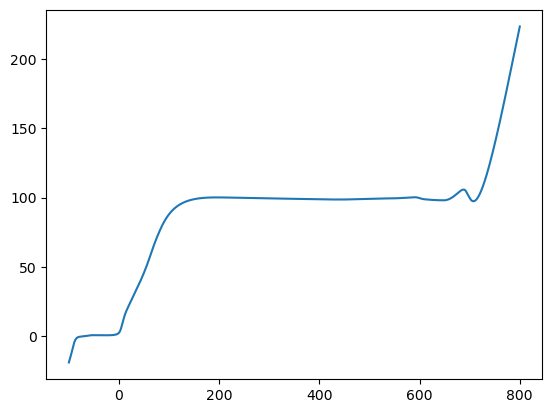

In [200]:
eq = best_1['program']
esr = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)
t= np.linspace(-100,800,1000)
shape = esr._program.model.shape_functions[0]
plt.plot(t,evaluate_shape(shape,t))

In [140]:
def plot_share_1(ax,esr):
    shape = esr._program.model.shape_functions[0]
    t = np.linspace(-30,830,10000)
    ax.plot(t,evaluate_shape(shape,t),c=colors[2],linewidth=linewidth, alpha=alpha, label=r"$s_1$")
    ax.set_xlabel(r'$\frac{E}{m}$ (cal/g)', fontsize=label_fontsize)
    ax.set_ylabel(r"$s_1$", fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
#     ax.legend(fontsize=15)
def plot_share_2(ax,esr):
    shape = esr._program.model.shape_functions[1]
    t = np.linspace(-100,0,10000)
    ax.plot(t,evaluate_shape(shape,t),c=colors[2],linewidth=linewidth, alpha=alpha, label=r"SHARE")
    ax.set_xlabel(r'$t_0$ ($^{\circ}$C)', fontsize=label_fontsize)
    ax.set_ylabel(r"$s_2$", fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
#     ax.legend(fontsize=15)

2023-01-23T16.22.29
shape(add(div(X0, X1), shape(X2)))
shape(add(div(X0, X1), shape(X2)))


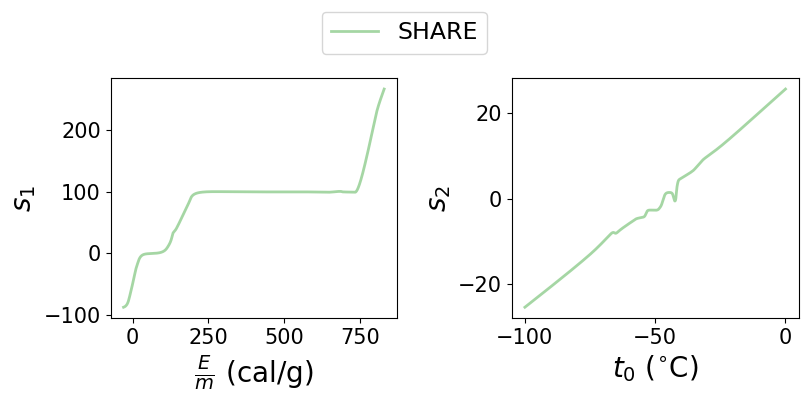

In [153]:
# visualize the shape functions
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']
linewidth = 2.0
alpha = 0.5
markersize = 5.0
label_fontsize = 20
ticks_fontsize = 15
eq = best_2['program']
print(timestamp)
esr = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)
fig, axs = plt.subplots(1,2, figsize=(8,4))
plot_share_1(axs[0],esr)
plot_share_2(axs[1],esr)

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=17)
plt.subplots_adjust(left=0.12, bottom=0.2, right=0.98, top=0.8, wspace=0.4, hspace=None)
plt.savefig('results_temperature_share.pdf')

In [47]:
extract_slope_intercept(esr._program.model.shape_functions[1],-20,-80)

(0.5074508666992188, 24.973499298095703)

In [80]:
a1, b1 = extract_slope_intercept(esr._program.model.shape_functions[0],-10,10)
print(f"Specific heat of ice is {1/a1}")
print(f"Intersects y=0 at {-b1/a1}")

Specific heat of ice is 0.45949941025323265
Intersects y=0 at 22.33681174957156


In [75]:
a2, b2 = extract_slope_intercept(esr._program.model.shape_functions[0],180,150)
print(f"Specific heat of water is {1/a2}")
print(f"Intersects y=0 at {-b2/a2}")
print(f"Intersects y=100 at {100-b2/a2}")

Specific heat of ice is 0.982250884195909
Intersects y=0 at 105.14299074980639
Intersects y=100 at 205.1429907498064


In [79]:
a3, b3 = extract_slope_intercept(esr._program.model.shape_functions[0],750,800)
print(f"Specific heat of steam is {1/a3}")
print(f"Intersects y=100 at {100-b3/a3}")

Specific heat of steam is 0.4803132472601088
Intersects y=100 at 795.0200481090121


In [83]:
print(f"Heat of fusion is {(-b2/a2) - (-b1/a1)}")
print(f"Heat of vaporization is {(100-b3/a3) - (100-b2/a2)}")

Heat of fusion is 82.80617900023483
Heat of vaporization is 589.8770573592058


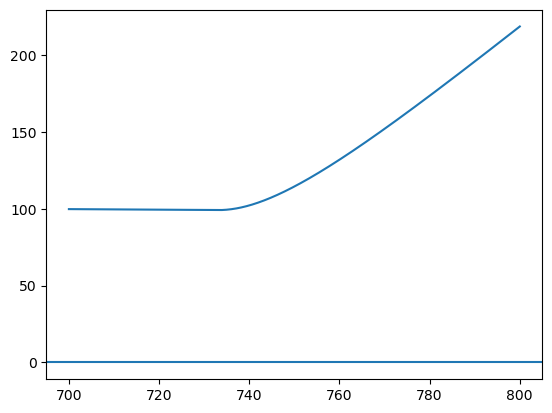

In [77]:
t = np.linspace(700,800,1000)
plt.plot(t,evaluate_shape(esr._program.model.shape_functions[0],t))
plt.axhline(0)

In [20]:
df.sort_values(by='r2_val',ascending=False)

,program,loss,num_of_shapes,num_of_variables,r2_val
356,"('shape', 'mul', 'shape', 'div', 0, 1, 'shape'...",1.081513e+00,3,3,9.993263e-01
379,"('shape', 'add', 'shape', 'div', 'shape', 0, 1...",1.174352e+00,4,3,9.991123e-01
497,"('shape', 'add', 'div', 'shape', 0, 'shape', 1...",1.746122e+00,4,3,9.990279e-01
533,"('shape', 'add', 'div', 0, 1, 'shape', 2)",1.284238e+00,2,3,9.990163e-01
499,"('shape', 'add', 'div', 'shape', 0, 1, 'shape'...",1.676656e+00,3,3,9.989807e-01
...,...,...,...,...,...
210,"('mul', 'mul', 1, 2, 0)",4.907979e+10,0,3,-2.749214e+07
273,"('mul', 0, 'mul', 1, 2)",4.907979e+10,0,3,-2.749214e+07
168,"('mul', 'mul', 2, 1, 0)",4.907979e+10,0,3,-2.749214e+07
218,"('mul', 'mul', 0, 2, 1)",4.907979e+10,0,3,-2.749214e+07


In [38]:
n_shapes = {k: get_n_shapes(k) for k,v in esr2.cached_results.items()}

In [41]:
shapes_1 = {j:esr2.cached_results[j] for j in [k for k,v in n_shapes.items() if v == 1]}

In [45]:
shapes_1
[(k,shapes_1[k]) for k in sorted(shapes_1, key=shapes_1.get)]

[(('shape', 'div', 'add', 0, 2, 1), 53.384619896506045),
 (('shape', 'div', 'add', 2, 0, 1), 53.384619896506045),
 (('shape', 'div', 0, 1), 97.23626772807269),
 (('shape', 'div', 1, 0), 350.30446487900565),
 (('shape', 'add', 1, 0), 594.0909270551333),
 (('shape', 'add', 0, 2), 595.9097729764331),
 (('shape', 'add', 2, 0), 595.9097729764331),
 (('shape', 'add', 0, 'add', 2, 1), 598.628216891931),
 (('shape', 'add', 'add', 2, 1, 0), 598.628216891931),
 (('shape', 'add', 'add', 0, 1, 2), 598.6291791493402),
 (('shape', 0), 611.4410074082748),
 (('shape', 'add', 0, 'div', 2, 1), 648.8187312442675),
 (('add', 1, 'shape', 0), 649.3950051492858),
 (('div', 'shape', 0, 1), 696.0167175662455),
 (('shape', 'div', 1, 'div', 0, 2), 703.2877448726844),
 (('div', 'add', 'shape', 0, 2, 1), 797.1347200501673),
 (('mul', 'shape', 2, 'div', 0, 1), 934.2397816603024),
 (('mul', 0, 'shape', 1), 944.144078680439),
 (('mul', 'shape', 1, 0), 944.144078680439),
 (('shape', 'add', 2, 'mul', 0, 1), 1013.561747

In [71]:
with open('cached_results.p','rb') as file:
    cd = pickle.load(file)

In [73]:
for k, v in cd.items():
    print(k,v)

('add', 0, 1) 1306617.819884201
('add', 0, 'shape', 2) 447969.73536808265
('div', 'div', 'shape', 1, 'shape', 0, 'shape', 2) 5699.765065874964
('shape', 'add', 'add', 0, 'shape', 1, 'shape', 2) 327.22931994842634
('div', 'shape', 'mul', 'shape', 1, 'shape', 2, 'shape', 0) 1275.0963365056946
('add', 1, 'mul', 2, 'shape', 0) 2866.243029532404
('add', 'div', 'shape', 2, 1, 0) 780033.1995429755
('shape', 'div', 'div', 'shape', 0, 'shape', 2, 'shape', 1) 281.88695144623983
('mul', 'mul', 'shape', 2, 'shape', 1, 'shape', 0) 465.69031499915303
('shape', 2) 1950.0136720918658
('div', 'mul', 2, 'shape', 1, 'shape', 0) 2919.924663110379
('mul', 'mul', 2, 'shape', 1, 0) 3280.6148925340667
('add', 'shape', 0, 'add', 2, 1) 1160.633502410435
('shape', 'mul', 'add', 2, 0, 'shape', 1) 234.2860320487928
('shape', 'add', 1, 'div', 'shape', 0, 2) 911.9606819141433
('div', 1, 'add', 0, 'shape', 2) 9278.173347114891
('add', 2, 'shape', 'add', 'shape', 1, 0) 914.0380895468144
('shape', 'mul', 0, 1) 1039.258

In [213]:
from gplearn.gplearn.functions import _function_map
from gplearn.gplearn.fitness import _fitness_map
from gplearn.gplearn.utils import check_random_state
from gplearn.gplearn._program import _Program
from datetime import datetime

timestamp = datetime.now().strftime("%Y-%m-%dT%H.%M.%S")
constructor_dict_ShapeNN = {
        'n_hidden_layers':5,
        'width':10,
        'activation_name':'ELU'
        }

program_config = {
'function_set' : [_function_map['add'],_function_map['sub'],_function_map['mul'],_function_map['div'],_function_map['shape']],
'arities' : {1: [_function_map['shape']], 2: [_function_map['add'],_function_map['sub'],_function_map['mul'],_function_map['div']]},
'init_depth' : (2,5),
'init_method' : 'half and half',
'n_features' : 3,
'const_range' : None,
'metric' : _fitness_map['mse'],
'p_point_replace' : 0.2,
'parsimony_coefficient' : 0.0,
'random_state': check_random_state(global_seed+1),
'optim_dict': {
        'alg':'adam',
        'lr': 1e-2,
        'max_n_epochs':1000,
        'tol':1e-3,
        'n_iter_no_change':10,
        'task':task,
        'device':'cpu',
        'batch_size':1024,
        'shape_class':ShapeNN,
        'constructor_dict': constructor_dict_ShapeNN,
        'num_workers_dataloader': 0,
        'seed':2,
        },
'timestamp':timestamp
}

# for i in range(10):
#     program = _Program(**program_config)
#     print(program)

program_list = [_function_map['shape'],_function_map['add'],_function_map['div'],0,1,_function_map['shape'],2]
# program_list = [_function_map['shape'],_function_map['div'],_function_map['add'],0,_function_map['shape'],2,1]
# shape(div(add(X0, shape(X2)), X1))
program = _Program(**program_config, program=program_list)

In [214]:
device = torch.device('cpu')
# params['ohe_matrices'] = self._create_ohe_matrices(X,self.categorical_variables, device=device)

X_t = torch.from_numpy(np.array(X)).float().to(device)
y_t = torch.from_numpy(np.array(y)).float().to(device)
program.raw_fitness(X_t,y_t,sample_weight=np.ones(X_t.shape[0]),ohe_matrices={})

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-23T16.12.40/shape(add(div(X0, X1), shape(X2)))


shape(add(div(X0, X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_91f75243-ceea-477f-9ea0-29b0d6c8c8c9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_91f75243-ceea-477f-9ea0-29b0d6c8c8c9.ckpt


shape(add(div(X0, X1), shape(X2)))
shape(add(div(X0, X1), shape(X2))) | raw_fitness: 1.9787033022956602


1.9787033022956602

In [25]:
numerical_arguments = {
    0: (1.0,800),
    1: (1.0,4.0),
    2: (-100,-10)
}
categorical_arguments = {}

In [23]:
program = esr2._program

In [28]:
str(program)

'shape(mul(shape(div(X0, X1)), shape(X2)))'

{1: (0.25, 800.0), 2: (-100, -10), 0: (10687.407210098114, 24551.856256067753)}


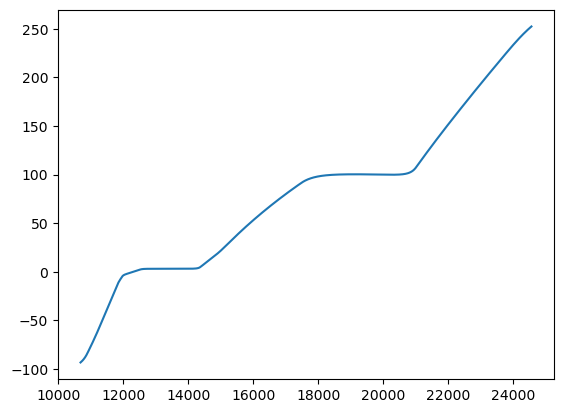

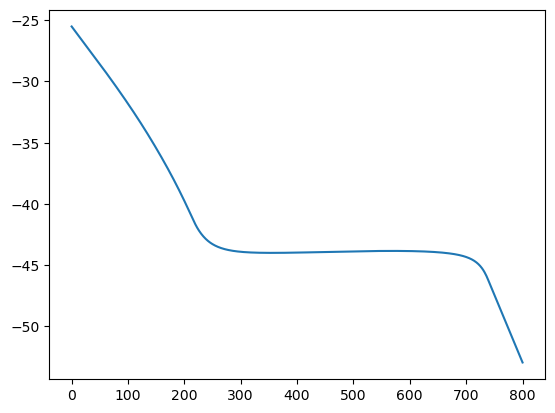

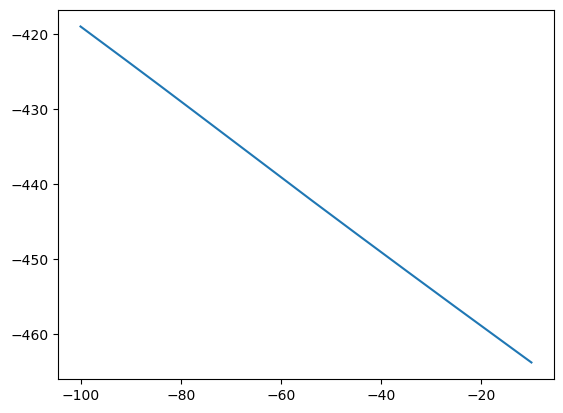

In [26]:
program.plot_shape_functions(numerical_arguments, categorical_arguments, steps=1000)

{1: (0.25, 800.0), 2: (-100, -10), 0: (10687.407210098114, 24551.856256067753)}


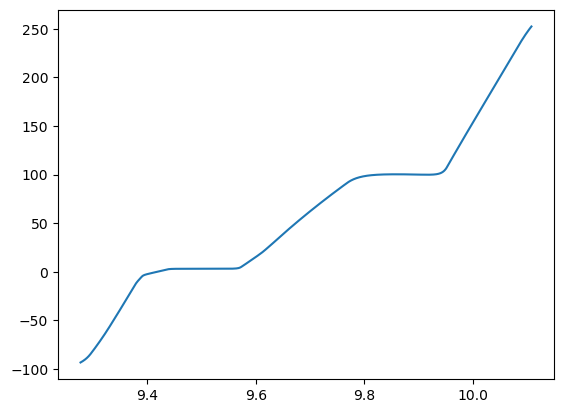

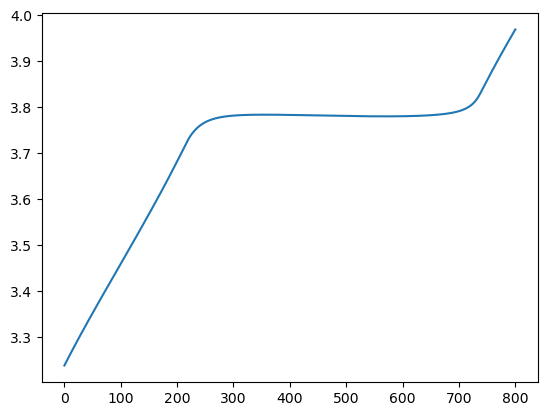

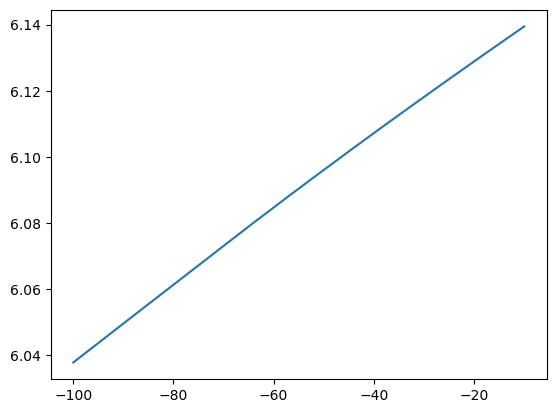

In [62]:
shapes = program.model.shape_functions
shape_arg_ranges = program.get_argument_ranges_for_shape_functions(numerical_arguments, categorical_arguments)

a,b = shape_arg_ranges[0]

t = torch.linspace(np.log(a),np.log(b),1000)
shape = shapes[0]
shape.to(torch.device('cpu'))
with torch.no_grad():
    y = shape(torch.exp(t)).flatten()
    plt.plot(t.numpy(),y.numpy())
    plt.show()

a,b = shape_arg_ranges[1]
t = torch.linspace(a,b,1000)
shape = shapes[1]
shape.to(torch.device('cpu'))
with torch.no_grad():
    y = torch.log(-shape(t).flatten())
    plt.plot(t.numpy(),y.numpy())
    plt.show()
    
a,b = shape_arg_ranges[2]
t = torch.linspace(a,b,1000)
shape = shapes[2]
shape.to(torch.device('cpu'))
with torch.no_grad():
    y = torch.log(-shape(t).flatten())
    plt.plot(t.numpy(),y.numpy())
    plt.show()

In [47]:
ebm = ExplainableBoostingRegressor(interactions=0)

In [48]:
ebm.fit(X,y)

ExplainableBoostingRegressor(interactions=0)

In [49]:
r2_score(y_test,ebm.predict(X_test))

0.7576685276506532

In [92]:
# visualize the shape functions
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']
linewidth = 2.0
alpha = 0.5
markersize = 5.0
label_fontsize = 15
ticks_fontsize = 12

In [104]:
def plot_1(ax,ebm_global):
    shape_data = ebm_global.data(0)
    x_values = shape_data['names']
    y_values = shape_data['scores']
    ax.plot(x_values[:-1],y_values,c=colors[1],linewidth=linewidth, alpha=alpha, label="EBM (no interactions)")
    ax.set_xlabel(r'$E$ (cal)', fontsize=label_fontsize)
    ax.set_ylabel(r"$s_1$", fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
def plot_2(ax,ebm_global):
    shape_data = ebm_global.data(1)
    x_values = shape_data['names']
    y_values = shape_data['scores']
    ax.plot(x_values[:-1],y_values,c=colors[1],linewidth=linewidth, alpha=alpha, label="EBM (no interactions)")
    ax.set_xlabel(r'$m$ (g)', fontsize=label_fontsize)
    ax.set_ylabel(r"$s_2$", fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
def plot_3(ax,ebm_global, interactions=False):
    shape_data = ebm_global.data(2)
    x_values = shape_data['names']
    y_values = shape_data['scores']
    if interactions:
        ax.plot(x_values[:-1],y_values,c=colors[1],linewidth=linewidth, alpha=alpha, label="EBM (with interactions)")
    else:
        ax.plot(x_values[:-1],y_values,c=colors[1],linewidth=linewidth, alpha=alpha, label="EBM (no interactions)")
    ax.set_xlabel(r'$t_0$ ($^{\circ}$C)', fontsize=label_fontsize)
    ax.set_ylabel(r"$s_3$", fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)



In [105]:
ebm = ExplainableBoostingRegressor(interactions=0)
ebm.fit(X,y)
ebm_global = ebm.explain_global()

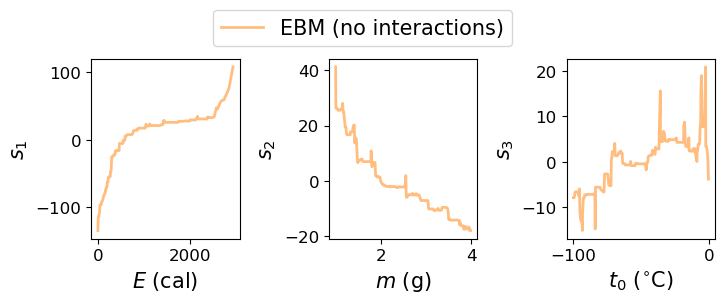

In [109]:

fig, axs = plt.subplots(1,3, figsize=(8,3))
plot_1(axs[0],ebm_global)
plot_2(axs[1],ebm_global)
plot_3(axs[2],ebm_global)
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=15)
plt.subplots_adjust(left=0.12, bottom=0.20, right=0.9, top=0.8, wspace=0.6, hspace=None)
plt.savefig('temperature_ebm_no_interactions.pdf')

In [24]:
ebm_global = ebm.explain_global()

In [27]:
shape_data = ebm_global.data(2)

In [29]:
x_values = shape_data['names']
y_values = shape_data['scores']

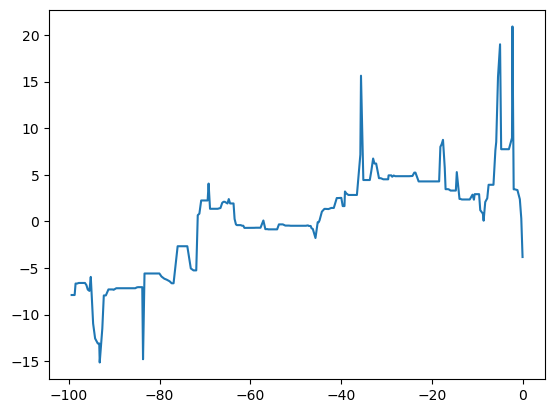

In [31]:
plt.plot(x_values[1:],y_values)

In [83]:
show(ebm_global)

<!-- http://127.0.0.1:7791/1811333500640/ -->

In [111]:
ebm = ExplainableBoostingRegressor()
ebm.fit(X,y)
ebm_global = ebm.explain_global()
shape_data = ebm_global.data(3)

In [80]:
values = shape_data['scores']

In [81]:
values

array([[-4.85362206e+00, -4.66509933e+00, -4.89107765e+00,
        -5.24929782e+00, -5.88491162e+00, -2.65992847e+00,
        -3.98275985e+00, -4.61971515e+00, -1.11582448e+01,
        -1.05582353e+01, -2.95522602e+00, -3.01048334e-01,
        -3.69998611e-01, -6.80936950e-01, -2.26893170e+00,
        -6.99689643e+00,  2.56973218e+00,  2.25631699e+00,
        -1.11692843e+00,  2.91878518e+00,  4.70703788e-01,
         4.70082792e+00,  2.74023526e+00,  2.31738728e+00,
         2.24683213e+00, -3.75267900e+00, -1.01122012e+00,
        -5.15303303e+00, -5.08714827e+00, -1.67207681e+00],
       [-4.02078510e+00, -3.83226238e+00, -4.06033674e+00,
        -4.57911609e+00, -5.91366169e+00, -2.82628733e+00,
        -4.14911871e+00, -4.78607401e+00, -1.13246037e+01,
        -1.07245941e+01, -3.12158487e+00, -4.67407189e-01,
        -5.36357467e-01, -8.47295805e-01, -2.43529056e+00,
        -7.16325529e+00,  2.40337332e+00,  2.08995814e+00,
        -1.28328729e+00,  2.75242633e+00,  3.04344932e-

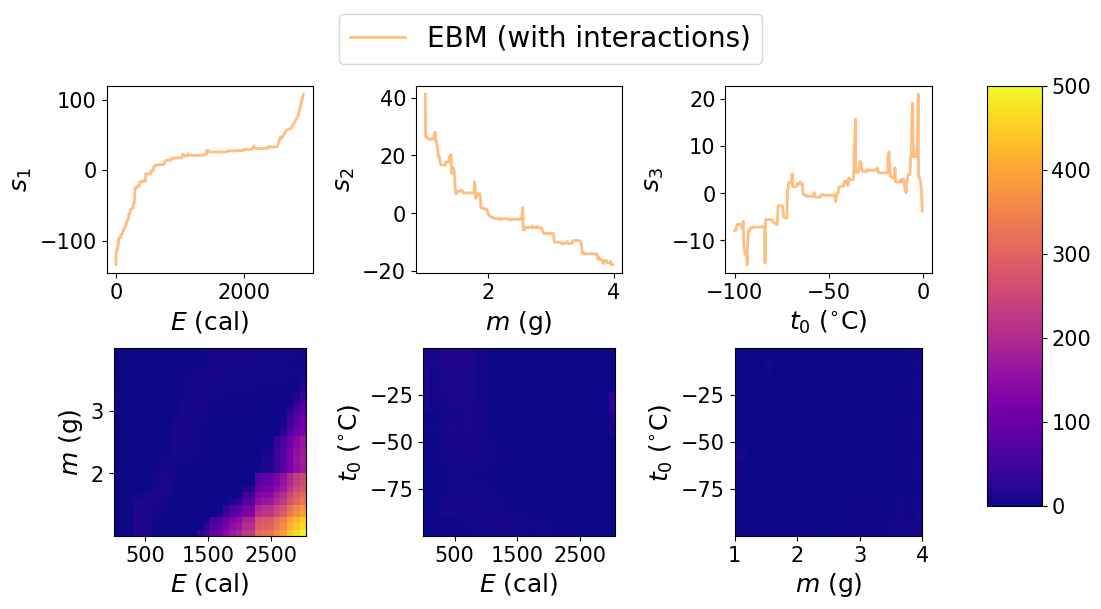

In [126]:
# visualize the shape functions
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']
linewidth = 2.0
alpha = 0.5
markersize = 5.0
label_fontsize = 18
ticks_fontsize = 15

def plot_heatmap_1(ax, ebm_global):
    data = ebm_global.data(3)
    im = ax.imshow(data['scores'].T, extent=[data['left_names'][0], data['left_names'][-1],data['right_names'][0], data['right_names'][-1]], origin='lower', aspect=1000, cmap='plasma', vmin=0,vmax=500)
    ax.set_xlabel(r'$E$ (cal)', fontsize=label_fontsize)
    ax.set_ylabel('$m$ (g)', fontsize=label_fontsize)
    ax.set_xticks([500,1500,2500])
    ax.set_xticklabels([500,1500,2500])
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
    return im

def plot_heatmap_2(ax, ebm_global):
    data = ebm_global.data(4)
    im = ax.imshow(data['scores'].T, extent=[data['left_names'][0], data['left_names'][-1],data['right_names'][0], data['right_names'][-1]], origin='lower', aspect='30', cmap='plasma', vmin=0,vmax=500)
    ax.set_xlabel(r'$E$ (cal)', fontsize=label_fontsize)
    ax.set_ylabel('$t_0$ ($^{\circ}$C)', fontsize=label_fontsize)
    ax.set_xticks([500,1500,2500])
    ax.set_xticklabels([500,1500,2500])
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
    return im

def plot_heatmap_3(ax, ebm_global):
    data = ebm_global.data(5)
    im = ax.imshow(data['scores'].T, extent=[data['left_names'][0], data['left_names'][-1],data['right_names'][0], data['right_names'][-1]], origin='lower', aspect=0.03, cmap='plasma', vmin=0,vmax=500)
    ax.set_xlabel(r'$m$ (g)', fontsize=label_fontsize)
    ax.set_ylabel('$t_0$ ($^{\circ}$C)', fontsize=label_fontsize)
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels([1,2,3,4])
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
    return im


fig, axs = plt.subplots(2,3,figsize=(11,6))
plot_1(axs[0][0], ebm_global)
plot_2(axs[0][1], ebm_global)
plot_3(axs[0][2], ebm_global, interactions=True)
im = plot_heatmap_1(axs[1][0], ebm_global)
im = plot_heatmap_2(axs[1][1], ebm_global)
im = plot_heatmap_3(axs[1][2], ebm_global)
handles, labels = axs[0][2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=20)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.98, top=0.85, wspace=0.5, hspace=0.4)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar_ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
fig.colorbar(im, cax=cbar_ax)
plt.savefig('temperature_ebm_interactions.pdf')

In [91]:
np.array(shape_data['left_names'])[1:]-np.array(shape_data['left_names'])[:-1]

array([ 55.96295871,  79.36743357,  64.50752531,  64.98149753,
        53.08377897,  56.43078786,  44.74530945,  73.04834544,
        57.56638791,  56.92958292,  56.64494141,  56.36130361,
        58.62610812,  65.2542864 ,  59.09986417,  43.81547519,
        67.10150971,  54.68451469,  75.85558619,  71.89725273,
        88.41390846,  92.24351519,  90.75568879, 137.31253602,
       119.28983925, 167.37405424, 157.77524209, 186.23522943,
       235.92851479, 565.14536787])

In [92]:
shape_data

{'type': 'interaction',
 'left_names': [1.9524271399890751,
  57.915385845195736,
  137.28281941626352,
  201.79034472311355,
  266.7718422570764,
  319.8556212251496,
  376.2864090824835,
  421.0317185359551,
  494.0800639801772,
  551.6464518922985,
  608.576034808734,
  665.2209762175316,
  721.5822798271836,
  780.2083879456441,
  845.4626743432428,
  904.5625385146664,
  948.3780137072519,
  1015.4795234146713,
  1070.1640381013035,
  1146.019624291656,
  1217.9168770186748,
  1306.3307854822433,
  1398.5743006753041,
  1489.3299894687113,
  1626.642525484401,
  1745.9323647329593,
  1913.306418972239,
  2071.081661057977,
  2257.3168904846816,
  2493.2454052752632,
  3058.3907731448594],
 'right_names': [1.0057520725833102,
  1.0717876849575632,
  1.1513582176336463,
  1.2464261899366638,
  1.3309790030737658,
  1.4224088839985043,
  1.5177157410827549,
  1.6189483155159086,
  1.7146295046646096,
  1.8077091352080634,
  1.9100300841722682,
  1.988438415677077,
  2.062179169516351

In [163]:
r2_score(y_test,ebm.predict(X_test))

0.8754164306867275

In [175]:
global_seed = 42
parameter_dict = {
    'binary_operators':["+", "*", "/", "-"],
    'unary_operators':[
        "log",
        "exp",
        "cos",
    ],
    'loss':"L2DistLoss()",
    'maxsize':40,
    'procs':0,
    'multithreading':False,
    'populations':30,
    'niterations':400,
    'population_size':50,
    'model_selection':'accuracy',
    'random_state':global_seed,
    'deterministic':True
}
pysr = PySRRegressor(**parameter_dict)

In [176]:
pysr.fit(X,y)

C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pysr\sr.py:1257: UserWarning:

Note: it looks like you are running in Jupyter. The progress bar will be turned off.



PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           85.46178   
	1         0.001564                                  (x0 * 0.06976894)   
	2         0.497029                              (log(x0) * 13.531862)   
	3         0.238140                            ((x0 / 5.1739655) / x1)   
	4         0.229798                ((log(x0) * 33.581806) - 134.86272)   
	5         0.188058           ((log(x0 / x1) * 39.396084) - 140.71716)   
	6         0.032774  (log(((x0 / x1) + 12.550137) * 0.018548375) * ...   
	7         0.000348  (log((((x0 / x1) + 13.944565) - x1) * 0.019082...   
	8         0.073222  (39.08012 - (cos(log(((x0 / 1.3530194) / x1) +...   
	9         0.000730  ((41.478786 - (cos(log(((x0 / 1.3530194) / x1)...   
	10        0.006216  ((39.08012 - (cos(log(((x0 / 1.3530194) / x1) ...   
	11        0.095044  (38.100616 - (cos(log((x0 / x1) + (cos((0.0274...   
	12        0.004228  (44.850914 - (cos(log(((x0 / x1) + (cos((0.027...   
	13        0.009064  (45.146263 - (cos(log((x0 / x1) + (cos((0.0274...   
	14        0.047769  ((50.886524 - (cos(log((x0 / x1) + (cos((0.027...   
	15        0.013710  ((53.517414 - (cos(log((x0 / (x1 * 1.1420969))...   
	16        0.007331  ((51.982903 - (cos(log((x0 / x1) + (cos((-0.02...   
	17        0.011380  ((51.982903 - (cos(log((x0 / x1) + (cos((-0.02...   
	18        0.003164  (((51.982903 - (cos(log((x0 / x1) + (cos((-0.0...   
	19        0.021289  (((41.45243 - (cos(log(((x0 / x1) + (cos((0.02...   
	20        0.028856  (((41.445545 - (cos(log(((x0 / x1) + (cos((0.0...   
	21        0.002631  (((41.445545 - (cos(log((((x0 / x1) + (cos((0....   
	22        0.058282  ((((46.589573 - (cos(log(((x0 / x1) + (cos((-0...   
	23        0.042355  ((((46.579765 - (cos(log(((x0 / x1) + (cos(((x...   
	24  >>>>  0.032263  ((((46.579353 - (cos(log(((x0 / x1) + (cos(((x...   
	
	          loss  complexity  
	0   1974.46560           1  
	1   1968.29740           3  
	2   1197.38460           4  
	3    943.64923           5  
	4    749.91240           6  
	5    514.83210           8  
	6    482.16858          10  
	7    481.83282          12  
	8    447.81260          13  
	9    447.15936          15  
	10   441.63452          17  
	11   401.59283          18  
	12   398.21127          20  
	13   391.05728          22  
	14   372.81598          23  
	15   362.73230          25  
	16   357.45288          27  
	17   349.40927          29  
	18   347.20540          31  
	19   332.73270          33  
	20   314.07390          35  
	21   312.42578          37  
	22   294.73746          38  
	23   282.51447          39  
	24   273.54523          40  
]

In [185]:
print(pysr.latex_table())

\usepackage{breqn}
\usepackage{booktabs}

...

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}cccc@{}}
\toprule
Equation & Complexity & Loss & Score \\
\midrule
$y = 85.5$ & $1$ & $1.97 \cdot 10^{3}$ & $0.0$ \\
$y = 0.0698 x_{0}$ & $3$ & $1.97 \cdot 10^{3}$ & $0.00156$ \\
$y = 13.5 \log{\left(x_{0} \right)}$ & $4$ & $1.20 \cdot 10^{3}$ & $0.497$ \\
$y = \frac{0.193 x_{0}}{x_{1}}$ & $5$ & $944.$ & $0.238$ \\
$y = 33.6 \log{\left(x_{0} \right)} - 135.$ & $6$ & $750.$ & $0.230$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y = 39.4 \log{\left(\frac{x_{0}}{x_{1}} \right)} - 141. \end{dmath*} \end{minipage} & $8$ & $515.$ & $0.188$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y = 46.7 \log{\left(\frac{0.0185 x_{0}}{x_{1}} + 0.233 \right)} \end{dmath*} \end{minipage} & $10$ & $482.$ & $0.0328$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y = 46.1 \log{\left(\frac{0.0191 x_{0}}{x_{1}} - 0.0191 x_{1} + 0.266 \right)} \end{dmath*} \end

In [180]:
n_equations = 25
res = []
for i in range(n_equations):
    res.append(r2_score(y_test,pysr.predict(X_test,i)))

In [181]:
res

[-0.00024283702891980674,
 0.0708028684705323,
 0.38360099560558225,
 0.48519960033850207,
 0.6274287365737526,
 0.7329676580562432,
 0.7423402890874419,
 0.7425437225032371,
 0.7662730547736692,
 0.7655531530786052,
 0.7676161570126239,
 0.8026464399755984,
 0.8058853091169956,
 0.8120782763972301,
 0.817493941831984,
 0.822489462330521,
 0.8249053638695145,
 0.8292046220878228,
 0.8304533917694874,
 0.8405225842690436,
 0.8415583637913022,
 0.8429127156070229,
 0.8572910121567018,
 0.864114170412813,
 0.8667016505182259]

In [189]:
np.array(res)[[2,3,5,10,14,19,24]]

array([0.383601  , 0.4851996 , 0.73296766, 0.76761616, 0.81749394,
       0.84052258, 0.86670165])

In [178]:
res_prev = res

In [179]:
res_prev

[-0.00024280153947020544,
 0.0708028684705323,
 0.007811309565533997,
 0.40167163562292996,
 0.4072951579274857,
 0.4295139105430007,
 0.4370847303388836,
 0.4395196434652284,
 0.4549610171410706,
 0.7017690704627189,
 0.7377646649189749,
 0.751458164687338,
 0.7575421535795783,
 0.7653576298118245,
 0.7653523743133486,
 0.7657681716870417,
 0.7713180418024675,
 0.7757680217646501,
 0.7716997623609716,
 0.7709090764637794,
 0.7908918430495859,
 0.7930909944586426,
 0.7927218300459716,
 0.7935915507784516,
 0.7917648965487337,
 0.7978409311888109]